In [18]:
import ROOT
t5 = True

In CMSSW_7_4_7 follow the instructions here:

https://twiki.cern.ch/twiki/bin/viewauth/CMS/SWGuideHiggsAnalysisCombinedLimit#ROOT6_SLC6_release_CMSSW_7_4_X

and copy over the counting files and makelimitfiles.sh. 

Run the script and then tar up the limit files dir to here and proceed.

The next step is to parse the limit files to create four histograms. A limit file (e.g. limit_t6gg_2000_1000.txt) looks like this:

```
At r = 25.550304:	q_mu = 4.42079	q_A  = 2.74014	CLsb = 0.01527	CLb  = 0.30585	CLs  = 0.04993

 -- Asymptotic -- 
Observed Limit: r < 25.5503
Expected  2.5%: r < 14.6732
Expected 16.0%: r < 20.8888
Expected 50.0%: r < 31.9688
Expected 84.0%: r < 50.7008
Expected 97.5%: r < 77.9536

Done in 0.00 min (cpu), 0.04 min (real)
```

We want to fetch the information:

"Down" : 16.0%

"Mid" : 50.0%

"Up" : 84.0%

"Observed"

In [19]:
def FillHists(file_name, m1, m2):
    print file_name, m1, m2
    
    with open(file_name) as fin:
        for line in fin: 
            i = int(hObsLim.GetXaxis().FindBin(float(m1)))
            j = int(hObsLim.GetYaxis().FindBin(float(m2)))
                      
            if re.search('16.0%', line):
                l = line.split('<')
                v = float(l[1].strip())
                        
                if v > 0:
                    hExpLimDown.SetBinContent(i,j,v)
                    #hExpLimDown.SetBinContent(hExpLimDown.GetXaxis().FindBin(i), hExpLimDown.GetYaxis().FindBin(j), v)
                    #print "Filled " + str(i) + " and " + str(j) + " with " + str(v)
            
            if re.search('50.0%', line):
                l = line.split('<')
                v = float(l[1].strip())
                        
                if v > 0:
                    hExpLimMid.SetBinContent(i,j,v)
                    #hExpLimMid.SetBinContent(hExpLimMid.GetXaxis().FindBin(i), hExpLimMid.GetYaxis().FindBin(j), v)
                    #print "Filled " + str(m1) + " and " + str(m2) + " with " + str(v)
            
            if re.search('84.0%', line):
                l = line.split('<')
                v = float(l[1].strip())
                        
                if v > 0:
                    hExpLimUp.SetBinContent(i,j,v)
                    #hExpLimUp.SetBinContent(hExpLimUp.GetXaxis().FindBin(i), hExpLimUp.GetYaxis().FindBin(j), v)
                    #print "Filled " + str(i) + " and " + str(j) + " with " + str(v)
     
            if re.search('Observed', line):
                l = line.split('<')
                v = float(l[1].strip())
                        
                if v > 0:
                    hObsLim.SetBinContent(i,j,v)
                    #hObsLim.SetBinContent(hObsLim.GetXaxis().FindBin(i), hObsLim.GetYaxis().FindBin(j), v)
                    #print "Filled " + str(i) + " and " + str(j) + " with " + str(v)
                

In [20]:
import os
import numpy as np
import re

if t5:
    upper_bound = 2505
    lower_bound = 1395
else:
    upper_bound = 2155
    lower_bound = 1395
    
if t5:
    cf_re = 'T5GG'
else:
    cf_re = 'T6GG'

# these number should come from the arrays we defined earlier rather than hard-coded
mSquark = np.array([1375.0, 1425.0, 1475.0, 1525.0, 1575.0, 
                    1625.0, 1675.0, 1725.0, 1775.0, 1825.0, 1875.0, 1925.0, 
                    1975.0, 2025.0, 2075.0, 2125.0, 2175.0, 2225.0, 2275.0, 
                    2325.0, 2375.0, 2425.0, 2475.0, 2525.0])
mNeutralino = np.array([0.0,17.5,37.5,75.0,125.0,175.0,250.0,
        350.0,450.0,550.0,650.0,750.0,850.0,950.0,
        1025.001, 1050.001, 1075.001,
        1125.001, 1150.001, 1175.001,
        1225.001, 1250.001,
        1262.5, 1275.001, 1282.5, 1300.001, 1312.5, 1325.001, 1332.5, 1350.001,
        1362.5, 1375.001, 1382.5, 1400.001, 1412.5, 1425.001, 1432.5, 1450.001,
        1462.5, 1475.001, 1482.5, 1500.001, 1512.5, 1525.001, 1532.5, 1550.001,
        1562.5, 1575.001, 1582.5, 1600.001, 1612.5, 1625.001, 1632.5, 1650.001,
        1662.5, 1675.001, 1682.5, 1700.001, 1712.5, 1725.001, 1732.5, 1750.001,
        1762.5, 1775.001, 1782.5, 1800.001, 1812.5, 1825.001, 1832.5, 1850.001,
        1862.5, 1875.001, 1882.5, 1900.001, 1912.5, 1925.001, 1932.5, 1950.001,
        1962.5, 1975.001, 1982.5, 2000.001, 2012.5, 2025.001, 2032.5, 2050.001,
        2062.5, 2075.001, 2082.5, 2100.001, 2112.5, 2125.001, 2132.5, 2150.001,
        2162.5, 2175.001, 2182.5, 2200.001, 2212.5, 2225.001, 2232.5, 2250.001,
        2262.5, 2275.001, 2282.5, 2300.001, 2312.5, 2325.001, 2332.5, 2350.001,
        2362.5, 2375.001, 2382.5, 2400.001, 2412.5, 2425.001, 2432.5, 2450.001,
        2462.5, 2475.001, 2482.5, 2500.001, 2512.5] )

masses = [1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050,2100]
neutralino_masses = [10,25,50,100,150,200,300,400,500,600,700,800,900,1000,1100,1200,
                     1300,1400,1500,1600,1700,1800,1900,2000]


nbinsx = len(mSquark)-1
nbinsy = len(mNeutralino)-1

hExpLimUp = ROOT.TH2D('up', 'up', nbinsx, mSquark, nbinsy, mNeutralino)
hExpLimMid = ROOT.TH2D('mid', 'mid', nbinsx, mSquark, nbinsy, mNeutralino)
hExpLimDown = ROOT.TH2D('down', 'down', nbinsx, mSquark, nbinsy, mNeutralino)
hObsLim = ROOT.TH2D('obs', 'obs', nbinsx, mSquark, nbinsy, mNeutralino)


limdir = './limitfiles_'+ cf_re + '_blind-test/'
limit_files = os.listdir(limdir)

for lf in limit_files:
        
    m1 = lf.split('_')[2]
    m2 = lf.split('_')[3][:-4]
        
    file_name = limdir + lf
    
    FillHists(file_name, m1, m2)

limdir = './limitfiles_'+ cf_re + '_observed/'
#limdir = './limitfiles_newfakes_'+ cf_re + '_observed/'
limit_files = os.listdir(limdir)

for lf in limit_files:
        
    m1 = lf.split('_')[2]
    m2 = lf.split('_')[3][:-4]
        
    file_name = limdir + lf
    
    FillHists(file_name, m1, m2)
    
limdir = './limitfiles_'+ cf_re + '_ext_blind/'
limit_files = os.listdir(limdir)

for lf in limit_files:
        
    m1 = lf.split('_')[2]
    m2 = lf.split('_')[3][:-4]
        
    file_name = limdir + lf
    
    FillHists(file_name, m1, m2)
    
limdir = './limitfiles_'+ cf_re + '_ext_observed/'
limit_files = os.listdir(limdir)

for lf in limit_files:
        
    m1 = lf.split('_')[2]
    m2 = lf.split('_')[3][:-4]
        
    file_name = limdir + lf
    
    FillHists(file_name, m1, m2)  


./limitfiles_T5GG_blind-test/limit_T5GG_1400_10.txt 1400 10
./limitfiles_T5GG_blind-test/limit_T5GG_1400_100.txt 1400 100
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1000.txt 1400 1000
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1100.txt 1400 1100
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1150.txt 1400 1150
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1200.txt 1400 1200
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1250.txt 1400 1250
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1300.txt 1400 1300
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1350.txt 1400 1350
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1375.txt 1400 1375
./limitfiles_T5GG_blind-test/limit_T5GG_1400_1390.txt 1400 1390
./limitfiles_T5GG_blind-test/limit_T5GG_1400_150.txt 1400 150
./limitfiles_T5GG_blind-test/limit_T5GG_1400_200.txt 1400 200
./limitfiles_T5GG_blind-test/limit_T5GG_1400_25.txt 1400 25
./limitfiles_T5GG_blind-test/limit_T5GG_1400_300.txt 1400 300
./limitfiles_T5GG_blind-test/limit_T5GG_1400_400.txt 140

./limitfiles_T5GG_blind-test/limit_T5GG_1650_800.txt 1650 800
./limitfiles_T5GG_blind-test/limit_T5GG_1650_900.txt 1650 900
./limitfiles_T5GG_blind-test/limit_T5GG_1700_10.txt 1700 10
./limitfiles_T5GG_blind-test/limit_T5GG_1700_100.txt 1700 100
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1000.txt 1700 1000
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1100.txt 1700 1100
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1200.txt 1700 1200
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1300.txt 1700 1300
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1400.txt 1700 1400
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1450.txt 1700 1450
./limitfiles_T5GG_blind-test/limit_T5GG_1700_150.txt 1700 150
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1500.txt 1700 1500
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1550.txt 1700 1550
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1600.txt 1700 1600
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1650.txt 1700 1650
./limitfiles_T5GG_blind-test/limit_T5GG_1700_1675.tx

./limitfiles_T5GG_blind-test/limit_T5GG_1950_1100.txt 1950 1100
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1200.txt 1950 1200
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1300.txt 1950 1300
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1400.txt 1950 1400
./limitfiles_T5GG_blind-test/limit_T5GG_1950_150.txt 1950 150
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1500.txt 1950 1500
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1600.txt 1950 1600
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1650.txt 1950 1650
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1700.txt 1950 1700
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1750.txt 1950 1750
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1800.txt 1950 1800
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1850.txt 1950 1850
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1900.txt 1950 1900
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1925.txt 1950 1925
./limitfiles_T5GG_blind-test/limit_T5GG_1950_1940.txt 1950 1940
./limitfiles_T5GG_blind-test/limit_T5GG_19

./limitfiles_T5GG_observed/limit_T5GG_1450_1000.txt 1450 1000
./limitfiles_T5GG_observed/limit_T5GG_1450_1100.txt 1450 1100
./limitfiles_T5GG_observed/limit_T5GG_1450_1150.txt 1450 1150
./limitfiles_T5GG_observed/limit_T5GG_1450_1200.txt 1450 1200
./limitfiles_T5GG_observed/limit_T5GG_1450_1250.txt 1450 1250
./limitfiles_T5GG_observed/limit_T5GG_1450_1300.txt 1450 1300
./limitfiles_T5GG_observed/limit_T5GG_1450_1350.txt 1450 1350
./limitfiles_T5GG_observed/limit_T5GG_1450_1400.txt 1450 1400
./limitfiles_T5GG_observed/limit_T5GG_1450_1425.txt 1450 1425
./limitfiles_T5GG_observed/limit_T5GG_1450_1440.txt 1450 1440
./limitfiles_T5GG_observed/limit_T5GG_1450_150.txt 1450 150
./limitfiles_T5GG_observed/limit_T5GG_1450_200.txt 1450 200
./limitfiles_T5GG_observed/limit_T5GG_1450_25.txt 1450 25
./limitfiles_T5GG_observed/limit_T5GG_1450_300.txt 1450 300
./limitfiles_T5GG_observed/limit_T5GG_1450_400.txt 1450 400
./limitfiles_T5GG_observed/limit_T5GG_1450_50.txt 1450 50
./limitfiles_T5GG_observ

./limitfiles_T5GG_observed/limit_T5GG_1700_50.txt 1700 50
./limitfiles_T5GG_observed/limit_T5GG_1700_500.txt 1700 500
./limitfiles_T5GG_observed/limit_T5GG_1700_600.txt 1700 600
./limitfiles_T5GG_observed/limit_T5GG_1700_700.txt 1700 700
./limitfiles_T5GG_observed/limit_T5GG_1700_800.txt 1700 800
./limitfiles_T5GG_observed/limit_T5GG_1700_900.txt 1700 900
./limitfiles_T5GG_observed/limit_T5GG_1750_10.txt 1750 10
./limitfiles_T5GG_observed/limit_T5GG_1750_100.txt 1750 100
./limitfiles_T5GG_observed/limit_T5GG_1750_1000.txt 1750 1000
./limitfiles_T5GG_observed/limit_T5GG_1750_1100.txt 1750 1100
./limitfiles_T5GG_observed/limit_T5GG_1750_1200.txt 1750 1200
./limitfiles_T5GG_observed/limit_T5GG_1750_1300.txt 1750 1300
./limitfiles_T5GG_observed/limit_T5GG_1750_1400.txt 1750 1400
./limitfiles_T5GG_observed/limit_T5GG_1750_1450.txt 1750 1450
./limitfiles_T5GG_observed/limit_T5GG_1750_150.txt 1750 150
./limitfiles_T5GG_observed/limit_T5GG_1750_1500.txt 1750 1500
./limitfiles_T5GG_observed/lim

./limitfiles_T5GG_observed/limit_T5GG_1950_500.txt 1950 500
./limitfiles_T5GG_observed/limit_T5GG_1950_600.txt 1950 600
./limitfiles_T5GG_observed/limit_T5GG_1950_700.txt 1950 700
./limitfiles_T5GG_observed/limit_T5GG_1950_800.txt 1950 800
./limitfiles_T5GG_observed/limit_T5GG_1950_900.txt 1950 900
./limitfiles_T5GG_observed/limit_T5GG_2000_10.txt 2000 10
./limitfiles_T5GG_observed/limit_T5GG_2000_100.txt 2000 100
./limitfiles_T5GG_observed/limit_T5GG_2000_1000.txt 2000 1000
./limitfiles_T5GG_observed/limit_T5GG_2000_1100.txt 2000 1100
./limitfiles_T5GG_observed/limit_T5GG_2000_1200.txt 2000 1200
./limitfiles_T5GG_observed/limit_T5GG_2000_1300.txt 2000 1300
./limitfiles_T5GG_observed/limit_T5GG_2000_1400.txt 2000 1400
./limitfiles_T5GG_observed/limit_T5GG_2000_150.txt 2000 150
./limitfiles_T5GG_observed/limit_T5GG_2000_1500.txt 2000 1500
./limitfiles_T5GG_observed/limit_T5GG_2000_1600.txt 2000 1600
./limitfiles_T5GG_observed/limit_T5GG_2000_1700.txt 2000 1700
./limitfiles_T5GG_observed

OSError: [Errno 2] No such file or directory: './limitfiles_T5GG_ext_blind/'

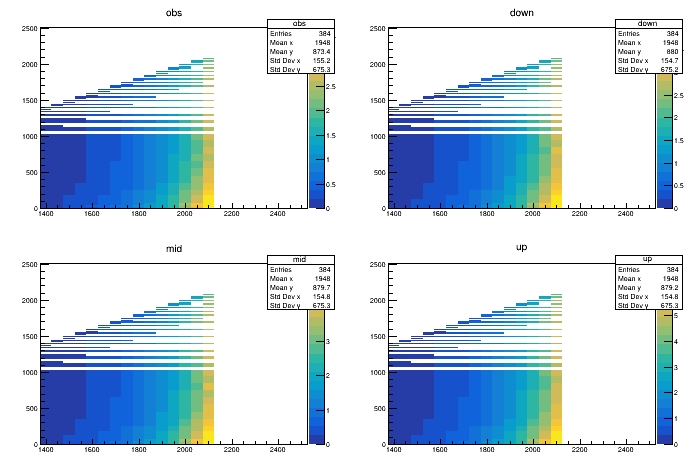

In [21]:
#ROOT.enableJSVis()
ROOT.disableJSVis()

c2 = ROOT.TCanvas()
c2.Divide(2,2)

c2.cd(1)
hObsLim.Draw('colz')

c2.cd(2)
hExpLimDown.Draw('colz')

c2.cd(3)
hExpLimMid.Draw('colz')

c2.cd(4)
hExpLimUp.Draw('colz')

c2.Draw()

In [22]:
def MakeSmoothedHist(h,s):
    
    scan = ROOT.TGraph2D()
    scan.SetName(s)
    
    for m in range(1, h.GetNbinsX()):
        for n in range(1, h.GetNbinsY()):
            x = h.GetXaxis().GetBinCenter(m)
            y = h.GetYaxis().GetBinCenter(n)
            weight = h.GetBinContent(m,n)
            if weight > 0:
                scan.SetPoint(scan.GetN(), x, y, weight)
                #print x,  y, weight 

    scan.SetNpx(128);
    scan.SetNpy(160);
    h2= scan.GetHistogram()
    h2.SetName(s)
    print type(h2)
    return ROOT.TH2D(h2)

def MakeSmoothedContour(h,s):
    
    scan = ROOT.TGraph2D()
    scan.SetName(s)
    
    for m in range(1, h.GetNbinsX()):
        for n in range(1, h.GetNbinsY()):
            x = h.GetXaxis().GetBinCenter(m)
            y = h.GetYaxis().GetBinCenter(n)
            weight = h.GetBinContent(m,n)
            if weight > 0:
                scan.SetPoint(scan.GetN(), x, y, weight)
                #print x,  y, weight 

    scan.SetNpx(128);
    scan.SetNpy(160);
   # graph = ROOT.TGraph(scan.GetContourList(1.))
    graph = scan.GetContourList(1.)
    graph.SetName(s)
    return graph
    

In [23]:
def MakeLimitGraph(h,s):
    
    g = ROOT.TGraph()
    g.SetName(s)
    n = 0

    for i in range(1, h.GetNbinsY()+1):
        
        x = 0.0
        y = h.GetYaxis().GetBinCenter(i)
        
        for j in range(1, h.GetNbinsX() + 1):
            
            xLow = h.GetXaxis().GetBinCenter(j)
            xHigh = h.GetXaxis().GetBinCenter(1+j)
            
            zLow = h.GetBinContent(j, i)
            zHigh = h.GetBinContent(1 + j, i)

            print y, xLow, xHigh, zLow, zHigh
            
            if zLow < 1.0 and zHigh > 1.0: 
                x = xLow + (xHigh - xLow) * (1.0 - zLow) / (zHigh - zLow)

                g.SetPoint(n, x, y)
                
                print x,y
                
                n += 1
                break
        
    return g
    

def ScaleLimit(h, s, scaleByXSec, sigma):
    
    h_new = h.Clone(s)
    
    for i in range(1, h_new.GetNbinsX()+1):
        for j in range(1, h_new.GetNbinsY()+1):
            
            m = h_new.GetXaxis().GetBinCenter(i)
            r = h_new.GetBinContent(i, j)
            if r == 0:
                continue
            foundM = False
            
            xsecfile = './SusyCrossSections13TevSquarkSquark.txt'
            if t5:
                xsecfile = './SusyCrossSections13TeVGluGlu.txt'
            with open(xsecfile) as f_xSec:
                for line in f_xSec:
                    
                    l = line.split()
                    mSusy = float(l[0])
                    xSec = float(l[1])
                    unc = float(l[2])
                    
                    if mSusy == m: # careful!
                        if scaleByXSec:
                            r *= xSec
                        r /= 1.0 + sigma * unc / 100.0
                        foundM = True
                        break
            if not foundM:
                r = -1.0
                
            h_new.SetBinContent(i, j, r)
    
    return h_new

In [24]:
#ROOT.enableJSVis()
ROOT.disableJSVis()

h_ObsScaled = ScaleLimit(hObsLim, 'obs', True, 0.0)
h_xSecLimit = MakeSmoothedHist(h_ObsScaled,"h_xSecLimit")
h_observedLimitLow = ScaleLimit(hObsLim, 'obs', False, -1.0)
h_observedLimitHigh = ScaleLimit(hObsLim, 'obs' , False, 1.0)

print "Scaling done"
    
g_expectedLimit     = MakeSmoothedContour(hExpLimMid, "g_expectedLimit")
g_expectedLimitLow  = MakeSmoothedContour(hExpLimDown,"g_expectedLimitLow")
g_expectedLimitHigh = MakeSmoothedContour(hExpLimUp,"g_expectedLimitHigh" )

print "Expected done"

g_observedLimit     = MakeSmoothedContour(hObsLim,"g_observedLimit")
g_observedLimitLow  = MakeSmoothedContour(h_observedLimitLow,"g_observedLimitLow")
g_observedLimitHigh = MakeSmoothedContour(h_observedLimitHigh,"g_observedLimitHigh")

print "Observed done"

g_expectedLimit2     = MakeLimitGraph(MakeSmoothedHist(hExpLimMid, "g_expectedLimit"),"")
g_expectedLimitLow2  = MakeLimitGraph(MakeSmoothedHist(hExpLimDown,"g_expectedLimitLow"),"")
g_expectedLimitHigh2 = MakeLimitGraph(MakeSmoothedHist(hExpLimUp,"g_expectedLimitHigh" ),"")

print "Expected2 done"

g_observedLimit2     = MakeLimitGraph(MakeSmoothedHist(hObsLim,"g_observedLimit"),"")
g_observedLimitLow2  = MakeLimitGraph(MakeSmoothedHist(h_observedLimitLow,"g_observedLimitLow"),"")
g_observedLimitHigh2 = MakeLimitGraph(MakeSmoothedHist(h_observedLimitHigh,"g_observedLimitHigh"),"")
    
print "Observed2 done"

out_file_name = cf_re + '_output-test.root'
out_file = ROOT.TFile(out_file_name, 'RECREATE')

g_expectedLimit.Write("g_expectedLimit")
g_expectedLimitLow.Write("g_expectedLimitLow")
g_expectedLimitHigh.Write("g_expectedLimitHigh")

g_observedLimit.Write("g_observedLimit")
g_observedLimitLow.Write("g_observedLimitLow")
g_observedLimitHigh.Write("g_observedLimitHigh")

g_expectedLimit2.Write("g_expectedLimit2")
g_expectedLimitLow2.Write("g_expectedLimitLow2")
g_expectedLimitHigh2.Write("g_expectedLimitHigh2")

g_observedLimit2.Write("g_observedLimit2")
g_observedLimitLow2.Write("g_observedLimitLow2")
g_observedLimitHigh2.Write("g_observedLimitHigh2")

h_xSecLimit.Scale(1000)
h_xSecLimit.Write()
out_file.Close()

<class 'ROOT.TH2D'>
Scaling done
Expected done
Observed done
<class 'ROOT.TH2D'>
15.1875015625 1402.734375 1408.203125 0.178733093225 0.184125280725
15.1875015625 1408.203125 1413.671875 0.184125280725 0.189517468225
15.1875015625 1413.671875 1419.140625 0.189517468225 0.194909655725
15.1875015625 1419.140625 1424.609375 0.194909655725 0.200301843225
15.1875015625 1424.609375 1430.078125 0.200301843225 0.205694030725
15.1875015625 1430.078125 1435.546875 0.205694030725 0.211325010258
15.1875015625 1435.546875 1441.015625 0.211325010258 0.217198447758
15.1875015625 1441.015625 1446.484375 0.217198447758 0.223071885258
15.1875015625 1446.484375 1451.953125 0.223071885258 0.229519541508
15.1875015625 1451.953125 1457.421875 0.229519541508 0.237000791508
15.1875015625 1457.421875 1462.890625 0.237000791508 0.244482041508
15.1875015625 1462.890625 1468.359375 0.244482041508 0.251963291508
15.1875015625 1468.359375 1473.828125 0.251963291508 0.259444541508
15.1875015625 1473.828125 1479.2968

92.4375203125 1626.953125 1632.421875 0.515969073154 0.527726885654
92.4375203125 1632.421875 1637.890625 0.527726885654 0.539484698154
92.4375203125 1637.890625 1643.359375 0.539484698154 0.551943283779
92.4375203125 1643.359375 1648.828125 0.551943283779 0.565615158779
92.4375203125 1648.828125 1654.296875 0.565615158779 0.584658127529
92.4375203125 1654.296875 1659.765625 0.584658127529 0.604988539039
92.4375203125 1659.765625 1665.234375 0.604988539039 0.624632289039
92.4375203125 1665.234375 1670.703125 0.624632289039 0.644276039039
92.4375203125 1670.703125 1676.171875 0.644276039039 0.663919789039
92.4375203125 1676.171875 1681.640625 0.663919789039 0.683563539039
92.4375203125 1681.640625 1687.109375 0.683563539039 0.703207289039
92.4375203125 1687.109375 1692.578125 0.703207289039 0.722851039039
92.4375203125 1692.578125 1698.046875 0.722851039039 0.742494789039
92.4375203125 1698.046875 1703.515625 0.742494789039 0.763383070289
92.4375203125 1703.515625 1708.984375 0.76338307

156.812535938 1725.390625 1730.859375 0.816654111488 0.842072861488
156.812535938 1730.859375 1736.328125 0.842072861488 0.867491611487
156.812535938 1736.328125 1741.796875 0.867491611487 0.892910361488
156.812535938 1741.796875 1747.265625 0.892910361488 0.914939975608
156.812535938 1747.265625 1752.734375 0.914939975608 0.937055600608
156.812535938 1752.734375 1758.203125 0.937055600608 0.962693100608
156.812535938 1758.203125 1763.671875 0.962693100608 0.988330600608
156.812535938 1763.671875 1769.140625 0.988330600608 1.01396810061
1766.16108136 156.812535938
169.687539063 1402.734375 1408.203125 0.1464154945 0.1507904945
169.687539063 1408.203125 1413.671875 0.1507904945 0.1551654945
169.687539063 1413.671875 1419.140625 0.1551654945 0.1595404945
169.687539063 1419.140625 1424.609375 0.1595404945 0.1639154945
169.687539063 1424.609375 1430.078125 0.1639154945 0.1682904945
169.687539063 1430.078125 1435.546875 0.1682904945 0.172867811875
169.687539063 1435.546875 1441.015625 0.172

234.062554688 1637.890625 1643.359375 0.474564209321 0.484823584321
234.062554688 1643.359375 1648.828125 0.484823584321 0.495082959321
234.062554688 1648.828125 1654.296875 0.495082959321 0.509029053071
234.062554688 1654.296875 1659.765625 0.509029053071 0.523980615571
234.062554688 1659.765625 1665.234375 0.523980615571 0.540749837143
234.062554688 1665.234375 1670.703125 0.540749837143 0.559113899643
234.062554688 1670.703125 1676.171875 0.559113899643 0.577477962143
234.062554688 1676.171875 1681.640625 0.577477962143 0.595842024643
234.062554688 1681.640625 1687.109375 0.595842024643 0.614206087143
234.062554688 1687.109375 1692.578125 0.614206087143 0.632570149643
234.062554688 1692.578125 1698.046875 0.632570149643 0.650934212143
234.062554688 1698.046875 1703.515625 0.650934212143 0.667652962143
234.062554688 1703.515625 1708.984375 0.667652962143 0.683457649643
234.062554688 1708.984375 1714.453125 0.683457649643 0.700349486384
234.062554688 1714.453125 1719.921875 0.70034948

298.437570313 1550.390625 1555.859375 0.279630894768 0.28910263542
298.437570313 1555.859375 1561.328125 0.28910263542 0.29829013542
298.437570313 1561.328125 1566.796875 0.29829013542 0.30747763542
298.437570313 1566.796875 1572.265625 0.30747763542 0.31666513542
298.437570313 1572.265625 1577.734375 0.31666513542 0.32585263542
298.437570313 1577.734375 1583.203125 0.32585263542 0.33504013542
298.437570313 1583.203125 1588.671875 0.33504013542 0.34422763542
298.437570313 1588.671875 1594.140625 0.34422763542 0.35341513542
298.437570313 1594.140625 1599.609375 0.35341513542 0.36260263542
298.437570313 1599.609375 1605.078125 0.36260263542 0.37307997917
298.437570313 1605.078125 1610.546875 0.37307997917 0.38365654167
298.437570313 1610.546875 1616.015625 0.38365654167 0.39423310417
298.437570313 1616.015625 1621.484375 0.39423310417 0.40480966667
298.437570313 1621.484375 1626.953125 0.40480966667 0.41538622917
298.437570313 1626.953125 1632.421875 0.41538622917 0.42596279167
298.43757

362.812585938 1544.921875 1550.390625 0.257650292391 0.264258104891
362.812585938 1550.390625 1555.859375 0.264258104891 0.273445604891
362.812585938 1555.859375 1561.328125 0.273445604891 0.282633104891
362.812585938 1561.328125 1566.796875 0.282633104891 0.291820604891
362.812585938 1566.796875 1572.265625 0.291820604891 0.30057481857
362.812585938 1572.265625 1577.734375 0.30057481857 0.30911700607
362.812585938 1577.734375 1583.203125 0.30911700607 0.31765919357
362.812585938 1583.203125 1588.671875 0.31765919357 0.32620138107
362.812585938 1588.671875 1594.140625 0.32620138107 0.33474356857
362.812585938 1594.140625 1599.609375 0.33474356857 0.34328575607
362.812585938 1599.609375 1605.078125 0.34328575607 0.35371700607
362.812585938 1605.078125 1610.546875 0.35371700607 0.36429356857
362.812585938 1610.546875 1616.015625 0.36429356857 0.37487013107
362.812585938 1616.015625 1621.484375 0.37487013107 0.38510559475
362.812585938 1621.484375 1626.953125 0.38510559475 0.39503684475
3

427.187601563 1424.609375 1430.078125 0.129763282266 0.134783594766
427.187601563 1430.078125 1435.546875 0.134783594766 0.139803907266
427.187601563 1435.546875 1441.015625 0.139803907266 0.144012960828
427.187601563 1441.015625 1446.484375 0.144012960828 0.148070773328
427.187601563 1446.484375 1451.953125 0.148070773328 0.152378585828
427.187601563 1451.953125 1457.421875 0.152378585828 0.157136398328
427.187601563 1457.421875 1462.890625 0.157136398328 0.161894210828
427.187601563 1462.890625 1468.359375 0.161894210828 0.166652023328
427.187601563 1468.359375 1473.828125 0.166652023328 0.171409835828
427.187601563 1473.828125 1479.296875 0.171409835828 0.176167648328
427.187601563 1479.296875 1484.765625 0.176167648328 0.180925460828
427.187601563 1484.765625 1490.234375 0.180925460828 0.185568428055
427.187601563 1490.234375 1495.703125 0.185568428055 0.190162178055
427.187601563 1495.703125 1501.171875 0.190162178055 0.195144990555
427.187601563 1501.171875 1506.640625 0.19514499

478.687614063 1479.296875 1484.765625 0.171591426892 0.176185176892
478.687614063 1484.765625 1490.234375 0.176185176892 0.180778926892
478.687614063 1490.234375 1495.703125 0.180778926892 0.185372676892
478.687614063 1495.703125 1501.171875 0.185372676892 0.190355489392
478.687614063 1501.171875 1506.640625 0.190355489392 0.196764864392
478.687614063 1506.640625 1512.109375 0.196764864392 0.203188771213
478.687614063 1512.109375 1517.578125 0.203188771213 0.209652833713
478.687614063 1517.578125 1523.046875 0.209652833713 0.216116896213
478.687614063 1523.046875 1528.515625 0.216116896213 0.222580958712
478.687614063 1528.515625 1533.984375 0.222580958712 0.229045021213
478.687614063 1533.984375 1539.453125 0.229045021213 0.235509083713
478.687614063 1539.453125 1544.921875 0.235509083713 0.241973146213
478.687614063 1544.921875 1550.390625 0.241973146213 0.248585646213
478.687614063 1550.390625 1555.859375 0.248585646213 0.257127833713
478.687614063 1555.859375 1561.328125 0.25712783

543.062629688 1517.578125 1523.046875 0.201008996239 0.206231757128
543.062629688 1523.046875 1528.515625 0.206231757128 0.212695819628
543.062629688 1528.515625 1533.984375 0.212695819628 0.219159882128
543.062629688 1533.984375 1539.453125 0.219159882128 0.225623944628
543.062629688 1539.453125 1544.921875 0.225623944628 0.232088007128
543.062629688 1544.921875 1550.390625 0.232088007128 0.238677850878
543.062629688 1550.390625 1555.859375 0.238677850878 0.246902850878
543.062629688 1555.859375 1561.328125 0.246902850878 0.255127850878
543.062629688 1561.328125 1566.796875 0.255127850878 0.263352850878
543.062629688 1566.796875 1572.265625 0.263352850878 0.271577850878
543.062629688 1572.265625 1577.734375 0.271577850878 0.279802850878
543.062629688 1577.734375 1583.203125 0.279802850878 0.288681203577
543.062629688 1583.203125 1588.671875 0.288681203577 0.297660891077
543.062629688 1588.671875 1594.140625 0.297660891077 0.306640578577
543.062629688 1594.140625 1599.609375 0.30664057

594.562642188 1424.609375 1430.078125 0.123899556955 0.128274556955
594.562642188 1430.078125 1435.546875 0.128274556955 0.132649556955
594.562642188 1435.546875 1441.015625 0.132649556955 0.137024556955
594.562642188 1441.015625 1446.484375 0.137024556955 0.141399556955
594.562642188 1446.484375 1451.953125 0.141399556955 0.145694998578
594.562642188 1451.953125 1457.421875 0.145694998578 0.150110027127
594.562642188 1457.421875 1462.890625 0.150110027127 0.154495964627
594.562642188 1462.890625 1468.359375 0.154495964627 0.158881902127
594.562642188 1468.359375 1473.828125 0.158881902127 0.163267839627
594.562642188 1473.828125 1479.296875 0.163267839627 0.167653777127
594.562642188 1479.296875 1484.765625 0.167653777127 0.172039714627
594.562642188 1484.765625 1490.234375 0.172039714627 0.176425652127
594.562642188 1490.234375 1495.703125 0.176425652127 0.180811589627
594.562642188 1495.703125 1501.171875 0.180811589627 0.185274870877
594.562642188 1501.171875 1506.640625 0.18527487

658.937657812 1430.078125 1435.546875 0.126226950286 0.129212887786
658.937657812 1435.546875 1441.015625 0.129212887786 0.132198825286
658.937657812 1441.015625 1446.484375 0.132198825286 0.135184762786
658.937657812 1446.484375 1451.953125 0.135184762786 0.138670700286
658.937657812 1451.953125 1457.421875 0.138670700286 0.143056637786
658.937657812 1457.421875 1462.890625 0.143056637786 0.147442575286
658.937657812 1462.890625 1468.359375 0.147442575286 0.151828512786
658.937657812 1468.359375 1473.828125 0.151828512786 0.156662836017
658.937657812 1473.828125 1479.296875 0.156662836017 0.161792523517
658.937657812 1479.296875 1484.765625 0.161792523517 0.166922211017
658.937657812 1484.765625 1490.234375 0.166922211017 0.172051898517
658.937657812 1490.234375 1495.703125 0.172051898517 0.177181586017
658.937657812 1495.703125 1501.171875 0.177181586017 0.182229242267
658.937657812 1501.171875 1506.640625 0.182229242267 0.186976117267
658.937657812 1506.640625 1512.109375 0.18697611

697.562667187 1791.015625 1796.484375 0.830078008039 0.849951445539
697.562667187 1796.484375 1801.953125 0.849951445539 0.872836473919
697.562667187 1801.953125 1807.421875 0.872836473919 0.898473973919
697.562667187 1807.421875 1812.890625 0.898473973919 0.924111473919
697.562667187 1812.890625 1818.359375 0.924111473919 0.949748973919
697.562667187 1818.359375 1823.828125 0.949748973919 0.975386473919
697.562667187 1823.828125 1829.296875 0.975386473919 1.00102397392
1829.07845053 697.562667187
710.437670313 1402.734375 1408.203125 0.106085899608 0.109071837108
710.437670313 1408.203125 1413.671875 0.109071837108 0.112057774608
710.437670313 1413.671875 1419.140625 0.112057774608 0.115043712108
710.437670313 1419.140625 1424.609375 0.115043712108 0.118029649608
710.437670313 1424.609375 1430.078125 0.118029649608 0.121015587108
710.437670313 1430.078125 1435.546875 0.121015587108 0.124001524608
710.437670313 1435.546875 1441.015625 0.124001524608 0.126987462108
710.437670313 1441.01

749.062679688 1758.203125 1763.671875 0.705669822727 0.725543260227
749.062679688 1763.671875 1769.140625 0.725543260227 0.745416697727
749.062679688 1769.140625 1774.609375 0.745416697727 0.765290135227
749.062679688 1774.609375 1780.078125 0.765290135227 0.784804034469
749.062679688 1780.078125 1785.546875 0.784804034469 0.804250909469
749.062679688 1785.546875 1791.015625 0.804250909469 0.823697784469
749.062679688 1791.015625 1796.484375 0.823697784469 0.843144659469
749.062679688 1796.484375 1801.953125 0.843144659469 0.864802471969
749.062679688 1801.953125 1807.421875 0.864802471969 0.890439971969
749.062679688 1807.421875 1812.890625 0.890439971969 0.916077471969
749.062679688 1812.890625 1818.359375 0.916077471969 0.941714971969
749.062679688 1818.359375 1823.828125 0.941714971969 0.967352471969
749.062679688 1823.828125 1829.296875 0.967352471969 0.994184375
749.062679688 1829.296875 1834.765625 0.994184375 1.021528125
1830.46 749.062679688
761.937682813 1402.734375 1408.2031

813.437695313 1801.953125 1807.421875 0.859561905469 0.886905655469
813.437695313 1807.421875 1812.890625 0.886905655469 0.914249405469
813.437695313 1812.890625 1818.359375 0.914249405469 0.941593155469
813.437695313 1818.359375 1823.828125 0.941593155469 0.968936905469
813.437695313 1823.828125 1829.296875 0.968936905469 0.996280655469
813.437695313 1829.296875 1834.765625 0.996280655469 1.02362440547
1830.04074391 813.437695313
826.312698437 1402.734375 1408.203125 0.103574787005 0.106998224505
826.312698437 1408.203125 1413.671875 0.106998224505 0.110481462995
826.312698437 1413.671875 1419.140625 0.110481462995 0.114539275495
826.312698437 1419.140625 1424.609375 0.114539275495 0.118597087995
826.312698437 1424.609375 1430.078125 0.118597087995 0.122654900495
826.312698437 1430.078125 1435.546875 0.122654900495 0.126712712995
826.312698437 1435.546875 1441.015625 0.126712712995 0.130770525495
826.312698437 1441.015625 1446.484375 0.130770525495 0.134828337995
826.312698437 1446.48

877.812710938 1528.515625 1533.984375 0.211004358336 0.217151233336
877.812710938 1533.984375 1539.453125 0.217151233336 0.223233589531
877.812710938 1539.453125 1544.921875 0.223233589531 0.228735152031
877.812710938 1544.921875 1550.390625 0.228735152031 0.234453902031
877.812710938 1550.390625 1555.859375 0.234453902031 0.242996089531
877.812710938 1555.859375 1561.328125 0.242996089531 0.251538277031
877.812710938 1561.328125 1566.796875 0.251538277031 0.260080464531
877.812710938 1566.796875 1572.265625 0.260080464531 0.268622652031
877.812710938 1572.265625 1577.734375 0.268622652031 0.277164839531
877.812710938 1577.734375 1583.203125 0.277164839531 0.285707027031
877.812710938 1583.203125 1588.671875 0.285707027031 0.294249214531
877.812710938 1588.671875 1594.140625 0.294249214531 0.303199675055
877.812710938 1594.140625 1599.609375 0.303199675055 0.312168425055
877.812710938 1599.609375 1605.078125 0.312168425055 0.320344987555
877.812710938 1605.078125 1610.546875 0.32034498

929.312723438 1719.921875 1725.390625 0.559357283743 0.572602596243
929.312723438 1725.390625 1730.859375 0.572602596243 0.585847908743
929.312723438 1730.859375 1736.328125 0.585847908743 0.599333317486
929.312723438 1736.328125 1741.796875 0.599333317486 0.613005192486
929.312723438 1741.796875 1747.265625 0.613005192486 0.626677067486
929.312723438 1747.265625 1752.734375 0.626677067486 0.646222379986
929.312723438 1752.734375 1758.203125 0.646222379986 0.671641129986
929.312723438 1758.203125 1763.671875 0.671641129986 0.697059879986
929.312723438 1763.671875 1769.140625 0.697059879986 0.722478629986
929.312723438 1769.140625 1774.609375 0.722478629986 0.747897379986
929.312723438 1774.609375 1780.078125 0.747897379986 0.773316129986
929.312723438 1780.078125 1785.546875 0.773316129986 0.797659927527
929.312723438 1785.546875 1791.015625 0.797659927527 0.820519302527
929.312723438 1791.015625 1796.484375 0.820519302527 0.843378677527
929.312723438 1796.484375 1801.953125 0.84337867

980.812735938 1736.328125 1741.796875 0.60392414951 0.61759602451
980.812735938 1741.796875 1747.265625 0.61759602451 0.63126789951
980.812735938 1747.265625 1752.734375 0.63126789951 0.65081321201
980.812735938 1752.734375 1758.203125 0.65081321201 0.67418138848
980.812735938 1758.203125 1763.671875 0.67418138848 0.69704076348
980.812735938 1763.671875 1769.140625 0.69704076348 0.71990013848
980.812735938 1769.140625 1774.609375 0.71990013848 0.74275951348
980.812735938 1774.609375 1780.078125 0.74275951348 0.76561888848
980.812735938 1780.078125 1785.546875 0.76561888848 0.78847826348
980.812735938 1785.546875 1791.015625 0.78847826348 0.81133763848
980.812735938 1791.015625 1796.484375 0.81133763848 0.83419701348
980.812735938 1796.484375 1801.953125 0.83419701348 0.85804857598
980.812735938 1801.953125 1807.421875 0.85804857598 0.884240524855
980.812735938 1807.421875 1812.890625 0.884240524855 0.910720212355
980.812735938 1812.890625 1818.359375 0.910720212355 0.937199899855
980.8

1045.18775156 1424.609375 1430.078125 0.114958047169 0.118687734669
1045.18775156 1430.078125 1435.546875 0.118687734669 0.122417422169
1045.18775156 1435.546875 1441.015625 0.122417422169 0.126147109669
1045.18775156 1441.015625 1446.484375 0.126147109669 0.129876797169
1045.18775156 1446.484375 1451.953125 0.129876797169 0.133836953419
1045.18775156 1451.953125 1457.421875 0.133836953419 0.138211953419
1045.18775156 1457.421875 1462.890625 0.138211953419 0.142586953419
1045.18775156 1462.890625 1468.359375 0.142586953419 0.146961953419
1045.18775156 1468.359375 1473.828125 0.146961953419 0.151336953419
1045.18775156 1473.828125 1479.296875 0.151336953419 0.155524402917
1045.18775156 1479.296875 1484.765625 0.155524402917 0.159691590417
1045.18775156 1484.765625 1490.234375 0.159691590417 0.163858777917
1045.18775156 1490.234375 1495.703125 0.163858777917 0.168025965417
1045.18775156 1495.703125 1501.171875 0.168025965417 0.172753309167
1045.18775156 1501.171875 1506.640625 0.17275330

1083.81276094 1703.515625 1708.984375 0.51247263188 0.52740082999
1083.81276094 1708.984375 1714.453125 0.52740082999 0.54491176749
1083.81276094 1714.453125 1719.921875 0.54491176749 0.56242270499
1083.81276094 1719.921875 1725.390625 0.56242270499 0.57993364249
1083.81276094 1725.390625 1730.859375 0.57993364249 0.59744457999
1083.81276094 1730.859375 1736.328125 0.59744457999 0.61495551749
1083.81276094 1736.328125 1741.796875 0.61495551749 0.63246645499
1083.81276094 1741.796875 1747.265625 0.63246645499 0.64997739249
1083.81276094 1747.265625 1752.734375 0.64997739249 0.67016254874
1083.81276094 1752.734375 1758.203125 0.67016254874 0.692390675319
1083.81276094 1758.203125 1763.671875 0.692390675319 0.711826612819
1083.81276094 1763.671875 1769.140625 0.711826612819 0.731262550319
1083.81276094 1769.140625 1774.609375 0.731262550319 0.750698487819
1083.81276094 1774.609375 1780.078125 0.750698487819 0.770134425319
1083.81276094 1780.078125 1785.546875 0.770134425319 0.789570362819

1148.18777656 1457.421875 1462.890625 0.13695055996 0.141326203703
1148.18777656 1462.890625 1468.359375 0.141326203703 0.145534406828
1148.18777656 1468.359375 1473.828125 0.145534406828 0.149742609953
1148.18777656 1473.828125 1479.296875 0.149742609953 0.153950813078
1148.18777656 1479.296875 1484.765625 0.153950813078 0.158159016203
1148.18777656 1484.765625 1490.234375 0.158159016203 0.162367219328
1148.18777656 1490.234375 1495.703125 0.162367219328 0.166575422453
1148.18777656 1495.703125 1501.171875 0.166575422453 0.171334992766
1148.18777656 1501.171875 1506.640625 0.171334992766 0.178116242766
1148.18777656 1506.640625 1512.109375 0.178116242766 0.184897492766
1148.18777656 1512.109375 1517.578125 0.184897492766 0.191678742766
1148.18777656 1517.578125 1523.046875 0.191678742766 0.198459992766
1148.18777656 1523.046875 1528.515625 0.198459992766 0.204782056428
1148.18777656 1528.515625 1533.984375 0.204782056428 0.210600806428
1148.18777656 1533.984375 1539.453125 0.210600806

1186.81278594 1479.296875 1484.765625 0.15282940894 0.15784972144
1186.81278594 1484.765625 1490.234375 0.15784972144 0.162753469422
1186.81278594 1490.234375 1495.703125 0.162753469422 0.166961672547
1186.81278594 1495.703125 1501.171875 0.166961672547 0.171721242859
1186.81278594 1501.171875 1506.640625 0.171721242859 0.178494305697
1186.81278594 1506.640625 1512.109375 0.178494305697 0.184313055697
1186.81278594 1512.109375 1517.578125 0.184313055697 0.190131805697
1186.81278594 1517.578125 1523.046875 0.190131805697 0.195950555697
1186.81278594 1523.046875 1528.515625 0.195950555697 0.201769305697
1186.81278594 1528.515625 1533.984375 0.201769305697 0.207588055697
1186.81278594 1533.984375 1539.453125 0.207588055697 0.213406805697
1186.81278594 1539.453125 1544.921875 0.213406805697 0.219225555697
1186.81278594 1544.921875 1550.390625 0.219225555697 0.225056024447
1186.81278594 1550.390625 1555.859375 0.225056024447 0.231038836947
1186.81278594 1555.859375 1561.328125 0.23103883694

1238.31279844 1626.953125 1632.421875 0.343740120044 0.353982036427
1238.31279844 1632.421875 1637.890625 0.353982036427 0.364022661427
1238.31279844 1637.890625 1643.359375 0.364022661427 0.374063286427
1238.31279844 1643.359375 1648.828125 0.374063286427 0.384103911427
1238.31279844 1648.828125 1654.296875 0.384103911427 0.394978130177
1238.31279844 1654.296875 1659.765625 0.394978130177 0.406079692677
1238.31279844 1659.765625 1665.234375 0.406079692677 0.417181255177
1238.31279844 1665.234375 1670.703125 0.417181255177 0.428282817677
1238.31279844 1670.703125 1676.171875 0.428282817677 0.439384380177
1238.31279844 1676.171875 1681.640625 0.439384380177 0.45177109375
1238.31279844 1681.640625 1687.109375 0.45177109375 0.46554140625
1238.31279844 1687.109375 1692.578125 0.46554140625 0.47931171875
1238.31279844 1692.578125 1698.046875 0.47931171875 0.49308203125
1238.31279844 1698.046875 1703.515625 0.49308203125 0.50898984375
1238.31279844 1703.515625 1708.984375 0.50898984375 0.526

1289.81281094 1605.078125 1610.546875 0.290007873723 0.300048498723
1289.81281094 1610.546875 1616.015625 0.300048498723 0.310089123723
1289.81281094 1616.015625 1621.484375 0.310089123723 0.320129748723
1289.81281094 1621.484375 1626.953125 0.320129748723 0.330170373723
1289.81281094 1626.953125 1632.421875 0.330170373723 0.340210998723
1289.81281094 1632.421875 1637.890625 0.340210998723 0.350251623723
1289.81281094 1637.890625 1643.359375 0.350251623723 0.360292248723
1289.81281094 1643.359375 1648.828125 0.360292248723 0.370332873723
1289.81281094 1648.828125 1654.296875 0.370332873723 0.38291953125
1289.81281094 1654.296875 1659.765625 0.38291953125 0.39668984375
1289.81281094 1659.765625 1665.234375 0.39668984375 0.41046015625
1289.81281094 1665.234375 1670.703125 0.41046015625 0.42423046875
1289.81281094 1670.703125 1676.171875 0.42423046875 0.43800078125
1289.81281094 1676.171875 1681.640625 0.43800078125 0.45177109375
1289.81281094 1681.640625 1687.109375 0.45177109375 0.46554

1354.18782656 1490.234375 1495.703125 0.148662610747 0.153573548247
1354.18782656 1495.703125 1501.171875 0.153573548247 0.158587610747
1354.18782656 1501.171875 1506.640625 0.158587610747 0.163979798247
1354.18782656 1506.640625 1512.109375 0.163979798247 0.169371985747
1354.18782656 1512.109375 1517.578125 0.169371985747 0.174764173247
1354.18782656 1517.578125 1523.046875 0.174764173247 0.180156360747
1354.18782656 1523.046875 1528.515625 0.180156360747 0.185548548247
1354.18782656 1528.515625 1533.984375 0.185548548247 0.190940735747
1354.18782656 1533.984375 1539.453125 0.190940735747 0.196380732278
1354.18782656 1539.453125 1544.921875 0.196380732278 0.201882294778
1354.18782656 1544.921875 1550.390625 0.201882294778 0.207647138528
1354.18782656 1550.390625 1555.859375 0.207647138528 0.216834638528
1354.18782656 1555.859375 1561.328125 0.216834638528 0.226022138528
1354.18782656 1561.328125 1566.796875 0.226022138528 0.235209638528
1354.18782656 1566.796875 1572.265625 0.23520963

1418.56284219 1517.578125 1523.046875 0.166676621525 0.172269425191
1418.56284219 1523.046875 1528.515625 0.172269425191 0.179160050191
1418.56284219 1528.515625 1533.984375 0.179160050191 0.186050675191
1418.56284219 1533.984375 1539.453125 0.186050675191 0.192941300191
1418.56284219 1539.453125 1544.921875 0.192941300191 0.199831925191
1418.56284219 1544.921875 1550.390625 0.199831925191 0.206764737691
1418.56284219 1550.390625 1555.859375 0.206764737691 0.214245987691
1418.56284219 1555.859375 1561.328125 0.214245987691 0.221727237691
1418.56284219 1561.328125 1566.796875 0.221727237691 0.229208487691
1418.56284219 1566.796875 1572.265625 0.229208487691 0.236689737691
1418.56284219 1572.265625 1577.734375 0.236689737691 0.24377734375
1418.56284219 1577.734375 1583.203125 0.24377734375 0.25083203125
1418.56284219 1583.203125 1588.671875 0.25083203125 0.25788671875
1418.56284219 1588.671875 1594.140625 0.25788671875 0.26494140625
1418.56284219 1594.140625 1599.609375 0.26494140625 0.2

1470.06285469 1451.953125 1457.421875 0.0 0.0
1470.06285469 1457.421875 1462.890625 0.0 0.0
1470.06285469 1462.890625 1468.359375 0.0 0.0
1470.06285469 1468.359375 1473.828125 0.0 0.0
1470.06285469 1473.828125 1479.296875 0.0 0.113707810792
1470.06285469 1479.296875 1484.765625 0.113707810792 0.119027081625
1470.06285469 1484.765625 1490.234375 0.119027081625 0.124346352458
1470.06285469 1490.234375 1495.703125 0.124346352458 0.129665623292
1470.06285469 1495.703125 1501.171875 0.129665623292 0.135354425375
1470.06285469 1501.171875 1506.640625 0.135354425375 0.142390354384
1470.06285469 1506.640625 1512.109375 0.142390354384 0.149422620009
1470.06285469 1512.109375 1517.578125 0.149422620009 0.156454885634
1470.06285469 1517.578125 1523.046875 0.156454885634 0.163487151259
1470.06285469 1523.046875 1528.515625 0.163487151259 0.170519416884
1470.06285469 1528.515625 1533.984375 0.170519416884 0.177551682509
1470.06285469 1533.984375 1539.453125 0.177551682509 0.184583948134
1470.062854

1534.43787031 1446.484375 1451.953125 0.0 0.0
1534.43787031 1451.953125 1457.421875 0.0 0.0
1534.43787031 1457.421875 1462.890625 0.0 0.0
1534.43787031 1462.890625 1468.359375 0.0 0.0
1534.43787031 1468.359375 1473.828125 0.0 0.0
1534.43787031 1473.828125 1479.296875 0.0 0.0
1534.43787031 1479.296875 1484.765625 0.0 0.0
1534.43787031 1484.765625 1490.234375 0.0 0.0
1534.43787031 1490.234375 1495.703125 0.0 0.0
1534.43787031 1495.703125 1501.171875 0.0 0.0
1534.43787031 1501.171875 1506.640625 0.0 0.0
1534.43787031 1506.640625 1512.109375 0.0 0.0
1534.43787031 1512.109375 1517.578125 0.0 0.0
1534.43787031 1517.578125 1523.046875 0.0 0.0
1534.43787031 1523.046875 1528.515625 0.0 0.0
1534.43787031 1528.515625 1533.984375 0.0 0.0
1534.43787031 1533.984375 1539.453125 0.0 0.0
1534.43787031 1539.453125 1544.921875 0.0 0.166465612111
1534.43787031 1544.921875 1550.390625 0.166465612111 0.173027678083
1534.43787031 1550.390625 1555.859375 0.173027678083 0.180990178083
1534.43787031 1555.859375

1585.93788281 1818.359375 1823.828125 0.87616796875 0.90094140625
1585.93788281 1823.828125 1829.296875 0.90094140625 0.92571484375
1585.93788281 1829.296875 1834.765625 0.92571484375 0.95048828125
1585.93788281 1834.765625 1840.234375 0.95048828125 0.97526171875
1585.93788281 1840.234375 1845.703125 0.97526171875 1.00003515625
1845.69536424 1585.93788281
1598.81288594 1402.734375 1408.203125 0.0 0.0
1598.81288594 1408.203125 1413.671875 0.0 0.0
1598.81288594 1413.671875 1419.140625 0.0 0.0
1598.81288594 1419.140625 1424.609375 0.0 0.0
1598.81288594 1424.609375 1430.078125 0.0 0.0
1598.81288594 1430.078125 1435.546875 0.0 0.0
1598.81288594 1435.546875 1441.015625 0.0 0.0
1598.81288594 1441.015625 1446.484375 0.0 0.0
1598.81288594 1446.484375 1451.953125 0.0 0.0
1598.81288594 1451.953125 1457.421875 0.0 0.0
1598.81288594 1457.421875 1462.890625 0.0 0.0
1598.81288594 1462.890625 1468.359375 0.0 0.0
1598.81288594 1468.359375 1473.828125 0.0 0.0
1598.81288594 1473.828125 1479.296875 0.0 0.

1663.18790156 1823.828125 1829.296875 0.877423375538 0.910086420191
1663.18790156 1829.296875 1834.765625 0.910086420191 0.936795795191
1663.18790156 1834.765625 1840.234375 0.936795795191 0.963505170191
1663.18790156 1840.234375 1845.703125 0.963505170191 0.990214545191
1663.18790156 1845.703125 1851.171875 0.990214545191 1.01797392019
1847.63091358 1663.18790156
1676.06290469 1402.734375 1408.203125 0.0 0.0
1676.06290469 1408.203125 1413.671875 0.0 0.0
1676.06290469 1413.671875 1419.140625 0.0 0.0
1676.06290469 1419.140625 1424.609375 0.0 0.0
1676.06290469 1424.609375 1430.078125 0.0 0.0
1676.06290469 1430.078125 1435.546875 0.0 0.0
1676.06290469 1435.546875 1441.015625 0.0 0.0
1676.06290469 1441.015625 1446.484375 0.0 0.0
1676.06290469 1446.484375 1451.953125 0.0 0.0
1676.06290469 1451.953125 1457.421875 0.0 0.0
1676.06290469 1457.421875 1462.890625 0.0 0.0
1676.06290469 1462.890625 1468.359375 0.0 0.0
1676.06290469 1468.359375 1473.828125 0.0 0.0
1676.06290469 1473.828125 1479.2968

1740.43792031 1621.484375 1626.953125 0.0 0.0
1740.43792031 1626.953125 1632.421875 0.0 0.0
1740.43792031 1632.421875 1637.890625 0.0 0.0
1740.43792031 1637.890625 1643.359375 0.0 0.0
1740.43792031 1643.359375 1648.828125 0.0 0.0
1740.43792031 1648.828125 1654.296875 0.0 0.0
1740.43792031 1654.296875 1659.765625 0.0 0.0
1740.43792031 1659.765625 1665.234375 0.0 0.0
1740.43792031 1665.234375 1670.703125 0.0 0.0
1740.43792031 1670.703125 1676.171875 0.0 0.0
1740.43792031 1676.171875 1681.640625 0.0 0.0
1740.43792031 1681.640625 1687.109375 0.0 0.0
1740.43792031 1687.109375 1692.578125 0.0 0.0
1740.43792031 1692.578125 1698.046875 0.0 0.0
1740.43792031 1698.046875 1703.515625 0.0 0.0
1740.43792031 1703.515625 1708.984375 0.0 0.0
1740.43792031 1708.984375 1714.453125 0.0 0.0
1740.43792031 1714.453125 1719.921875 0.0 0.0
1740.43792031 1719.921875 1725.390625 0.0 0.0
1740.43792031 1725.390625 1730.859375 0.0 0.0
1740.43792031 1730.859375 1736.328125 0.0 0.0
1740.43792031 1736.328125 1741.796

1791.93793281 1670.703125 1676.171875 0.0 0.0
1791.93793281 1676.171875 1681.640625 0.0 0.0
1791.93793281 1681.640625 1687.109375 0.0 0.0
1791.93793281 1687.109375 1692.578125 0.0 0.0
1791.93793281 1692.578125 1698.046875 0.0 0.0
1791.93793281 1698.046875 1703.515625 0.0 0.0
1791.93793281 1703.515625 1708.984375 0.0 0.0
1791.93793281 1708.984375 1714.453125 0.0 0.0
1791.93793281 1714.453125 1719.921875 0.0 0.0
1791.93793281 1719.921875 1725.390625 0.0 0.0
1791.93793281 1725.390625 1730.859375 0.0 0.0
1791.93793281 1730.859375 1736.328125 0.0 0.0
1791.93793281 1736.328125 1741.796875 0.0 0.0
1791.93793281 1741.796875 1747.265625 0.0 0.0
1791.93793281 1747.265625 1752.734375 0.0 0.0
1791.93793281 1752.734375 1758.203125 0.0 0.0
1791.93793281 1758.203125 1763.671875 0.0 0.0
1791.93793281 1763.671875 1769.140625 0.0 0.0
1791.93793281 1769.140625 1774.609375 0.0 0.0
1791.93793281 1774.609375 1780.078125 0.0 0.0
1791.93793281 1780.078125 1785.546875 0.0 0.0
1791.93793281 1785.546875 1791.015

1856.31294844 1714.453125 1719.921875 0.0 0.0
1856.31294844 1719.921875 1725.390625 0.0 0.0
1856.31294844 1725.390625 1730.859375 0.0 0.0
1856.31294844 1730.859375 1736.328125 0.0 0.0
1856.31294844 1736.328125 1741.796875 0.0 0.0
1856.31294844 1741.796875 1747.265625 0.0 0.0
1856.31294844 1747.265625 1752.734375 0.0 0.0
1856.31294844 1752.734375 1758.203125 0.0 0.0
1856.31294844 1758.203125 1763.671875 0.0 0.0
1856.31294844 1763.671875 1769.140625 0.0 0.0
1856.31294844 1769.140625 1774.609375 0.0 0.0
1856.31294844 1774.609375 1780.078125 0.0 0.0
1856.31294844 1780.078125 1785.546875 0.0 0.0
1856.31294844 1785.546875 1791.015625 0.0 0.0
1856.31294844 1791.015625 1796.484375 0.0 0.0
1856.31294844 1796.484375 1801.953125 0.0 0.0
1856.31294844 1801.953125 1807.421875 0.0 0.0
1856.31294844 1807.421875 1812.890625 0.0 0.0
1856.31294844 1812.890625 1818.359375 0.0 0.0
1856.31294844 1818.359375 1823.828125 0.0 0.0
1856.31294844 1823.828125 1829.296875 0.0 0.0
1856.31294844 1829.296875 1834.765

1920.68796406 1479.296875 1484.765625 0.0 0.0
1920.68796406 1484.765625 1490.234375 0.0 0.0
1920.68796406 1490.234375 1495.703125 0.0 0.0
1920.68796406 1495.703125 1501.171875 0.0 0.0
1920.68796406 1501.171875 1506.640625 0.0 0.0
1920.68796406 1506.640625 1512.109375 0.0 0.0
1920.68796406 1512.109375 1517.578125 0.0 0.0
1920.68796406 1517.578125 1523.046875 0.0 0.0
1920.68796406 1523.046875 1528.515625 0.0 0.0
1920.68796406 1528.515625 1533.984375 0.0 0.0
1920.68796406 1533.984375 1539.453125 0.0 0.0
1920.68796406 1539.453125 1544.921875 0.0 0.0
1920.68796406 1544.921875 1550.390625 0.0 0.0
1920.68796406 1550.390625 1555.859375 0.0 0.0
1920.68796406 1555.859375 1561.328125 0.0 0.0
1920.68796406 1561.328125 1566.796875 0.0 0.0
1920.68796406 1566.796875 1572.265625 0.0 0.0
1920.68796406 1572.265625 1577.734375 0.0 0.0
1920.68796406 1577.734375 1583.203125 0.0 0.0
1920.68796406 1583.203125 1588.671875 0.0 0.0
1920.68796406 1588.671875 1594.140625 0.0 0.0
1920.68796406 1594.140625 1599.609

1972.18797656 1812.890625 1818.359375 0.0 0.0
1972.18797656 1818.359375 1823.828125 0.0 0.0
1972.18797656 1823.828125 1829.296875 0.0 0.0
1972.18797656 1829.296875 1834.765625 0.0 0.0
1972.18797656 1834.765625 1840.234375 0.0 0.0
1972.18797656 1840.234375 1845.703125 0.0 0.0
1972.18797656 1845.703125 1851.171875 0.0 0.0
1972.18797656 1851.171875 1856.640625 0.0 0.0
1972.18797656 1856.640625 1862.109375 0.0 0.0
1972.18797656 1862.109375 1867.578125 0.0 0.0
1972.18797656 1867.578125 1873.046875 0.0 0.0
1972.18797656 1873.046875 1878.515625 0.0 0.0
1972.18797656 1878.515625 1883.984375 0.0 0.0
1972.18797656 1883.984375 1889.453125 0.0 0.0
1972.18797656 1889.453125 1894.921875 0.0 0.0
1972.18797656 1894.921875 1900.390625 0.0 0.0
1972.18797656 1900.390625 1905.859375 0.0 0.0
1972.18797656 1905.859375 1911.328125 0.0 0.0
1972.18797656 1911.328125 1916.796875 0.0 0.0
1972.18797656 1916.796875 1922.265625 0.0 0.0
1972.18797656 1922.265625 1927.734375 0.0 0.0
1972.18797656 1927.734375 1933.203

2010.81298594 1637.890625 1643.359375 0.0 0.0
2010.81298594 1643.359375 1648.828125 0.0 0.0
2010.81298594 1648.828125 1654.296875 0.0 0.0
2010.81298594 1654.296875 1659.765625 0.0 0.0
2010.81298594 1659.765625 1665.234375 0.0 0.0
2010.81298594 1665.234375 1670.703125 0.0 0.0
2010.81298594 1670.703125 1676.171875 0.0 0.0
2010.81298594 1676.171875 1681.640625 0.0 0.0
2010.81298594 1681.640625 1687.109375 0.0 0.0
2010.81298594 1687.109375 1692.578125 0.0 0.0
2010.81298594 1692.578125 1698.046875 0.0 0.0
2010.81298594 1698.046875 1703.515625 0.0 0.0
2010.81298594 1703.515625 1708.984375 0.0 0.0
2010.81298594 1708.984375 1714.453125 0.0 0.0
2010.81298594 1714.453125 1719.921875 0.0 0.0
2010.81298594 1719.921875 1725.390625 0.0 0.0
2010.81298594 1725.390625 1730.859375 0.0 0.0
2010.81298594 1730.859375 1736.328125 0.0 0.0
2010.81298594 1736.328125 1741.796875 0.0 0.0
2010.81298594 1741.796875 1747.265625 0.0 0.0
2010.81298594 1747.265625 1752.734375 0.0 0.0
2010.81298594 1752.734375 1758.203

2049.43799531 1900.390625 1905.859375 0.0 0.0
2049.43799531 1905.859375 1911.328125 0.0 0.0
2049.43799531 1911.328125 1916.796875 0.0 0.0
2049.43799531 1916.796875 1922.265625 0.0 0.0
2049.43799531 1922.265625 1927.734375 0.0 0.0
2049.43799531 1927.734375 1933.203125 0.0 0.0
2049.43799531 1933.203125 1938.671875 0.0 0.0
2049.43799531 1938.671875 1944.140625 0.0 0.0
2049.43799531 1944.140625 1949.609375 0.0 0.0
2049.43799531 1949.609375 1955.078125 0.0 0.0
2049.43799531 1955.078125 1960.546875 0.0 0.0
2049.43799531 1960.546875 1966.015625 0.0 0.0
2049.43799531 1966.015625 1971.484375 0.0 0.0
2049.43799531 1971.484375 1976.953125 0.0 0.0
2049.43799531 1976.953125 1982.421875 0.0 0.0
2049.43799531 1982.421875 1987.890625 0.0 0.0
2049.43799531 1987.890625 1993.359375 0.0 0.0
2049.43799531 1993.359375 1998.828125 0.0 0.0
2049.43799531 1998.828125 2004.296875 0.0 0.0
2049.43799531 2004.296875 2009.765625 0.0 0.0
2049.43799531 2009.765625 2015.234375 0.0 0.0
2049.43799531 2015.234375 2020.703

40.9375078125 1681.640625 1687.109375 0.543910219484 0.559430531984
40.9375078125 1687.109375 1692.578125 0.559430531984 0.574950844484
40.9375078125 1692.578125 1698.046875 0.574950844484 0.590471156984
40.9375078125 1698.046875 1703.515625 0.590471156984 0.607601625734
40.9375078125 1703.515625 1708.984375 0.607601625734 0.625626625734
40.9375078125 1708.984375 1714.453125 0.625626625734 0.643651625734
40.9375078125 1714.453125 1719.921875 0.643651625734 0.661676625734
40.9375078125 1719.921875 1725.390625 0.661676625734 0.679701625734
40.9375078125 1725.390625 1730.859375 0.679701625734 0.699959513342
40.9375078125 1730.859375 1736.328125 0.699959513342 0.720872013342
40.9375078125 1736.328125 1741.796875 0.720872013342 0.741784513342
40.9375078125 1741.796875 1747.265625 0.741784513342 0.762697013342
40.9375078125 1747.265625 1752.734375 0.762697013342 0.786234513342
40.9375078125 1752.734375 1758.203125 0.786234513342 0.812397013342
40.9375078125 1758.203125 1763.671875 0.81239701

105.312523438 1583.203125 1588.671875 0.319865308797 0.328068433797
105.312523438 1588.671875 1594.140625 0.328068433797 0.336271558797
105.312523438 1594.140625 1599.609375 0.336271558797 0.343067020844
105.312523438 1599.609375 1605.078125 0.343067020844 0.351656083344
105.312523438 1605.078125 1610.546875 0.351656083344 0.360395145844
105.312523438 1610.546875 1616.015625 0.360395145844 0.369134208344
105.312523438 1616.015625 1621.484375 0.369134208344 0.377873270844
105.312523438 1621.484375 1626.953125 0.377873270844 0.386612333344
105.312523438 1626.953125 1632.421875 0.386612333344 0.395351395844
105.312523438 1632.421875 1637.890625 0.395351395844 0.404090458344
105.312523438 1637.890625 1643.359375 0.404090458344 0.412829520844
105.312523438 1643.359375 1648.828125 0.412829520844 0.421941241703
105.312523438 1648.828125 1654.296875 0.421941241703 0.435873272953
105.312523438 1654.296875 1659.765625 0.435873272953 0.451087335453
105.312523438 1659.765625 1665.234375 0.45108733

169.687539063 1561.328125 1566.796875 0.266294323 0.2729333855
169.687539063 1566.796875 1572.265625 0.2729333855 0.279572448
169.687539063 1572.265625 1577.734375 0.279572448 0.2862115105
169.687539063 1577.734375 1583.203125 0.2862115105 0.292850573
169.687539063 1583.203125 1588.671875 0.292850573 0.301877464875
169.687539063 1588.671875 1594.140625 0.301877464875 0.311469652375
169.687539063 1594.140625 1599.609375 0.311469652375 0.321061839875
169.687539063 1599.609375 1605.078125 0.321061839875 0.330318871125
169.687539063 1605.078125 1610.546875 0.330318871125 0.339550121125
169.687539063 1610.546875 1616.015625 0.339550121125 0.348781371125
169.687539063 1616.015625 1621.484375 0.348781371125 0.358012621125
169.687539063 1621.484375 1626.953125 0.358012621125 0.367243871125
169.687539063 1626.953125 1632.421875 0.367243871125 0.376475121125
169.687539063 1632.421875 1637.890625 0.376475121125 0.384621455562
169.687539063 1637.890625 1643.359375 0.384621455562 0.392223018063
169

234.062554688 1626.953125 1632.421875 0.345206247571 0.352807810071
234.062554688 1632.421875 1637.890625 0.352807810071 0.360409372571
234.062554688 1637.890625 1643.359375 0.360409372571 0.368010935071
234.062554688 1643.359375 1648.828125 0.368010935071 0.375612497571
234.062554688 1648.828125 1654.296875 0.375612497571 0.386410935071
234.062554688 1654.296875 1659.765625 0.386410935071 0.398081247571
234.062554688 1659.765625 1665.234375 0.398081247571 0.4108701195
234.062554688 1665.234375 1670.703125 0.4108701195 0.424640432
234.062554688 1670.703125 1676.171875 0.424640432 0.4384107445
234.062554688 1676.171875 1681.640625 0.4384107445 0.452181057
234.062554688 1681.640625 1687.109375 0.452181057 0.4659513695
234.062554688 1687.109375 1692.578125 0.4659513695 0.479721682
234.062554688 1692.578125 1698.046875 0.479721682 0.4934919945
234.062554688 1698.046875 1703.515625 0.4934919945 0.50593340075
234.062554688 1703.515625 1708.984375 0.50593340075 0.51763652575
234.062554688 170

298.437570313 1648.828125 1654.296875 0.346457554491 0.357276642286
298.437570313 1654.296875 1659.765625 0.357276642286 0.368946954786
298.437570313 1659.765625 1665.234375 0.368946954786 0.380617267286
298.437570313 1665.234375 1670.703125 0.380617267286 0.392287579786
298.437570313 1670.703125 1676.171875 0.392287579786 0.403957892286
298.437570313 1676.171875 1681.640625 0.403957892286 0.415628204786
298.437570313 1681.640625 1687.109375 0.415628204786 0.427298517286
298.437570313 1687.109375 1692.578125 0.427298517286 0.438968829786
298.437570313 1692.578125 1698.046875 0.438968829786 0.450639142286
298.437570313 1698.046875 1703.515625 0.450639142286 0.46267339025
298.437570313 1703.515625 1708.984375 0.46267339025 0.47437651525
298.437570313 1708.984375 1714.453125 0.47437651525 0.48607964025
298.437570313 1714.453125 1719.921875 0.48607964025 0.49778276525
298.437570313 1719.921875 1725.390625 0.49778276525 0.50948589025
298.437570313 1725.390625 1730.859375 0.50948589025 0.521

349.937582813 1812.890625 1818.359375 0.789499467537 0.812949467537
349.937582813 1818.359375 1823.828125 0.812949467537 0.836399467537
349.937582813 1823.828125 1829.296875 0.836399467537 0.85876598827
349.937582813 1829.296875 1834.765625 0.85876598827 0.88082692577
349.937582813 1834.765625 1840.234375 0.88082692577 0.90288786327
349.937582813 1840.234375 1845.703125 0.90288786327 0.92494880077
349.937582813 1845.703125 1851.171875 0.92494880077 0.94916130077
349.937582813 1851.171875 1856.640625 0.94916130077 0.98126286327
349.937582813 1856.640625 1862.109375 0.98126286327 1.01336442577
1859.83264148 349.937582813
362.812585938 1402.734375 1408.203125 0.0874776451641 0.0906385826641
362.812585938 1408.203125 1413.671875 0.0906385826641 0.0937995201641
362.812585938 1413.671875 1419.140625 0.0937995201641 0.0970228063125
362.812585938 1419.140625 1424.609375 0.0970228063125 0.100807181312
362.812585938 1424.609375 1430.078125 0.100807181312 0.104591556313
362.812585938 1430.078125 

414.312598438 1566.796875 1572.265625 0.21339642933 0.21974017933
414.312598438 1572.265625 1577.734375 0.21974017933 0.22608392933
414.312598438 1577.734375 1583.203125 0.22608392933 0.23242767933
414.312598438 1583.203125 1588.671875 0.23242767933 0.23877142933
414.312598438 1588.671875 1594.140625 0.23877142933 0.245071083906
414.312598438 1594.140625 1599.609375 0.245071083906 0.251228896406
414.312598438 1599.609375 1605.078125 0.251228896406 0.258635927656
414.312598438 1605.078125 1610.546875 0.258635927656 0.266139052656
414.312598438 1610.546875 1616.015625 0.266139052656 0.273642177656
414.312598438 1616.015625 1621.484375 0.273642177656 0.281145302656
414.312598438 1621.484375 1626.953125 0.281145302656 0.288648427656
414.312598438 1626.953125 1632.421875 0.288648427656 0.296151552656
414.312598438 1632.421875 1637.890625 0.296151552656 0.303654677656
414.312598438 1637.890625 1643.359375 0.303654677656 0.311213495472
414.312598438 1643.359375 1648.828125 0.311213495472 0.31

465.812610938 1473.828125 1479.296875 0.127509523484 0.130932960984
465.812610938 1479.296875 1484.765625 0.130932960984 0.134356398484
465.812610938 1484.765625 1490.234375 0.134356398484 0.137779835984
465.812610938 1490.234375 1495.703125 0.137779835984 0.141203273484
465.812610938 1495.703125 1501.171875 0.141203273484 0.144985304734
465.812610938 1501.171875 1506.640625 0.144985304734 0.150082179734
465.812610938 1506.640625 1512.109375 0.150082179734 0.155179054734
465.812610938 1512.109375 1517.578125 0.155179054734 0.160263334542
465.812610938 1517.578125 1523.046875 0.160263334542 0.165218022042
465.812610938 1523.046875 1528.515625 0.165218022042 0.170172709542
465.812610938 1528.515625 1533.984375 0.170172709542 0.175127397042
465.812610938 1533.984375 1539.453125 0.175127397042 0.180082084542
465.812610938 1539.453125 1544.921875 0.180082084542 0.185036772042
465.812610938 1544.921875 1550.390625 0.185036772042 0.190090678292
465.812610938 1550.390625 1555.859375 0.19009067

517.312623438 1758.203125 1763.671875 0.55211914045 0.56534257795
517.312623438 1763.671875 1769.140625 0.56534257795 0.57856601545
517.312623438 1769.140625 1774.609375 0.57856601545 0.59178945295
517.312623438 1774.609375 1780.078125 0.59178945295 0.60501289045
517.312623438 1780.078125 1785.546875 0.60501289045 0.61823632795
517.312623438 1785.546875 1791.015625 0.61823632795 0.63145976545
517.312623438 1791.015625 1796.484375 0.63145976545 0.644899111792
517.312623438 1796.484375 1801.953125 0.644899111792 0.661375674292
517.312623438 1801.953125 1807.421875 0.661375674292 0.683294424292
517.312623438 1807.421875 1812.890625 0.683294424292 0.70406144108
517.312623438 1812.890625 1818.359375 0.70406144108 0.72449269108
517.312623438 1818.359375 1823.828125 0.72449269108 0.74492394108
517.312623438 1823.828125 1829.296875 0.74492394108 0.76535519108
517.312623438 1829.296875 1834.765625 0.76535519108 0.78578644108
517.312623438 1834.765625 1840.234375 0.78578644108 0.80621769108
517.

581.687639063 1523.046875 1528.515625 0.155776779581 0.159397092081
581.687639063 1528.515625 1533.984375 0.159397092081 0.163017404581
581.687639063 1533.984375 1539.453125 0.163017404581 0.166637717081
581.687639063 1539.453125 1544.921875 0.166637717081 0.171253075116
581.687639063 1544.921875 1550.390625 0.171253075116 0.176293700116
581.687639063 1550.390625 1555.859375 0.176293700116 0.182451512616
581.687639063 1555.859375 1561.328125 0.182451512616 0.188839551236
581.687639063 1561.328125 1566.796875 0.188839551236 0.195577051236
581.687639063 1566.796875 1572.265625 0.195577051236 0.202314551236
581.687639063 1572.265625 1577.734375 0.202314551236 0.209052051236
581.687639063 1577.734375 1583.203125 0.209052051236 0.215789551236
581.687639063 1583.203125 1588.671875 0.215789551236 0.222527051236
581.687639063 1588.671875 1594.140625 0.222527051236 0.229264551236
581.687639063 1594.140625 1599.609375 0.229264551236 0.236002051236
581.687639063 1599.609375 1605.078125 0.23600205

620.312648438 1878.515625 1883.984375 0.978728893781 1.00468358128
1882.99752686 620.312648438
633.187651563 1402.734375 1408.203125 0.0814350943563 0.0846397818562
633.187651563 1408.203125 1413.671875 0.0846397818562 0.0878444693563
633.187651563 1413.671875 1419.140625 0.0878444693563 0.0910491568563
633.187651563 1419.140625 1424.609375 0.0910491568563 0.0942538443563
633.187651563 1424.609375 1430.078125 0.0942538443563 0.0974585318563
633.187651563 1430.078125 1435.546875 0.0974585318563 0.100295018822
633.187651563 1435.546875 1441.015625 0.100295018822 0.102559081322
633.187651563 1441.015625 1446.484375 0.102559081322 0.104823143822
633.187651563 1446.484375 1451.953125 0.104823143822 0.107501268822
633.187651563 1451.953125 1457.421875 0.107501268822 0.110924706322
633.187651563 1457.421875 1462.890625 0.110924706322 0.114348143822
633.187651563 1462.890625 1468.359375 0.114348143822 0.117771581322
633.187651563 1468.359375 1473.828125 0.117771581322 0.121195018822
633.187651

684.687664063 1741.796875 1747.265625 0.497700930609 0.511329055609
684.687664063 1747.265625 1752.734375 0.511329055609 0.524869680609
684.687664063 1752.734375 1758.203125 0.524869680609 0.538544870164
684.687664063 1758.203125 1763.671875 0.538544870164 0.554218307664
684.687664063 1763.671875 1769.140625 0.554218307664 0.569891745164
684.687664063 1769.140625 1774.609375 0.569891745164 0.585565182664
684.687664063 1774.609375 1780.078125 0.585565182664 0.601238620164
684.687664063 1780.078125 1785.546875 0.601238620164 0.616912057664
684.687664063 1785.546875 1791.015625 0.616912057664 0.632585495164
684.687664063 1791.015625 1796.484375 0.632585495164 0.648258932664
684.687664063 1796.484375 1801.953125 0.648258932664 0.666162838914
684.687664063 1801.953125 1807.421875 0.666162838914 0.688081588914
684.687664063 1807.421875 1812.890625 0.688081588914 0.707435454969
684.687664063 1812.890625 1818.359375 0.707435454969 0.726674517469
684.687664063 1818.359375 1823.828125 0.72667451

736.187676562 1774.609375 1780.078125 0.584809765536 0.600483203036
736.187676562 1780.078125 1785.546875 0.600483203036 0.615545000705
736.187676562 1785.546875 1791.015625 0.615545000705 0.630299688205
736.187676562 1791.015625 1796.484375 0.630299688205 0.645054375705
736.187676562 1796.484375 1801.953125 0.645054375705 0.661410625705
736.187676562 1801.953125 1807.421875 0.661410625705 0.680649688205
736.187676562 1807.421875 1812.890625 0.680649688205 0.699888750705
736.187676562 1812.890625 1818.359375 0.699888750705 0.719127813205
736.187676562 1818.359375 1823.828125 0.719127813205 0.738366875705
736.187676562 1823.828125 1829.296875 0.738366875705 0.757605938205
736.187676562 1829.296875 1834.765625 0.757605938205 0.777639931497
736.187676562 1834.765625 1840.234375 0.777639931497 0.798399306497
736.187676562 1840.234375 1845.703125 0.798399306497 0.819158681497
736.187676562 1845.703125 1851.171875 0.819158681497 0.841272743997
736.187676562 1851.171875 1856.640625 0.84127274

800.562692188 1561.328125 1566.796875 0.192767429044 0.199570554044
800.562692188 1566.796875 1572.265625 0.199570554044 0.206373679044
800.562692188 1572.265625 1577.734375 0.206373679044 0.213176804044
800.562692188 1577.734375 1583.203125 0.213176804044 0.219979929044
800.562692188 1583.203125 1588.671875 0.219979929044 0.226783054044
800.562692188 1588.671875 1594.140625 0.226783054044 0.233586179044
800.562692188 1594.140625 1599.609375 0.233586179044 0.240389304044
800.562692188 1599.609375 1605.078125 0.240389304044 0.247571753191
800.562692188 1605.078125 1610.546875 0.247571753191 0.254845190691
800.562692188 1610.546875 1616.015625 0.254845190691 0.262118628191
800.562692188 1616.015625 1621.484375 0.262118628191 0.269392065691
800.562692188 1621.484375 1626.953125 0.269392065691 0.276665503191
800.562692188 1626.953125 1632.421875 0.276665503191 0.283938940691
800.562692188 1632.421875 1637.890625 0.283938940691 0.291212378191
800.562692188 1637.890625 1643.359375 0.29121237

852.062704688 1703.515625 1708.984375 0.396292906864 0.405994469364
852.062704688 1708.984375 1714.453125 0.405994469364 0.415696031864
852.062704688 1714.453125 1719.921875 0.415696031864 0.425397594364
852.062704688 1719.921875 1725.390625 0.425397594364 0.435099156864
852.062704688 1725.390625 1730.859375 0.435099156864 0.447697532958
852.062704688 1730.859375 1736.328125 0.447697532958 0.460680345458
852.062704688 1736.328125 1741.796875 0.460680345458 0.473663157958
852.062704688 1741.796875 1747.265625 0.473663157958 0.486645970458
852.062704688 1747.265625 1752.734375 0.486645970458 0.500514720458
852.062704688 1752.734375 1758.203125 0.500514720458 0.515269407958
852.062704688 1758.203125 1763.671875 0.515269407958 0.530024095458
852.062704688 1763.671875 1769.140625 0.530024095458 0.544778782958
852.062704688 1769.140625 1774.609375 0.544778782958 0.560092184702
852.062704688 1774.609375 1780.078125 0.560092184702 0.579615622202
852.062704688 1780.078125 1785.546875 0.57961562

916.437720313 1605.078125 1610.546875 0.240827815204 0.246985627704
916.437720313 1610.546875 1616.015625 0.246985627704 0.253143440204
916.437720313 1616.015625 1621.484375 0.253143440204 0.259301252704
916.437720313 1621.484375 1626.953125 0.259301252704 0.265459065204
916.437720313 1626.953125 1632.421875 0.265459065204 0.271616877704
916.437720313 1632.421875 1637.890625 0.271616877704 0.277774690204
916.437720313 1637.890625 1643.359375 0.277774690204 0.285281131842
916.437720313 1643.359375 1648.828125 0.285281131842 0.294118631842
916.437720313 1648.828125 1654.296875 0.294118631842 0.304382694342
916.437720313 1654.296875 1659.765625 0.304382694342 0.315035819342
916.437720313 1659.765625 1665.234375 0.315035819342 0.325688944342
916.437720313 1665.234375 1670.703125 0.325688944342 0.336342069342
916.437720313 1670.703125 1676.171875 0.336342069342 0.346995194342
916.437720313 1676.171875 1681.640625 0.346995194342 0.357648319342
916.437720313 1681.640625 1687.109375 0.35764831

967.937732813 1796.484375 1801.953125 0.636917552385 0.655133177385
967.937732813 1801.953125 1807.421875 0.655133177385 0.674656614885
967.937732813 1807.421875 1812.890625 0.674656614885 0.694293042059
967.937732813 1812.890625 1818.359375 0.694293042059 0.714177417059
967.937732813 1818.359375 1823.828125 0.714177417059 0.734061792059
967.937732813 1823.828125 1829.296875 0.734061792059 0.753946167059
967.937732813 1829.296875 1834.765625 0.753946167059 0.773830542059
967.937732813 1834.765625 1840.234375 0.773830542059 0.793714917059
967.937732813 1840.234375 1845.703125 0.793714917059 0.813599292059
967.937732813 1845.703125 1851.171875 0.813599292059 0.835356323309
967.937732813 1851.171875 1856.640625 0.835356323309 0.863979760809
967.937732813 1856.640625 1862.109375 0.863979760809 0.892621812605
967.937732813 1862.109375 1867.578125 0.892621812605 0.921354625105
967.937732813 1867.578125 1873.046875 0.921354625105 0.950087437605
967.937732813 1873.046875 1878.515625 0.95008743

1032.31274844 1605.078125 1610.546875 0.233561954327 0.242399454327
1032.31274844 1610.546875 1616.015625 0.242399454327 0.251236954327
1032.31274844 1616.015625 1621.484375 0.251236954327 0.260074454327
1032.31274844 1621.484375 1626.953125 0.260074454327 0.268911954327
1032.31274844 1626.953125 1632.421875 0.268911954327 0.278072145433
1032.31274844 1632.421875 1637.890625 0.278072145433 0.287664332933
1032.31274844 1637.890625 1643.359375 0.287664332933 0.297256520433
1032.31274844 1643.359375 1648.828125 0.297256520433 0.306848707933
1032.31274844 1648.828125 1654.296875 0.306848707933 0.316019801683
1032.31274844 1654.296875 1659.765625 0.316019801683 0.325076051683
1032.31274844 1659.765625 1665.234375 0.325076051683 0.334132301683
1032.31274844 1665.234375 1670.703125 0.334132301683 0.343188551683
1032.31274844 1670.703125 1676.171875 0.343188551683 0.352244801683
1032.31274844 1676.171875 1681.640625 0.352244801683 0.361017661058
1032.31274844 1681.640625 1687.109375 0.36101766

1083.81276094 1873.046875 1878.515625 0.955705624965 0.982010312465
1083.81276094 1878.515625 1883.984375 0.982010312465 1.00831499996
1882.25568478 1083.81276094
1096.68776406 1402.734375 1408.203125 0.0757656347236 0.0785437597236
1096.68776406 1408.203125 1413.671875 0.0785437597236 0.0813218847236
1096.68776406 1413.671875 1419.140625 0.0813218847236 0.0841000097236
1096.68776406 1419.140625 1424.609375 0.0841000097236 0.0868781347236
1096.68776406 1424.609375 1430.078125 0.0868781347236 0.0896562597236
1096.68776406 1430.078125 1435.546875 0.0896562597236 0.0924343847236
1096.68776406 1435.546875 1441.015625 0.0924343847236 0.0952125097236
1096.68776406 1441.015625 1446.484375 0.0952125097236 0.0979906347236
1096.68776406 1446.484375 1451.953125 0.0979906347236 0.100917258816
1096.68776406 1451.953125 1457.421875 0.100917258816 0.104078196316
1096.68776406 1457.421875 1462.890625 0.104078196316 0.107239133816
1096.68776406 1462.890625 1468.359375 0.107239133816 0.110400071316
1096

1148.18777656 1539.453125 1544.921875 0.164377292683 0.168774167683
1148.18777656 1544.921875 1550.390625 0.168774167683 0.173200730183
1148.18777656 1550.390625 1555.859375 0.173200730183 0.178013230183
1148.18777656 1555.859375 1561.328125 0.178013230183 0.182825730183
1148.18777656 1561.328125 1566.796875 0.182825730183 0.187638230183
1148.18777656 1566.796875 1572.265625 0.187638230183 0.192450730183
1148.18777656 1572.265625 1577.734375 0.192450730183 0.197793281534
1148.18777656 1577.734375 1583.203125 0.197793281534 0.204191719034
1148.18777656 1583.203125 1588.671875 0.204191719034 0.210590156534
1148.18777656 1588.671875 1594.140625 0.210590156534 0.216988594034
1148.18777656 1594.140625 1599.609375 0.216988594034 0.223387031534
1148.18777656 1599.609375 1605.078125 0.223387031534 0.232751094034
1148.18777656 1605.078125 1610.546875 0.232751094034 0.242343281534
1148.18777656 1610.546875 1616.015625 0.242343281534 0.251935469034
1148.18777656 1616.015625 1621.484375 0.25193546

1199.68778906 1763.671875 1769.140625 0.531522038516 0.544822038516
1199.68778906 1769.140625 1774.609375 0.544822038516 0.558122038516
1199.68778906 1774.609375 1780.078125 0.558122038516 0.571422038516
1199.68778906 1780.078125 1785.546875 0.571422038516 0.584722038516
1199.68778906 1785.546875 1791.015625 0.584722038516 0.598022038516
1199.68778906 1791.015625 1796.484375 0.598022038516 0.611322038516
1199.68778906 1796.484375 1801.953125 0.611322038516 0.627376825547
1199.68778906 1801.953125 1807.421875 0.627376825547 0.648267450547
1199.68778906 1807.421875 1812.890625 0.648267450547 0.669158075547
1199.68778906 1812.890625 1818.359375 0.669158075547 0.690048700547
1199.68778906 1818.359375 1823.828125 0.690048700547 0.710939325547
1199.68778906 1823.828125 1829.296875 0.710939325547 0.731829950547
1199.68778906 1829.296875 1834.765625 0.731829950547 0.752720575547
1199.68778906 1834.765625 1840.234375 0.752720575547 0.773611200547
1199.68778906 1840.234375 1845.703125 0.77361120

1264.06280469 1523.046875 1528.515625 0.142413103254 0.146875810916
1264.06280469 1528.515625 1533.984375 0.146875810916 0.151589873416
1264.06280469 1533.984375 1539.453125 0.151589873416 0.156303935916
1264.06280469 1539.453125 1544.921875 0.156303935916 0.161017998416
1264.06280469 1544.921875 1550.390625 0.161017998416 0.165764873416
1264.06280469 1550.390625 1555.859375 0.165764873416 0.170938310916
1264.06280469 1555.859375 1561.328125 0.170938310916 0.176111748416
1264.06280469 1561.328125 1566.796875 0.176111748416 0.181285185916
1264.06280469 1566.796875 1572.265625 0.181285185916 0.186458623416
1264.06280469 1572.265625 1577.734375 0.186458623416 0.192222236547
1264.06280469 1577.734375 1583.203125 0.192222236547 0.198462451126
1264.06280469 1583.203125 1588.671875 0.198462451126 0.204702665704
1264.06280469 1588.671875 1594.140625 0.204702665704 0.210942880282
1264.06280469 1594.140625 1599.609375 0.210942880282 0.21718309486
1264.06280469 1599.609375 1605.078125 0.217183094

1315.56281719 1632.421875 1637.890625 0.259155183478 0.266833308478
1315.56281719 1637.890625 1643.359375 0.266833308478 0.274511433478
1315.56281719 1643.359375 1648.828125 0.274511433478 0.282189558478
1315.56281719 1648.828125 1654.296875 0.282189558478 0.291981745978
1315.56281719 1654.296875 1659.765625 0.291981745978 0.302350495978
1315.56281719 1659.765625 1665.234375 0.302350495978 0.312719245978
1315.56281719 1665.234375 1670.703125 0.312719245978 0.323087995978
1315.56281719 1670.703125 1676.171875 0.323087995978 0.333331340202
1315.56281719 1676.171875 1681.640625 0.333331340202 0.342283683952
1315.56281719 1681.640625 1687.109375 0.342283683952 0.351236027702
1315.56281719 1687.109375 1692.578125 0.351236027702 0.360188371452
1315.56281719 1692.578125 1698.046875 0.360188371452 0.369140715202
1315.56281719 1698.046875 1703.515625 0.369140715202 0.379741887077
1315.56281719 1703.515625 1708.984375 0.379741887077 0.391259074577
1315.56281719 1708.984375 1714.453125 0.39125907

1367.06282969 1774.609375 1780.078125 0.559078563098 0.577202000598
1367.06282969 1780.078125 1785.546875 0.577202000598 0.595325438098
1367.06282969 1785.546875 1791.015625 0.595325438098 0.613448875598
1367.06282969 1791.015625 1796.484375 0.613448875598 0.631572313098
1367.06282969 1796.484375 1801.953125 0.631572313098 0.649066844348
1367.06282969 1801.953125 1807.421875 0.649066844348 0.665429344348
1367.06282969 1807.421875 1812.890625 0.665429344348 0.681791844348
1367.06282969 1812.890625 1818.359375 0.681791844348 0.698154344348
1367.06282969 1818.359375 1823.828125 0.698154344348 0.714516844348
1367.06282969 1823.828125 1829.296875 0.714516844348 0.730879344348
1367.06282969 1829.296875 1834.765625 0.730879344348 0.747241844348
1367.06282969 1834.765625 1840.234375 0.747241844348 0.764395935802
1367.06282969 1840.234375 1845.703125 0.764395935802 0.782617810802
1367.06282969 1845.703125 1851.171875 0.782617810802 0.802991248302
1367.06282969 1851.171875 1856.640625 0.80299124

1418.56284219 1637.890625 1643.359375 0.262245889831 0.269191202331
1418.56284219 1643.359375 1648.828125 0.269191202331 0.276136514831
1418.56284219 1648.828125 1654.296875 0.276136514831 0.283537296081
1418.56284219 1654.296875 1659.765625 0.283537296081 0.291062296081
1418.56284219 1659.765625 1665.234375 0.291062296081 0.298587296081
1418.56284219 1665.234375 1670.703125 0.298587296081 0.306112296081
1418.56284219 1670.703125 1676.171875 0.306112296081 0.315895068819
1418.56284219 1676.171875 1681.640625 0.315895068819 0.326963818819
1418.56284219 1681.640625 1687.109375 0.326963818819 0.338032568819
1418.56284219 1687.109375 1692.578125 0.338032568819 0.349101318819
1418.56284219 1692.578125 1698.046875 0.349101318819 0.360170068819
1418.56284219 1698.046875 1703.515625 0.360170068819 0.372982568819
1418.56284219 1703.515625 1708.984375 0.372982568819 0.386763818819
1418.56284219 1708.984375 1714.453125 0.386763818819 0.400545068819
1418.56284219 1714.453125 1719.921875 0.40054506

1470.06285469 1413.671875 1419.140625 0.0 0.0
1470.06285469 1419.140625 1424.609375 0.0 0.0
1470.06285469 1424.609375 1430.078125 0.0 0.0
1470.06285469 1430.078125 1435.546875 0.0 0.0
1470.06285469 1435.546875 1441.015625 0.0 0.0
1470.06285469 1441.015625 1446.484375 0.0 0.0
1470.06285469 1446.484375 1451.953125 0.0 0.0
1470.06285469 1451.953125 1457.421875 0.0 0.0
1470.06285469 1457.421875 1462.890625 0.0 0.0
1470.06285469 1462.890625 1468.359375 0.0 0.0
1470.06285469 1468.359375 1473.828125 0.0 0.0
1470.06285469 1473.828125 1479.296875 0.0 0.0865631798194
1470.06285469 1479.296875 1484.765625 0.0865631798194 0.0906307145417
1470.06285469 1484.765625 1490.234375 0.0906307145417 0.0946982492639
1470.06285469 1490.234375 1495.703125 0.0946982492639 0.0987657839861
1470.06285469 1495.703125 1501.171875 0.0987657839861 0.103107797875
1470.06285469 1501.171875 1506.640625 0.103107797875 0.108503533747
1470.06285469 1506.640625 1512.109375 0.108503533747 0.113921424372
1470.06285469 1512.10

1521.56286719 1501.171875 1506.640625 0.0 0.0
1521.56286719 1506.640625 1512.109375 0.0 0.0
1521.56286719 1512.109375 1517.578125 0.0 0.0
1521.56286719 1517.578125 1523.046875 0.0 0.0
1521.56286719 1523.046875 1528.515625 0.0 0.0
1521.56286719 1528.515625 1533.984375 0.0 0.119916955417
1521.56286719 1533.984375 1539.453125 0.119916955417 0.124725809583
1521.56286719 1539.453125 1544.921875 0.124725809583 0.12953466375
1521.56286719 1544.921875 1550.390625 0.12953466375 0.134428153333
1521.56286719 1550.390625 1555.859375 0.134428153333 0.140421903333
1521.56286719 1555.859375 1561.328125 0.140421903333 0.146673129234
1521.56286719 1561.328125 1566.796875 0.146673129234 0.152944144859
1521.56286719 1566.796875 1572.265625 0.152944144859 0.159215160484
1521.56286719 1572.265625 1577.734375 0.159215160484 0.165486176109
1521.56286719 1577.734375 1583.203125 0.165486176109 0.171757191734
1521.56286719 1583.203125 1588.671875 0.171757191734 0.178028207359
1521.56286719 1588.671875 1594.1406

1573.06287969 1747.265625 1752.734375 0.452425659619 0.468509253369
1573.06287969 1752.734375 1758.203125 0.468509253369 0.486709253369
1573.06287969 1758.203125 1763.671875 0.486709253369 0.504909253369
1573.06287969 1763.671875 1769.140625 0.504909253369 0.522665153184
1573.06287969 1769.140625 1774.609375 0.522665153184 0.538316715684
1573.06287969 1774.609375 1780.078125 0.538316715684 0.553968278184
1573.06287969 1780.078125 1785.546875 0.553968278184 0.569619840684
1573.06287969 1785.546875 1791.015625 0.569619840684 0.585271403184
1573.06287969 1791.015625 1796.484375 0.585271403184 0.600922965684
1573.06287969 1796.484375 1801.953125 0.600922965684 0.616832340684
1573.06287969 1801.953125 1807.421875 0.616832340684 0.633205778184
1573.06287969 1807.421875 1812.890625 0.633205778184 0.649579215684
1573.06287969 1812.890625 1818.359375 0.649579215684 0.6660375
1573.06287969 1818.359375 1823.828125 0.6660375 0.6851125
1573.06287969 1823.828125 1829.296875 0.6851125 0.7041875
1573.

1637.43789531 1446.484375 1451.953125 0.0 0.0
1637.43789531 1451.953125 1457.421875 0.0 0.0
1637.43789531 1457.421875 1462.890625 0.0 0.0
1637.43789531 1462.890625 1468.359375 0.0 0.0
1637.43789531 1468.359375 1473.828125 0.0 0.0
1637.43789531 1473.828125 1479.296875 0.0 0.0
1637.43789531 1479.296875 1484.765625 0.0 0.0
1637.43789531 1484.765625 1490.234375 0.0 0.0
1637.43789531 1490.234375 1495.703125 0.0 0.0
1637.43789531 1495.703125 1501.171875 0.0 0.0
1637.43789531 1501.171875 1506.640625 0.0 0.0
1637.43789531 1506.640625 1512.109375 0.0 0.0
1637.43789531 1512.109375 1517.578125 0.0 0.0
1637.43789531 1517.578125 1523.046875 0.0 0.0
1637.43789531 1523.046875 1528.515625 0.0 0.0
1637.43789531 1528.515625 1533.984375 0.0 0.0
1637.43789531 1533.984375 1539.453125 0.0 0.0
1637.43789531 1539.453125 1544.921875 0.0 0.0
1637.43789531 1544.921875 1550.390625 0.0 0.0
1637.43789531 1550.390625 1555.859375 0.0 0.0
1637.43789531 1555.859375 1561.328125 0.0 0.0
1637.43789531 1561.328125 1566.796

1688.93790781 1637.890625 1643.359375 0.0 0.0
1688.93790781 1643.359375 1648.828125 0.0 0.0
1688.93790781 1648.828125 1654.296875 0.0 0.0
1688.93790781 1654.296875 1659.765625 0.0 0.0
1688.93790781 1659.765625 1665.234375 0.0 0.0
1688.93790781 1665.234375 1670.703125 0.0 0.0
1688.93790781 1670.703125 1676.171875 0.0 0.0
1688.93790781 1676.171875 1681.640625 0.0 0.0
1688.93790781 1681.640625 1687.109375 0.0 0.0
1688.93790781 1687.109375 1692.578125 0.0 0.0
1688.93790781 1692.578125 1698.046875 0.0 0.282540891104
1688.93790781 1698.046875 1703.515625 0.282540891104 0.294686724437
1688.93790781 1703.515625 1708.984375 0.294686724437 0.307811724438
1688.93790781 1708.984375 1714.453125 0.307811724438 0.320936724437
1688.93790781 1714.453125 1719.921875 0.320936724437 0.334061724438
1688.93790781 1719.921875 1725.390625 0.334061724438 0.347186724437
1688.93790781 1725.390625 1730.859375 0.347186724437 0.360311724438
1688.93790781 1730.859375 1736.328125 0.360311724438 0.373436724437
1688.93

1740.43792031 1473.828125 1479.296875 0.0 0.0
1740.43792031 1479.296875 1484.765625 0.0 0.0
1740.43792031 1484.765625 1490.234375 0.0 0.0
1740.43792031 1490.234375 1495.703125 0.0 0.0
1740.43792031 1495.703125 1501.171875 0.0 0.0
1740.43792031 1501.171875 1506.640625 0.0 0.0
1740.43792031 1506.640625 1512.109375 0.0 0.0
1740.43792031 1512.109375 1517.578125 0.0 0.0
1740.43792031 1517.578125 1523.046875 0.0 0.0
1740.43792031 1523.046875 1528.515625 0.0 0.0
1740.43792031 1528.515625 1533.984375 0.0 0.0
1740.43792031 1533.984375 1539.453125 0.0 0.0
1740.43792031 1539.453125 1544.921875 0.0 0.0
1740.43792031 1544.921875 1550.390625 0.0 0.0
1740.43792031 1550.390625 1555.859375 0.0 0.0
1740.43792031 1555.859375 1561.328125 0.0 0.0
1740.43792031 1561.328125 1566.796875 0.0 0.0
1740.43792031 1566.796875 1572.265625 0.0 0.0
1740.43792031 1572.265625 1577.734375 0.0 0.0
1740.43792031 1577.734375 1583.203125 0.0 0.0
1740.43792031 1583.203125 1588.671875 0.0 0.0
1740.43792031 1588.671875 1594.140

1791.93793281 1523.046875 1528.515625 0.0 0.0
1791.93793281 1528.515625 1533.984375 0.0 0.0
1791.93793281 1533.984375 1539.453125 0.0 0.0
1791.93793281 1539.453125 1544.921875 0.0 0.0
1791.93793281 1544.921875 1550.390625 0.0 0.0
1791.93793281 1550.390625 1555.859375 0.0 0.0
1791.93793281 1555.859375 1561.328125 0.0 0.0
1791.93793281 1561.328125 1566.796875 0.0 0.0
1791.93793281 1566.796875 1572.265625 0.0 0.0
1791.93793281 1572.265625 1577.734375 0.0 0.0
1791.93793281 1577.734375 1583.203125 0.0 0.0
1791.93793281 1583.203125 1588.671875 0.0 0.0
1791.93793281 1588.671875 1594.140625 0.0 0.0
1791.93793281 1594.140625 1599.609375 0.0 0.0
1791.93793281 1599.609375 1605.078125 0.0 0.0
1791.93793281 1605.078125 1610.546875 0.0 0.0
1791.93793281 1610.546875 1616.015625 0.0 0.0
1791.93793281 1616.015625 1621.484375 0.0 0.0
1791.93793281 1621.484375 1626.953125 0.0 0.0
1791.93793281 1626.953125 1632.421875 0.0 0.0
1791.93793281 1632.421875 1637.890625 0.0 0.0
1791.93793281 1637.890625 1643.359

1843.43794531 1637.890625 1643.359375 0.0 0.0
1843.43794531 1643.359375 1648.828125 0.0 0.0
1843.43794531 1648.828125 1654.296875 0.0 0.0
1843.43794531 1654.296875 1659.765625 0.0 0.0
1843.43794531 1659.765625 1665.234375 0.0 0.0
1843.43794531 1665.234375 1670.703125 0.0 0.0
1843.43794531 1670.703125 1676.171875 0.0 0.0
1843.43794531 1676.171875 1681.640625 0.0 0.0
1843.43794531 1681.640625 1687.109375 0.0 0.0
1843.43794531 1687.109375 1692.578125 0.0 0.0
1843.43794531 1692.578125 1698.046875 0.0 0.0
1843.43794531 1698.046875 1703.515625 0.0 0.0
1843.43794531 1703.515625 1708.984375 0.0 0.0
1843.43794531 1708.984375 1714.453125 0.0 0.0
1843.43794531 1714.453125 1719.921875 0.0 0.0
1843.43794531 1719.921875 1725.390625 0.0 0.0
1843.43794531 1725.390625 1730.859375 0.0 0.0
1843.43794531 1730.859375 1736.328125 0.0 0.0
1843.43794531 1736.328125 1741.796875 0.0 0.0
1843.43794531 1741.796875 1747.265625 0.0 0.0
1843.43794531 1747.265625 1752.734375 0.0 0.0
1843.43794531 1752.734375 1758.203

1894.93795781 1780.078125 1785.546875 0.0 0.0
1894.93795781 1785.546875 1791.015625 0.0 0.0
1894.93795781 1791.015625 1796.484375 0.0 0.0
1894.93795781 1796.484375 1801.953125 0.0 0.0
1894.93795781 1801.953125 1807.421875 0.0 0.0
1894.93795781 1807.421875 1812.890625 0.0 0.0
1894.93795781 1812.890625 1818.359375 0.0 0.0
1894.93795781 1818.359375 1823.828125 0.0 0.0
1894.93795781 1823.828125 1829.296875 0.0 0.0
1894.93795781 1829.296875 1834.765625 0.0 0.0
1894.93795781 1834.765625 1840.234375 0.0 0.0
1894.93795781 1840.234375 1845.703125 0.0 0.0
1894.93795781 1845.703125 1851.171875 0.0 0.0
1894.93795781 1851.171875 1856.640625 0.0 0.0
1894.93795781 1856.640625 1862.109375 0.0 0.0
1894.93795781 1862.109375 1867.578125 0.0 0.0
1894.93795781 1867.578125 1873.046875 0.0 0.0
1894.93795781 1873.046875 1878.515625 0.0 0.0
1894.93795781 1878.515625 1883.984375 0.0 0.0
1894.93795781 1883.984375 1889.453125 0.0 0.0
1894.93795781 1889.453125 1894.921875 0.0 0.0
1894.93795781 1894.921875 1900.390

1959.31297344 1572.265625 1577.734375 0.0 0.0
1959.31297344 1577.734375 1583.203125 0.0 0.0
1959.31297344 1583.203125 1588.671875 0.0 0.0
1959.31297344 1588.671875 1594.140625 0.0 0.0
1959.31297344 1594.140625 1599.609375 0.0 0.0
1959.31297344 1599.609375 1605.078125 0.0 0.0
1959.31297344 1605.078125 1610.546875 0.0 0.0
1959.31297344 1610.546875 1616.015625 0.0 0.0
1959.31297344 1616.015625 1621.484375 0.0 0.0
1959.31297344 1621.484375 1626.953125 0.0 0.0
1959.31297344 1626.953125 1632.421875 0.0 0.0
1959.31297344 1632.421875 1637.890625 0.0 0.0
1959.31297344 1637.890625 1643.359375 0.0 0.0
1959.31297344 1643.359375 1648.828125 0.0 0.0
1959.31297344 1648.828125 1654.296875 0.0 0.0
1959.31297344 1654.296875 1659.765625 0.0 0.0
1959.31297344 1659.765625 1665.234375 0.0 0.0
1959.31297344 1665.234375 1670.703125 0.0 0.0
1959.31297344 1670.703125 1676.171875 0.0 0.0
1959.31297344 1676.171875 1681.640625 0.0 0.0
1959.31297344 1681.640625 1687.109375 0.0 0.0
1959.31297344 1687.109375 1692.578

2010.81298594 1408.203125 1413.671875 0.0 0.0
2010.81298594 1413.671875 1419.140625 0.0 0.0
2010.81298594 1419.140625 1424.609375 0.0 0.0
2010.81298594 1424.609375 1430.078125 0.0 0.0
2010.81298594 1430.078125 1435.546875 0.0 0.0
2010.81298594 1435.546875 1441.015625 0.0 0.0
2010.81298594 1441.015625 1446.484375 0.0 0.0
2010.81298594 1446.484375 1451.953125 0.0 0.0
2010.81298594 1451.953125 1457.421875 0.0 0.0
2010.81298594 1457.421875 1462.890625 0.0 0.0
2010.81298594 1462.890625 1468.359375 0.0 0.0
2010.81298594 1468.359375 1473.828125 0.0 0.0
2010.81298594 1473.828125 1479.296875 0.0 0.0
2010.81298594 1479.296875 1484.765625 0.0 0.0
2010.81298594 1484.765625 1490.234375 0.0 0.0
2010.81298594 1490.234375 1495.703125 0.0 0.0
2010.81298594 1495.703125 1501.171875 0.0 0.0
2010.81298594 1501.171875 1506.640625 0.0 0.0
2010.81298594 1506.640625 1512.109375 0.0 0.0
2010.81298594 1512.109375 1517.578125 0.0 0.0
2010.81298594 1517.578125 1523.046875 0.0 0.0
2010.81298594 1523.046875 1528.515

2062.31299844 1544.921875 1550.390625 0.0 0.0
2062.31299844 1550.390625 1555.859375 0.0 0.0
2062.31299844 1555.859375 1561.328125 0.0 0.0
2062.31299844 1561.328125 1566.796875 0.0 0.0
2062.31299844 1566.796875 1572.265625 0.0 0.0
2062.31299844 1572.265625 1577.734375 0.0 0.0
2062.31299844 1577.734375 1583.203125 0.0 0.0
2062.31299844 1583.203125 1588.671875 0.0 0.0
2062.31299844 1588.671875 1594.140625 0.0 0.0
2062.31299844 1594.140625 1599.609375 0.0 0.0
2062.31299844 1599.609375 1605.078125 0.0 0.0
2062.31299844 1605.078125 1610.546875 0.0 0.0
2062.31299844 1610.546875 1616.015625 0.0 0.0
2062.31299844 1616.015625 1621.484375 0.0 0.0
2062.31299844 1621.484375 1626.953125 0.0 0.0
2062.31299844 1626.953125 1632.421875 0.0 0.0
2062.31299844 1632.421875 1637.890625 0.0 0.0
2062.31299844 1637.890625 1643.359375 0.0 0.0
2062.31299844 1643.359375 1648.828125 0.0 0.0
2062.31299844 1648.828125 1654.296875 0.0 0.0
2062.31299844 1654.296875 1659.765625 0.0 0.0
2062.31299844 1659.765625 1665.234

92.4375203125 1550.390625 1555.859375 0.478080939186 0.491862189186
92.4375203125 1555.859375 1561.328125 0.491862189186 0.506062344593
92.4375203125 1561.328125 1566.796875 0.506062344593 0.520696719593
92.4375203125 1566.796875 1572.265625 0.520696719593 0.535331094593
92.4375203125 1572.265625 1577.734375 0.535331094593 0.549965469593
92.4375203125 1577.734375 1583.203125 0.549965469593 0.564599844593
92.4375203125 1583.203125 1588.671875 0.564599844593 0.579234219593
92.4375203125 1588.671875 1594.140625 0.579234219593 0.593868594593
92.4375203125 1594.140625 1599.609375 0.593868594593 0.608502969593
92.4375203125 1599.609375 1605.078125 0.608502969593 0.624071719593
92.4375203125 1605.078125 1610.546875 0.624071719593 0.639712344593
92.4375203125 1610.546875 1616.015625 0.639712344593 0.655352969593
92.4375203125 1616.015625 1621.484375 0.655352969593 0.670993594593
92.4375203125 1621.484375 1626.953125 0.670993594593 0.686634219593
92.4375203125 1626.953125 1632.421875 0.68663421

195.437545312 1523.046875 1528.515625 0.365864419145 0.376955044145
195.437545312 1528.515625 1533.984375 0.376955044145 0.388045669145
195.437545312 1533.984375 1539.453125 0.388045669145 0.399136294145
195.437545312 1539.453125 1544.921875 0.399136294145 0.410226919145
195.437545312 1544.921875 1550.390625 0.410226919145 0.421347231645
195.437545312 1550.390625 1555.859375 0.421347231645 0.432853481645
195.437545312 1555.859375 1561.328125 0.432853481645 0.444359731645
195.437545312 1561.328125 1566.796875 0.444359731645 0.458654145013
195.437545312 1566.796875 1572.265625 0.458654145013 0.475005707512
195.437545312 1572.265625 1577.734375 0.475005707512 0.491357270012
195.437545312 1577.734375 1583.203125 0.491357270012 0.507708832512
195.437545312 1583.203125 1588.671875 0.507708832512 0.524060395012
195.437545312 1588.671875 1594.140625 0.524060395012 0.540411957512
195.437545312 1594.140625 1599.609375 0.540411957512 0.556763520012
195.437545312 1599.609375 1605.078125 0.55676352

272.687564063 1736.328125 1741.796875 0.967912105125 0.992641792625
272.687564063 1741.796875 1747.265625 0.992641792625 1.01737148013
1743.42407698 272.687564063
285.562567188 1402.734375 1408.203125 0.170521953316 0.176132890816
285.562567188 1408.203125 1413.671875 0.176132890816 0.181743828316
285.562567188 1413.671875 1419.140625 0.181743828316 0.187354765816
285.562567188 1419.140625 1424.609375 0.187354765816 0.192965703316
285.562567188 1424.609375 1430.078125 0.192965703316 0.198576640816
285.562567188 1430.078125 1435.546875 0.198576640816 0.204187578316
285.562567188 1435.546875 1441.015625 0.204187578316 0.209798515816
285.562567188 1441.015625 1446.484375 0.209798515816 0.216526756755
285.562567188 1446.484375 1451.953125 0.216526756755 0.223858006755
285.562567188 1451.953125 1457.421875 0.223858006755 0.231962694255
285.562567188 1457.421875 1462.890625 0.231962694255 0.240067381755
285.562567188 1462.890625 1468.359375 0.240067381755 0.248172069255
285.562567188 1468.35

362.812585938 1577.734375 1583.203125 0.411390591484 0.422765591484
362.812585938 1583.203125 1588.671875 0.422765591484 0.434140591484
362.812585938 1588.671875 1594.140625 0.434140591484 0.445515591484
362.812585938 1594.140625 1599.609375 0.445515591484 0.456890591484
362.812585938 1599.609375 1605.078125 0.456890591484 0.470764028984
362.812585938 1605.078125 1610.546875 0.470764028984 0.484829653984
362.812585938 1610.546875 1616.015625 0.484829653984 0.498895278984
362.812585938 1616.015625 1621.484375 0.498895278984 0.512509959781
362.812585938 1621.484375 1626.953125 0.512509959781 0.525722459781
362.812585938 1626.953125 1632.421875 0.525722459781 0.538934959781
362.812585938 1632.421875 1637.890625 0.538934959781 0.552147459781
362.812585938 1637.890625 1643.359375 0.552147459781 0.565359959781
362.812585938 1643.359375 1648.828125 0.565359959781 0.578572459781
362.812585938 1648.828125 1654.296875 0.578572459781 0.597044334781
362.812585938 1654.296875 1659.765625 0.59704433

440.062604688 1616.015625 1621.484375 0.474602355947 0.487814855947
440.062604688 1621.484375 1626.953125 0.487814855947 0.501027355947
440.062604688 1626.953125 1632.421875 0.501027355947 0.514627457967
440.062604688 1632.421875 1637.890625 0.514627457967 0.528704020467
440.062604688 1637.890625 1643.359375 0.528704020467 0.542780582967
440.062604688 1643.359375 1648.828125 0.542780582967 0.556857145467
440.062604688 1648.828125 1654.296875 0.556857145467 0.574173551717
440.062604688 1654.296875 1659.765625 0.574173551717 0.592373551717
440.062604688 1659.765625 1665.234375 0.592373551717 0.610573551717
440.062604688 1665.234375 1670.703125 0.610573551717 0.628773551717
440.062604688 1670.703125 1676.171875 0.628773551717 0.646973551717
440.062604688 1676.171875 1681.640625 0.646973551717 0.664648566531
440.062604688 1681.640625 1687.109375 0.664648566531 0.681131379031
440.062604688 1687.109375 1692.578125 0.681131379031 0.697614191531
440.062604688 1692.578125 1698.046875 0.69761419

504.437620313 1468.359375 1473.828125 0.213419278362 0.219533340863
504.437620313 1473.828125 1479.296875 0.219533340863 0.225647403362
504.437620313 1479.296875 1484.765625 0.225647403362 0.231761465863
504.437620313 1484.765625 1490.234375 0.231761465863 0.237875528363
504.437620313 1490.234375 1495.703125 0.237875528363 0.243989590863
504.437620313 1495.703125 1501.171875 0.243989590863 0.250081620308
504.437620313 1501.171875 1506.640625 0.250081620308 0.258242970283
504.437620313 1506.640625 1512.109375 0.258242970283 0.266839845283
504.437620313 1512.109375 1517.578125 0.266839845283 0.275436720283
504.437620313 1517.578125 1523.046875 0.275436720283 0.284033595283
504.437620313 1523.046875 1528.515625 0.284033595283 0.292630470283
504.437620313 1528.515625 1533.984375 0.292630470283 0.301227345283
504.437620313 1533.984375 1539.453125 0.301227345283 0.309824220283
504.437620313 1539.453125 1544.921875 0.309824220283 0.318421095283
504.437620313 1544.921875 1550.390625 0.31842109

581.687639063 1419.140625 1424.609375 0.159335055269 0.165044430269
581.687639063 1424.609375 1430.078125 0.165044430269 0.170753805269
581.687639063 1430.078125 1435.546875 0.170753805269 0.176463180269
581.687639063 1435.546875 1441.015625 0.176463180269 0.182162934162
581.687639063 1441.015625 1446.484375 0.182162934162 0.187566059162
581.687639063 1446.484375 1451.953125 0.187566059162 0.193223090412
581.687639063 1451.953125 1457.421875 0.193223090412 0.199337152912
581.687639063 1457.421875 1462.890625 0.199337152912 0.205339182077
581.687639063 1462.890625 1468.359375 0.205339182077 0.211289182077
581.687639063 1468.359375 1473.828125 0.211289182077 0.217239182077
581.687639063 1473.828125 1479.296875 0.217239182077 0.223189182077
581.687639063 1479.296875 1484.765625 0.223189182077 0.229139182077
581.687639063 1484.765625 1490.234375 0.229139182077 0.235089182077
581.687639063 1490.234375 1495.703125 0.235089182077 0.241039182077
581.687639063 1495.703125 1501.171875 0.24103918

658.937657812 1413.671875 1419.140625 0.153439627052 0.159149002052
658.937657812 1419.140625 1424.609375 0.159149002052 0.163569664617
658.937657812 1424.609375 1430.078125 0.163569664617 0.167550914617
658.937657812 1430.078125 1435.546875 0.167550914617 0.171532164617
658.937657812 1435.546875 1441.015625 0.171532164617 0.175513414617
658.937657812 1441.015625 1446.484375 0.175513414617 0.179494664617
658.937657812 1446.484375 1451.953125 0.179494664617 0.184179039617
658.937657812 1451.953125 1457.421875 0.184179039617 0.190129039617
658.937657812 1457.421875 1462.890625 0.190129039617 0.196079039617
658.937657812 1462.890625 1468.359375 0.196079039617 0.202029039617
658.937657812 1468.359375 1473.828125 0.202029039617 0.208414237533
658.937657812 1473.828125 1479.296875 0.208414237533 0.215086112533
658.937657812 1479.296875 1484.765625 0.215086112533 0.221757987533
658.937657812 1484.765625 1490.234375 0.221757987533 0.228429862533
658.937657812 1490.234375 1495.703125 0.22842986

736.187676562 1484.765625 1490.234375 0.221416766244 0.228241766244
736.187676562 1490.234375 1495.703125 0.228241766244 0.235066766244
736.187676562 1495.703125 1501.171875 0.235066766244 0.242334734994
736.187676562 1501.171875 1506.640625 0.242334734994 0.251226922494
736.187676562 1506.640625 1512.109375 0.251226922494 0.260119109994
736.187676562 1512.109375 1517.578125 0.260119109994 0.269011297494
736.187676562 1517.578125 1523.046875 0.269011297494 0.277903484994
736.187676562 1523.046875 1528.515625 0.277903484994 0.286795672494
736.187676562 1528.515625 1533.984375 0.286795672494 0.295010362464
736.187676562 1533.984375 1539.453125 0.295010362464 0.302119737464
736.187676562 1539.453125 1544.921875 0.302119737464 0.309229112464
736.187676562 1544.921875 1550.390625 0.309229112464 0.316500987464
736.187676562 1550.390625 1555.859375 0.316500987464 0.325885362464
736.187676562 1555.859375 1561.328125 0.325885362464 0.335269737464
736.187676562 1561.328125 1566.796875 0.33526973

800.562692188 1725.390625 1730.859375 0.784173931889 0.806781744389
800.562692188 1730.859375 1736.328125 0.806781744389 0.829389556889
800.562692188 1736.328125 1741.796875 0.829389556889 0.851997369389
800.562692188 1741.796875 1747.265625 0.851997369389 0.874605181889
800.562692188 1747.265625 1752.734375 0.874605181889 0.899137994389
800.562692188 1752.734375 1758.203125 0.899137994389 0.925595806889
800.562692188 1758.203125 1763.671875 0.925595806889 0.952053619389
800.562692188 1763.671875 1769.140625 0.952053619389 0.978511431889
800.562692188 1769.140625 1774.609375 0.978511431889 1.00496924439
1773.58224718 800.562692188
813.437695313 1402.734375 1408.203125 0.137175162305 0.141932802734
813.437695313 1408.203125 1413.671875 0.141932802734 0.147335927734
813.437695313 1413.671875 1419.140625 0.147335927734 0.152739052734
813.437695313 1419.140625 1424.609375 0.152739052734 0.158142177734
813.437695313 1424.609375 1430.078125 0.158142177734 0.163545302734
813.437695313 1430.07

877.812710938 1408.203125 1413.671875 0.143687975289 0.148205162789
877.812710938 1413.671875 1419.140625 0.148205162789 0.152722350289
877.812710938 1419.140625 1424.609375 0.152722350289 0.157239537789
877.812710938 1424.609375 1430.078125 0.157239537789 0.161756725289
877.812710938 1430.078125 1435.546875 0.161756725289 0.166273912789
877.812710938 1435.546875 1441.015625 0.166273912789 0.171132801953
877.812710938 1441.015625 1446.484375 0.171132801953 0.176535926953
877.812710938 1446.484375 1451.953125 0.176535926953 0.182235926953
877.812710938 1451.953125 1457.421875 0.182235926953 0.188470301953
877.812710938 1457.421875 1462.890625 0.188470301953 0.194704676953
877.812710938 1462.890625 1468.359375 0.194704676953 0.200939051953
877.812710938 1468.359375 1473.828125 0.200939051953 0.207173426953
877.812710938 1473.828125 1479.296875 0.207173426953 0.213407801953
877.812710938 1479.296875 1484.765625 0.213407801953 0.219642176953
877.812710938 1484.765625 1490.234375 0.21964217

929.312723438 1676.171875 1681.640625 0.608239362737 0.626625300237
929.312723438 1681.640625 1687.109375 0.626625300237 0.643120128324
929.312723438 1687.109375 1692.578125 0.643120128324 0.658826378324
929.312723438 1692.578125 1698.046875 0.658826378324 0.674532628324
929.312723438 1698.046875 1703.515625 0.674532628324 0.691117784574
929.312723438 1703.515625 1708.984375 0.691117784574 0.708191222074
929.312723438 1708.984375 1714.453125 0.708191222074 0.725264659574
929.312723438 1714.453125 1719.921875 0.725264659574 0.742338097074
929.312723438 1719.921875 1725.390625 0.742338097074 0.759411534574
929.312723438 1725.390625 1730.859375 0.759411534574 0.776484972074
929.312723438 1730.859375 1736.328125 0.776484972074 0.794192509909
929.312723438 1736.328125 1741.796875 0.794192509909 0.812392509909
929.312723438 1741.796875 1747.265625 0.812392509909 0.830592509909
929.312723438 1747.265625 1752.734375 0.830592509909 0.856886259909
929.312723438 1752.734375 1758.203125 0.85688625

1006.56274219 1539.453125 1544.921875 0.293138973862 0.302107723862
1006.56274219 1544.921875 1550.390625 0.302107723862 0.311018661362
1006.56274219 1550.390625 1555.859375 0.311018661362 0.319178036362
1006.56274219 1555.859375 1561.328125 0.319178036362 0.328165667316
1006.56274219 1561.328125 1566.796875 0.328165667316 0.337910979816
1006.56274219 1566.796875 1572.265625 0.337910979816 0.347656292316
1006.56274219 1572.265625 1577.734375 0.347656292316 0.357401604816
1006.56274219 1577.734375 1583.203125 0.357401604816 0.367146917316
1006.56274219 1583.203125 1588.671875 0.367146917316 0.376892229816
1006.56274219 1588.671875 1594.140625 0.376892229816 0.386637542316
1006.56274219 1594.140625 1599.609375 0.386637542316 0.396382854816
1006.56274219 1599.609375 1605.078125 0.396382854816 0.411257073566
1006.56274219 1605.078125 1610.546875 0.411257073566 0.426525823566
1006.56274219 1610.546875 1616.015625 0.426525823566 0.441794573566
1006.56274219 1616.015625 1621.484375 0.44179457

1083.81276094 1621.484375 1626.953125 0.448663243906 0.465867931406
1083.81276094 1626.953125 1632.421875 0.465867931406 0.483072618906
1083.81276094 1632.421875 1637.890625 0.483072618906 0.500277306406
1083.81276094 1637.890625 1643.359375 0.500277306406 0.517481993906
1083.81276094 1643.359375 1648.828125 0.517481993906 0.534686681406
1083.81276094 1648.828125 1654.296875 0.534686681406 0.550714025156
1083.81276094 1654.296875 1659.765625 0.550714025156 0.565510182198
1083.81276094 1659.765625 1665.234375 0.565510182198 0.579280494698
1083.81276094 1665.234375 1670.703125 0.579280494698 0.593050807198
1083.81276094 1670.703125 1676.171875 0.593050807198 0.606821119698
1083.81276094 1676.171875 1681.640625 0.606821119698 0.620591432198
1083.81276094 1681.640625 1687.109375 0.620591432198 0.634361744698
1083.81276094 1687.109375 1692.578125 0.634361744698 0.648132057198
1083.81276094 1692.578125 1698.046875 0.648132057198 0.661902369698
1083.81276094 1698.046875 1703.515625 0.66190236

1148.18777656 1714.453125 1719.921875 0.722794818145 0.745971380645
1148.18777656 1719.921875 1725.390625 0.745971380645 0.769147943145
1148.18777656 1725.390625 1730.859375 0.769147943145 0.792324505645
1148.18777656 1730.859375 1736.328125 0.792324505645 0.815501068145
1148.18777656 1736.328125 1741.796875 0.815501068145 0.838677630645
1148.18777656 1741.796875 1747.265625 0.838677630645 0.861854193145
1148.18777656 1747.265625 1752.734375 0.861854193145 0.886665911895
1148.18777656 1752.734375 1758.203125 0.886665911895 0.913112786895
1148.18777656 1758.203125 1763.671875 0.913112786895 0.939559661895
1148.18777656 1763.671875 1769.140625 0.939559661895 0.966006536895
1148.18777656 1769.140625 1774.609375 0.966006536895 0.992453411895
1148.18777656 1774.609375 1780.078125 0.992453411895 1.01618046024
1776.34875712 1148.18777656
1161.06277969 1402.734375 1408.203125 0.130796236925 0.135466549425
1161.06277969 1408.203125 1413.671875 0.135466549425 0.140136861925
1161.06277969 1413.67

1212.56279219 1533.984375 1539.453125 0.270817599825 0.278364474825
1212.56279219 1539.453125 1544.921875 0.278364474825 0.285911349825
1212.56279219 1544.921875 1550.390625 0.285911349825 0.293725412325
1212.56279219 1550.390625 1555.859375 0.293725412325 0.305012912325
1212.56279219 1555.859375 1561.328125 0.305012912325 0.316300412325
1212.56279219 1561.328125 1566.796875 0.316300412325 0.327587912325
1212.56279219 1566.796875 1572.265625 0.327587912325 0.338875412325
1212.56279219 1572.265625 1577.734375 0.338875412325 0.350162912325
1212.56279219 1577.734375 1583.203125 0.350162912325 0.361450412325
1212.56279219 1583.203125 1588.671875 0.361450412325 0.37251186057
1212.56279219 1588.671875 1594.140625 0.37251186057 0.383571314783
1212.56279219 1594.140625 1599.609375 0.383571314783 0.394630768996
1212.56279219 1599.609375 1605.078125 0.394630768996 0.408491823761
1212.56279219 1605.078125 1610.546875 0.408491823761 0.422568386261
1212.56279219 1610.546875 1616.015625 0.4225683862

1289.81281094 1626.953125 1632.421875 0.439385493944 0.452751118944
1289.81281094 1632.421875 1637.890625 0.452751118944 0.466116743944
1289.81281094 1637.890625 1643.359375 0.466116743944 0.479482368944
1289.81281094 1643.359375 1648.828125 0.479482368944 0.492847993944
1289.81281094 1648.828125 1654.296875 0.492847993944 0.509541678227
1289.81281094 1654.296875 1659.765625 0.509541678227 0.527872928227
1289.81281094 1659.765625 1665.234375 0.527872928227 0.546204178227
1289.81281094 1665.234375 1670.703125 0.546204178227 0.564535428227
1289.81281094 1670.703125 1676.171875 0.564535428227 0.582866678227
1289.81281094 1676.171875 1681.640625 0.582866678227 0.601197928227
1289.81281094 1681.640625 1687.109375 0.601197928227 0.619529178227
1289.81281094 1687.109375 1692.578125 0.619529178227 0.637860428227
1289.81281094 1692.578125 1698.046875 0.637860428227 0.656191678227
1289.81281094 1698.046875 1703.515625 0.656191678227 0.676006520156
1289.81281094 1703.515625 1708.984375 0.67600652

1354.18782656 1687.109375 1692.578125 0.597589781692 0.613159312942
1354.18782656 1692.578125 1698.046875 0.613159312942 0.628728844192
1354.18782656 1698.046875 1703.515625 0.628728844192 0.647086266067
1354.18782656 1703.515625 1708.984375 0.647086266067 0.666992516067
1354.18782656 1708.984375 1714.453125 0.666992516067 0.686898766067
1354.18782656 1714.453125 1719.921875 0.686898766067 0.707491941978
1354.18782656 1719.921875 1725.390625 0.707491941978 0.730099754478
1354.18782656 1725.390625 1730.859375 0.730099754478 0.752707566978
1354.18782656 1730.859375 1736.328125 0.752707566978 0.775315379478
1354.18782656 1736.328125 1741.796875 0.775315379478 0.797923191978
1354.18782656 1741.796875 1747.265625 0.797923191978 0.820531004478
1354.18782656 1747.265625 1752.734375 0.820531004478 0.848465379478
1354.18782656 1752.734375 1758.203125 0.848465379478 0.881726316978
1354.18782656 1758.203125 1763.671875 0.881726316978 0.914987254478
1354.18782656 1763.671875 1769.140625 0.91498725

1431.43784531 1741.796875 1747.265625 0.827742887081 0.850350699581
1431.43784531 1747.265625 1752.734375 0.850350699581 0.877136637081
1431.43784531 1752.734375 1758.203125 0.877136637081 0.908100699581
1431.43784531 1758.203125 1763.671875 0.908100699581 0.934665250925
1431.43784531 1763.671875 1769.140625 0.934665250925 0.959394938425
1431.43784531 1769.140625 1774.609375 0.959394938425 0.984124625925
1431.43784531 1774.609375 1780.078125 0.984124625925 1.00885431343
1778.1200725 1431.43784531
1444.31284844 1402.734375 1408.203125 0.0 0.0
1444.31284844 1408.203125 1413.671875 0.0 0.0
1444.31284844 1413.671875 1419.140625 0.0 0.0
1444.31284844 1419.140625 1424.609375 0.0 0.0
1444.31284844 1424.609375 1430.078125 0.0 0.0
1444.31284844 1430.078125 1435.546875 0.0 0.0
1444.31284844 1435.546875 1441.015625 0.0 0.0
1444.31284844 1441.015625 1446.484375 0.0 0.0
1444.31284844 1446.484375 1451.953125 0.0 0.0
1444.31284844 1451.953125 1457.421875 0.0 0.134352891312
1444.31284844 1457.421875 1

1508.68786406 1561.328125 1566.796875 0.263421915068 0.273921915068
1508.68786406 1566.796875 1572.265625 0.273921915068 0.284737920963
1508.68786406 1572.265625 1577.734375 0.284737920963 0.295673233463
1508.68786406 1577.734375 1583.203125 0.295673233463 0.306608545963
1508.68786406 1583.203125 1588.671875 0.306608545963 0.317543858463
1508.68786406 1588.671875 1594.140625 0.317543858463 0.328479170963
1508.68786406 1594.140625 1599.609375 0.328479170963 0.339414483463
1508.68786406 1599.609375 1605.078125 0.339414483463 0.352789327213
1508.68786406 1605.078125 1610.546875 0.352789327213 0.366351827213
1508.68786406 1610.546875 1616.015625 0.366351827213 0.379914327213
1508.68786406 1616.015625 1621.484375 0.379914327213 0.393476827213
1508.68786406 1621.484375 1626.953125 0.393476827213 0.407039327213
1508.68786406 1626.953125 1632.421875 0.407039327213 0.420601827213
1508.68786406 1632.421875 1637.890625 0.420601827213 0.436093059253
1508.68786406 1637.890625 1643.359375 0.43609305

1573.06287969 1659.765625 1665.234375 0.464451537119 0.479567162119
1573.06287969 1665.234375 1670.703125 0.479567162119 0.4956386789
1573.06287969 1670.703125 1676.171875 0.4956386789 0.5128324289
1573.06287969 1676.171875 1681.640625 0.5128324289 0.5300261789
1573.06287969 1681.640625 1687.109375 0.5300261789 0.5472199289
1573.06287969 1687.109375 1692.578125 0.5472199289 0.5644136789
1573.06287969 1692.578125 1698.046875 0.5644136789 0.5816074289
1573.06287969 1698.046875 1703.515625 0.5816074289 0.6015293039
1573.06287969 1703.515625 1708.984375 0.6015293039 0.6229668039
1573.06287969 1708.984375 1714.453125 0.6229668039 0.6444043039
1573.06287969 1714.453125 1719.921875 0.6444043039 0.666799112488
1573.06287969 1719.921875 1725.390625 0.666799112488 0.691255362488
1573.06287969 1725.390625 1730.859375 0.691255362488 0.715711612488
1573.06287969 1730.859375 1736.328125 0.715711612488 0.740167862488
1573.06287969 1736.328125 1741.796875 0.740167862488 0.764624112488
1573.06287969 17

1624.56289219 1758.203125 1763.671875 0.8158106522 0.8426950272
1624.56289219 1763.671875 1769.140625 0.8426950272 0.867209787597
1624.56289219 1769.140625 1774.609375 0.867209787597 0.888811350097
1624.56289219 1774.609375 1780.078125 0.888811350097 0.910412912597
1624.56289219 1780.078125 1785.546875 0.910412912597 0.932014475097
1624.56289219 1785.546875 1791.015625 0.932014475097 0.953616037597
1624.56289219 1791.015625 1796.484375 0.953616037597 0.975217600097
1624.56289219 1796.484375 1801.953125 0.975217600097 1.0054519751
1800.96697963 1624.56289219
1637.43789531 1402.734375 1408.203125 0.0 0.0
1637.43789531 1408.203125 1413.671875 0.0 0.0
1637.43789531 1413.671875 1419.140625 0.0 0.0
1637.43789531 1419.140625 1424.609375 0.0 0.0
1637.43789531 1424.609375 1430.078125 0.0 0.0
1637.43789531 1430.078125 1435.546875 0.0 0.0
1637.43789531 1435.546875 1441.015625 0.0 0.0
1637.43789531 1441.015625 1446.484375 0.0 0.0
1637.43789531 1446.484375 1451.953125 0.0 0.0
1637.43789531 1451.953

1688.93790781 1479.296875 1484.765625 0.0 0.0
1688.93790781 1484.765625 1490.234375 0.0 0.0
1688.93790781 1490.234375 1495.703125 0.0 0.0
1688.93790781 1495.703125 1501.171875 0.0 0.0
1688.93790781 1501.171875 1506.640625 0.0 0.0
1688.93790781 1506.640625 1512.109375 0.0 0.0
1688.93790781 1512.109375 1517.578125 0.0 0.0
1688.93790781 1517.578125 1523.046875 0.0 0.0
1688.93790781 1523.046875 1528.515625 0.0 0.0
1688.93790781 1528.515625 1533.984375 0.0 0.0
1688.93790781 1533.984375 1539.453125 0.0 0.0
1688.93790781 1539.453125 1544.921875 0.0 0.0
1688.93790781 1544.921875 1550.390625 0.0 0.0
1688.93790781 1550.390625 1555.859375 0.0 0.0
1688.93790781 1555.859375 1561.328125 0.0 0.0
1688.93790781 1561.328125 1566.796875 0.0 0.0
1688.93790781 1566.796875 1572.265625 0.0 0.0
1688.93790781 1572.265625 1577.734375 0.0 0.0
1688.93790781 1577.734375 1583.203125 0.0 0.0
1688.93790781 1583.203125 1588.671875 0.0 0.0
1688.93790781 1588.671875 1594.140625 0.0 0.0
1688.93790781 1594.140625 1599.609

1753.31292344 1473.828125 1479.296875 0.0 0.0
1753.31292344 1479.296875 1484.765625 0.0 0.0
1753.31292344 1484.765625 1490.234375 0.0 0.0
1753.31292344 1490.234375 1495.703125 0.0 0.0
1753.31292344 1495.703125 1501.171875 0.0 0.0
1753.31292344 1501.171875 1506.640625 0.0 0.0
1753.31292344 1506.640625 1512.109375 0.0 0.0
1753.31292344 1512.109375 1517.578125 0.0 0.0
1753.31292344 1517.578125 1523.046875 0.0 0.0
1753.31292344 1523.046875 1528.515625 0.0 0.0
1753.31292344 1528.515625 1533.984375 0.0 0.0
1753.31292344 1533.984375 1539.453125 0.0 0.0
1753.31292344 1539.453125 1544.921875 0.0 0.0
1753.31292344 1544.921875 1550.390625 0.0 0.0
1753.31292344 1550.390625 1555.859375 0.0 0.0
1753.31292344 1555.859375 1561.328125 0.0 0.0
1753.31292344 1561.328125 1566.796875 0.0 0.0
1753.31292344 1566.796875 1572.265625 0.0 0.0
1753.31292344 1572.265625 1577.734375 0.0 0.0
1753.31292344 1577.734375 1583.203125 0.0 0.0
1753.31292344 1583.203125 1588.671875 0.0 0.0
1753.31292344 1588.671875 1594.140

1817.68793906 1594.140625 1599.609375 0.0 0.0
1817.68793906 1599.609375 1605.078125 0.0 0.0
1817.68793906 1605.078125 1610.546875 0.0 0.0
1817.68793906 1610.546875 1616.015625 0.0 0.0
1817.68793906 1616.015625 1621.484375 0.0 0.0
1817.68793906 1621.484375 1626.953125 0.0 0.0
1817.68793906 1626.953125 1632.421875 0.0 0.0
1817.68793906 1632.421875 1637.890625 0.0 0.0
1817.68793906 1637.890625 1643.359375 0.0 0.0
1817.68793906 1643.359375 1648.828125 0.0 0.0
1817.68793906 1648.828125 1654.296875 0.0 0.0
1817.68793906 1654.296875 1659.765625 0.0 0.0
1817.68793906 1659.765625 1665.234375 0.0 0.0
1817.68793906 1665.234375 1670.703125 0.0 0.0
1817.68793906 1670.703125 1676.171875 0.0 0.0
1817.68793906 1676.171875 1681.640625 0.0 0.0
1817.68793906 1681.640625 1687.109375 0.0 0.0
1817.68793906 1687.109375 1692.578125 0.0 0.0
1817.68793906 1692.578125 1698.046875 0.0 0.0
1817.68793906 1698.046875 1703.515625 0.0 0.0
1817.68793906 1703.515625 1708.984375 0.0 0.0
1817.68793906 1708.984375 1714.453

1882.06295469 1446.484375 1451.953125 0.0 0.0
1882.06295469 1451.953125 1457.421875 0.0 0.0
1882.06295469 1457.421875 1462.890625 0.0 0.0
1882.06295469 1462.890625 1468.359375 0.0 0.0
1882.06295469 1468.359375 1473.828125 0.0 0.0
1882.06295469 1473.828125 1479.296875 0.0 0.0
1882.06295469 1479.296875 1484.765625 0.0 0.0
1882.06295469 1484.765625 1490.234375 0.0 0.0
1882.06295469 1490.234375 1495.703125 0.0 0.0
1882.06295469 1495.703125 1501.171875 0.0 0.0
1882.06295469 1501.171875 1506.640625 0.0 0.0
1882.06295469 1506.640625 1512.109375 0.0 0.0
1882.06295469 1512.109375 1517.578125 0.0 0.0
1882.06295469 1517.578125 1523.046875 0.0 0.0
1882.06295469 1523.046875 1528.515625 0.0 0.0
1882.06295469 1528.515625 1533.984375 0.0 0.0
1882.06295469 1533.984375 1539.453125 0.0 0.0
1882.06295469 1539.453125 1544.921875 0.0 0.0
1882.06295469 1544.921875 1550.390625 0.0 0.0
1882.06295469 1550.390625 1555.859375 0.0 0.0
1882.06295469 1555.859375 1561.328125 0.0 0.0
1882.06295469 1561.328125 1566.796

1933.56296719 1610.546875 1616.015625 0.0 0.0
1933.56296719 1616.015625 1621.484375 0.0 0.0
1933.56296719 1621.484375 1626.953125 0.0 0.0
1933.56296719 1626.953125 1632.421875 0.0 0.0
1933.56296719 1632.421875 1637.890625 0.0 0.0
1933.56296719 1637.890625 1643.359375 0.0 0.0
1933.56296719 1643.359375 1648.828125 0.0 0.0
1933.56296719 1648.828125 1654.296875 0.0 0.0
1933.56296719 1654.296875 1659.765625 0.0 0.0
1933.56296719 1659.765625 1665.234375 0.0 0.0
1933.56296719 1665.234375 1670.703125 0.0 0.0
1933.56296719 1670.703125 1676.171875 0.0 0.0
1933.56296719 1676.171875 1681.640625 0.0 0.0
1933.56296719 1681.640625 1687.109375 0.0 0.0
1933.56296719 1687.109375 1692.578125 0.0 0.0
1933.56296719 1692.578125 1698.046875 0.0 0.0
1933.56296719 1698.046875 1703.515625 0.0 0.0
1933.56296719 1703.515625 1708.984375 0.0 0.0
1933.56296719 1708.984375 1714.453125 0.0 0.0
1933.56296719 1714.453125 1719.921875 0.0 0.0
1933.56296719 1719.921875 1725.390625 0.0 0.0
1933.56296719 1725.390625 1730.859

1985.06297969 1583.203125 1588.671875 0.0 0.0
1985.06297969 1588.671875 1594.140625 0.0 0.0
1985.06297969 1594.140625 1599.609375 0.0 0.0
1985.06297969 1599.609375 1605.078125 0.0 0.0
1985.06297969 1605.078125 1610.546875 0.0 0.0
1985.06297969 1610.546875 1616.015625 0.0 0.0
1985.06297969 1616.015625 1621.484375 0.0 0.0
1985.06297969 1621.484375 1626.953125 0.0 0.0
1985.06297969 1626.953125 1632.421875 0.0 0.0
1985.06297969 1632.421875 1637.890625 0.0 0.0
1985.06297969 1637.890625 1643.359375 0.0 0.0
1985.06297969 1643.359375 1648.828125 0.0 0.0
1985.06297969 1648.828125 1654.296875 0.0 0.0
1985.06297969 1654.296875 1659.765625 0.0 0.0
1985.06297969 1659.765625 1665.234375 0.0 0.0
1985.06297969 1665.234375 1670.703125 0.0 0.0
1985.06297969 1670.703125 1676.171875 0.0 0.0
1985.06297969 1676.171875 1681.640625 0.0 0.0
1985.06297969 1681.640625 1687.109375 0.0 0.0
1985.06297969 1687.109375 1692.578125 0.0 0.0
1985.06297969 1692.578125 1698.046875 0.0 0.0
1985.06297969 1698.046875 1703.515

2023.68798906 2009.765625 2015.234375 0.0 0.0
2023.68798906 2015.234375 2020.703125 0.0 0.0
2023.68798906 2020.703125 2026.171875 0.0 0.0
2023.68798906 2026.171875 2031.640625 0.0 0.0
2023.68798906 2031.640625 2037.109375 0.0 2.64107536787
2033.71127776 2023.68798906
2036.56299219 1402.734375 1408.203125 0.0 0.0
2036.56299219 1408.203125 1413.671875 0.0 0.0
2036.56299219 1413.671875 1419.140625 0.0 0.0
2036.56299219 1419.140625 1424.609375 0.0 0.0
2036.56299219 1424.609375 1430.078125 0.0 0.0
2036.56299219 1430.078125 1435.546875 0.0 0.0
2036.56299219 1435.546875 1441.015625 0.0 0.0
2036.56299219 1441.015625 1446.484375 0.0 0.0
2036.56299219 1446.484375 1451.953125 0.0 0.0
2036.56299219 1451.953125 1457.421875 0.0 0.0
2036.56299219 1457.421875 1462.890625 0.0 0.0
2036.56299219 1462.890625 1468.359375 0.0 0.0
2036.56299219 1468.359375 1473.828125 0.0 0.0
2036.56299219 1473.828125 1479.296875 0.0 0.0
2036.56299219 1479.296875 1484.765625 0.0 0.0
2036.56299219 1484.765625 1490.234375 0.0 

2062.31299844 1588.671875 1594.140625 0.0 0.0
2062.31299844 1594.140625 1599.609375 0.0 0.0
2062.31299844 1599.609375 1605.078125 0.0 0.0
2062.31299844 1605.078125 1610.546875 0.0 0.0
2062.31299844 1610.546875 1616.015625 0.0 0.0
2062.31299844 1616.015625 1621.484375 0.0 0.0
2062.31299844 1621.484375 1626.953125 0.0 0.0
2062.31299844 1626.953125 1632.421875 0.0 0.0
2062.31299844 1632.421875 1637.890625 0.0 0.0
2062.31299844 1637.890625 1643.359375 0.0 0.0
2062.31299844 1643.359375 1648.828125 0.0 0.0
2062.31299844 1648.828125 1654.296875 0.0 0.0
2062.31299844 1654.296875 1659.765625 0.0 0.0
2062.31299844 1659.765625 1665.234375 0.0 0.0
2062.31299844 1665.234375 1670.703125 0.0 0.0
2062.31299844 1670.703125 1676.171875 0.0 0.0
2062.31299844 1676.171875 1681.640625 0.0 0.0
2062.31299844 1681.640625 1687.109375 0.0 0.0
2062.31299844 1687.109375 1692.578125 0.0 0.0
2062.31299844 1692.578125 1698.046875 0.0 0.0
2062.31299844 1698.046875 1703.515625 0.0 0.0
2062.31299844 1703.515625 1708.984

66.6875140625 1506.640625 1512.109375 0.2173293722 0.2240548494
66.6875140625 1512.109375 1517.578125 0.2240548494 0.2294689119
66.6875140625 1517.578125 1523.046875 0.2294689119 0.2348829744
66.6875140625 1523.046875 1528.515625 0.2348829744 0.2402970369
66.6875140625 1528.515625 1533.984375 0.2402970369 0.2457110994
66.6875140625 1533.984375 1539.453125 0.2457110994 0.2511251619
66.6875140625 1539.453125 1544.921875 0.2511251619 0.2565392244
66.6875140625 1544.921875 1550.390625 0.2565392244 0.2620970369
66.6875140625 1550.390625 1555.859375 0.2620970369 0.2695235994
66.6875140625 1555.859375 1561.328125 0.2695235994 0.2769501619
66.6875140625 1561.328125 1566.796875 0.2769501619 0.2843767244
66.6875140625 1566.796875 1572.265625 0.2843767244 0.2918032869
66.6875140625 1572.265625 1577.734375 0.2918032869 0.2992298494
66.6875140625 1577.734375 1583.203125 0.2992298494 0.3066564119
66.6875140625 1583.203125 1588.671875 0.3066564119 0.314163436375
66.6875140625 1588.671875 1594.140625 

131.062529688 1473.828125 1479.296875 0.161837246081 0.167262246081
131.062529688 1479.296875 1484.765625 0.167262246081 0.172687246081
131.062529688 1484.765625 1490.234375 0.172687246081 0.178112246081
131.062529688 1490.234375 1495.703125 0.178112246081 0.183537246081
131.062529688 1495.703125 1501.171875 0.183537246081 0.189250527331
131.062529688 1501.171875 1506.640625 0.189250527331 0.196020839831
131.062529688 1506.640625 1512.109375 0.196020839831 0.202791152331
131.062529688 1512.109375 1517.578125 0.202791152331 0.209561464831
131.062529688 1517.578125 1523.046875 0.209561464831 0.216602998041
131.062529688 1523.046875 1528.515625 0.216602998041 0.223734248041
131.062529688 1528.515625 1533.984375 0.223734248041 0.230865498041
131.062529688 1533.984375 1539.453125 0.230865498041 0.237996748041
131.062529688 1539.453125 1544.921875 0.237996748041 0.245127998041
131.062529688 1544.921875 1550.390625 0.245127998041 0.252332685541
131.062529688 1550.390625 1555.859375 0.25233268

195.437545312 1473.828125 1479.296875 0.154431633832 0.157494133832
195.437545312 1479.296875 1484.765625 0.157494133832 0.160556633832
195.437545312 1484.765625 1490.234375 0.160556633832 0.163619133832
195.437545312 1490.234375 1495.703125 0.163619133832 0.166681633833
195.437545312 1495.703125 1501.171875 0.166681633833 0.170616008833
195.437545312 1501.171875 1506.640625 0.170616008833 0.177747258833
195.437545312 1506.640625 1512.109375 0.177747258833 0.184878508833
195.437545312 1512.109375 1517.578125 0.184878508833 0.191019862197
195.437545312 1517.578125 1523.046875 0.191019862197 0.196772987197
195.437545312 1523.046875 1528.515625 0.196772987197 0.202526112197
195.437545312 1528.515625 1533.984375 0.202526112197 0.208279237197
195.437545312 1533.984375 1539.453125 0.208279237197 0.214032362197
195.437545312 1539.453125 1544.921875 0.214032362197 0.219785487197
195.437545312 1544.921875 1550.390625 0.219785487197 0.225551112197
195.437545312 1550.390625 1555.859375 0.22555111

246.937557813 1719.921875 1725.390625 0.501129174057 0.512963549057
246.937557813 1725.390625 1730.859375 0.512963549057 0.524797924057
246.937557813 1730.859375 1736.328125 0.524797924057 0.536632299057
246.937557813 1736.328125 1741.796875 0.536632299057 0.548466674057
246.937557813 1741.796875 1747.265625 0.548466674057 0.560301049057
246.937557813 1747.265625 1752.734375 0.560301049057 0.574924486557
246.937557813 1752.734375 1758.203125 0.574924486557 0.592336986557
246.937557813 1758.203125 1763.671875 0.592336986557 0.609749486557
246.937557813 1763.671875 1769.140625 0.609749486557 0.627161986557
246.937557813 1769.140625 1774.609375 0.627161986557 0.644574486557
246.937557813 1774.609375 1780.078125 0.644574486557 0.661986986557
246.937557813 1780.078125 1785.546875 0.661986986557 0.681667344645
246.937557813 1785.546875 1791.015625 0.681667344645 0.701453282145
246.937557813 1791.015625 1796.484375 0.701453282145 0.721239219645
246.937557813 1796.484375 1801.953125 0.72123921

311.312573438 1654.296875 1659.765625 0.330458074069 0.340881511569
311.312573438 1659.765625 1665.234375 0.340881511569 0.351304949069
311.312573438 1665.234375 1670.703125 0.351304949069 0.361728386569
311.312573438 1670.703125 1676.171875 0.361728386569 0.372151824069
311.312573438 1676.171875 1681.640625 0.372151824069 0.382575261569
311.312573438 1681.640625 1687.109375 0.382575261569 0.392998699069
311.312573438 1687.109375 1692.578125 0.392998699069 0.403422136569
311.312573438 1692.578125 1698.046875 0.403422136569 0.413453038927
311.312573438 1698.046875 1703.515625 0.413453038927 0.424035070177
311.312573438 1703.515625 1708.984375 0.424035070177 0.435027257677
311.312573438 1708.984375 1714.453125 0.435027257677 0.446019445177
311.312573438 1714.453125 1719.921875 0.446019445177 0.457011632677
311.312573438 1719.921875 1725.390625 0.457011632677 0.468003820177
311.312573438 1725.390625 1730.859375 0.468003820177 0.478996007677
311.312573438 1730.859375 1736.328125 0.47899600

362.812585938 1681.640625 1687.109375 0.367390284914 0.377234034914
362.812585938 1687.109375 1692.578125 0.377234034914 0.387077784914
362.812585938 1692.578125 1698.046875 0.387077784914 0.396921534914
362.812585938 1698.046875 1703.515625 0.396921534914 0.407503566164
362.812585938 1703.515625 1708.984375 0.407503566164 0.418495753664
362.812585938 1708.984375 1714.453125 0.418495753664 0.429487941164
362.812585938 1714.453125 1719.921875 0.429487941164 0.441457660289
362.812585938 1719.921875 1725.390625 0.441457660289 0.456474847789
362.812585938 1725.390625 1730.859375 0.456474847789 0.471492035289
362.812585938 1730.859375 1736.328125 0.471492035289 0.486509222789
362.812585938 1736.328125 1741.796875 0.486509222789 0.501526410289
362.812585938 1741.796875 1747.265625 0.501526410289 0.516543597789
362.812585938 1747.265625 1752.734375 0.516543597789 0.533945160289
362.812585938 1752.734375 1758.203125 0.533945160289 0.553731097789
362.812585938 1758.203125 1763.671875 0.55373109

427.187601563 1588.671875 1594.140625 0.221477958695 0.227285771195
427.187601563 1594.140625 1599.609375 0.227285771195 0.233093583695
427.187601563 1599.609375 1605.078125 0.233093583695 0.239835771195
427.187601563 1605.078125 1610.546875 0.239835771195 0.246649833695
427.187601563 1610.546875 1616.015625 0.246649833695 0.253463896195
427.187601563 1616.015625 1621.484375 0.253463896195 0.260277958695
427.187601563 1621.484375 1626.953125 0.260277958695 0.267092021195
427.187601563 1626.953125 1632.421875 0.267092021195 0.273906083695
427.187601563 1632.421875 1637.890625 0.273906083695 0.280803274039
427.187601563 1637.890625 1643.359375 0.280803274039 0.287923586539
427.187601563 1643.359375 1648.828125 0.287923586539 0.295043899039
427.187601563 1648.828125 1654.296875 0.295043899039 0.304304055289
427.187601563 1654.296875 1659.765625 0.304304055289 0.314147805289
427.187601563 1659.765625 1665.234375 0.314147805289 0.323991555289
427.187601563 1665.234375 1670.703125 0.32399155

478.687614063 1473.828125 1479.296875 0.118266741673 0.121482366673
478.687614063 1479.296875 1484.765625 0.121482366673 0.124697991673
478.687614063 1484.765625 1490.234375 0.124697991673 0.127913616673
478.687614063 1490.234375 1495.703125 0.127913616673 0.131129241673
478.687614063 1495.703125 1501.171875 0.131129241673 0.134597991673
478.687614063 1501.171875 1506.640625 0.134597991673 0.138994866673
478.687614063 1506.640625 1512.109375 0.138994866673 0.14341789895
478.687614063 1512.109375 1517.578125 0.14341789895 0.14791321145
478.687614063 1517.578125 1523.046875 0.14791321145 0.15240852395
478.687614063 1523.046875 1528.515625 0.15240852395 0.15690383645
478.687614063 1528.515625 1533.984375 0.15690383645 0.16139914895
478.687614063 1533.984375 1539.453125 0.16139914895 0.16589446145
478.687614063 1539.453125 1544.921875 0.16589446145 0.17038977395
478.687614063 1544.921875 1550.390625 0.17038977395 0.1750061802
478.687614063 1550.390625 1555.859375 0.1750061802 0.1811968052


530.187626562 1605.078125 1610.546875 0.23010511285 0.23732386285
530.187626562 1610.546875 1616.015625 0.23732386285 0.244526020239
530.187626562 1616.015625 1621.484375 0.244526020239 0.251646332739
530.187626562 1621.484375 1626.953125 0.251646332739 0.258766645239
530.187626562 1626.953125 1632.421875 0.258766645239 0.265886957739
530.187626562 1632.421875 1637.890625 0.265886957739 0.273007270239
530.187626562 1637.890625 1643.359375 0.273007270239 0.280127582739
530.187626562 1643.359375 1648.828125 0.280127582739 0.287247895239
530.187626562 1648.828125 1654.296875 0.287247895239 0.295622895239
530.187626562 1654.296875 1659.765625 0.295622895239 0.304340082739
530.187626562 1659.765625 1665.234375 0.304340082739 0.313057270239
530.187626562 1665.234375 1670.703125 0.313057270239 0.321774457739
530.187626562 1670.703125 1676.171875 0.321774457739 0.330491645239
530.187626562 1676.171875 1681.640625 0.330491645239 0.339208832739
530.187626562 1681.640625 1687.109375 0.33920883273

581.687639063 1484.765625 1490.234375 0.121691247219 0.124841247219
581.687639063 1490.234375 1495.703125 0.124841247219 0.127991247219
581.687639063 1495.703125 1501.171875 0.127991247219 0.131150622219
581.687639063 1501.171875 1506.640625 0.131150622219 0.134344372219
581.687639063 1506.640625 1512.109375 0.134344372219 0.137538122219
581.687639063 1512.109375 1517.578125 0.137538122219 0.140731872219
581.687639063 1517.578125 1523.046875 0.140731872219 0.143925622219
581.687639063 1523.046875 1528.515625 0.143925622219 0.147119372219
581.687639063 1528.515625 1533.984375 0.147119372219 0.150313122219
581.687639063 1533.984375 1539.453125 0.150313122219 0.153506872219
581.687639063 1539.453125 1544.921875 0.153506872219 0.15767119942
581.687639063 1544.921875 1550.390625 0.15767119942 0.16226026192
581.687639063 1550.390625 1555.859375 0.16226026192 0.16806807442
581.687639063 1555.859375 1561.328125 0.16806807442 0.17406267415
581.687639063 1561.328125 1566.796875 0.17406267415 0.1

633.187651563 1424.609375 1430.078125 0.0871808129547 0.0902433129547
633.187651563 1430.078125 1435.546875 0.0902433129547 0.0929204868141
633.187651563 1435.546875 1441.015625 0.0929204868141 0.0949986118141
633.187651563 1441.015625 1446.484375 0.0949986118141 0.0970767368141
633.187651563 1446.484375 1451.953125 0.0970767368141 0.0995376743141
633.187651563 1451.953125 1457.421875 0.0995376743141 0.102687674314
633.187651563 1457.421875 1462.890625 0.102687674314 0.105837674314
633.187651563 1462.890625 1468.359375 0.105837674314 0.108987674314
633.187651563 1468.359375 1473.828125 0.108987674314 0.112137674314
633.187651563 1473.828125 1479.296875 0.112137674314 0.115287674314
633.187651563 1479.296875 1484.765625 0.115287674314 0.118549149278
633.187651563 1484.765625 1490.234375 0.118549149278 0.122147586778
633.187651563 1490.234375 1495.703125 0.122147586778 0.125746024278
633.187651563 1495.703125 1501.171875 0.125746024278 0.129257743028
633.187651563 1501.171875 1506.640625

684.687664063 1430.078125 1435.546875 0.0863618607266 0.0884399857266
684.687664063 1435.546875 1441.015625 0.0884399857266 0.0905181107266
684.687664063 1441.015625 1446.484375 0.0905181107266 0.0925962357266
684.687664063 1446.484375 1451.953125 0.0925962357266 0.0950571732266
684.687664063 1451.953125 1457.421875 0.0950571732266 0.0982071732266
684.687664063 1457.421875 1462.890625 0.0982071732266 0.101786398703
684.687664063 1462.890625 1468.359375 0.101786398703 0.105384836203
684.687664063 1468.359375 1473.828125 0.105384836203 0.108983273703
684.687664063 1473.828125 1479.296875 0.108983273703 0.112581711203
684.687664063 1479.296875 1484.765625 0.112581711203 0.116180148703
684.687664063 1484.765625 1490.234375 0.116180148703 0.119778586203
684.687664063 1490.234375 1495.703125 0.119778586203 0.123377023703
684.687664063 1495.703125 1501.171875 0.123377023703 0.126888742453
684.687664063 1501.171875 1506.640625 0.126888742453 0.130082492453
684.687664063 1506.640625 1512.109375

710.437670313 1829.296875 1834.765625 0.694639137856 0.712478200356
710.437670313 1834.765625 1840.234375 0.712478200356 0.730317262856
710.437670313 1840.234375 1845.703125 0.730317262856 0.748250365292
710.437670313 1845.703125 1851.171875 0.748250365292 0.767987865292
710.437670313 1851.171875 1856.640625 0.767987865292 0.792786012856
710.437670313 1856.640625 1862.109375 0.792786012856 0.817996950356
710.437670313 1862.109375 1867.578125 0.817996950356 0.843207887856
710.437670313 1867.578125 1873.046875 0.843207887856 0.868418825356
710.437670313 1873.046875 1878.515625 0.868418825356 0.893629762856
710.437670313 1878.515625 1883.984375 0.893629762856 0.918840700356
710.437670313 1883.984375 1889.453125 0.918840700356 0.944051637856
710.437670313 1889.453125 1894.921875 0.944051637856 0.969262575356
710.437670313 1894.921875 1900.390625 0.969262575356 0.995046169106
710.437670313 1900.390625 1905.859375 0.995046169106 1.02827429411
1901.20593621 710.437670313
723.312673438 1402.73

761.937682813 1873.046875 1878.515625 0.86366486458 0.88831798958
761.937682813 1878.515625 1883.984375 0.88831798958 0.913278699006
761.937682813 1883.984375 1889.453125 0.913278699006 0.938489636506
761.937682813 1889.453125 1894.921875 0.938489636506 0.963700574006
761.937682813 1894.921875 1900.390625 0.963700574006 0.989484167756
761.937682813 1900.390625 1905.859375 0.989484167756 1.02271229276
1902.1213413 761.937682813
774.812685937 1402.734375 1408.203125 0.07224505655 0.07432318155
774.812685937 1408.203125 1413.671875 0.07432318155 0.0765565699375
774.812685937 1413.671875 1419.140625 0.0765565699375 0.0794221949375
774.812685937 1419.140625 1424.609375 0.0794221949375 0.0822878199375
774.812685937 1424.609375 1430.078125 0.0822878199375 0.0851534449375
774.812685937 1430.078125 1435.546875 0.0851534449375 0.0880190699375
774.812685937 1435.546875 1441.015625 0.0880190699375 0.0908846949375
774.812685937 1441.015625 1446.484375 0.0908846949375 0.0937503199375
774.812685937 1

826.312698437 1490.234375 1495.703125 0.120789897519 0.124235210019
826.312698437 1495.703125 1501.171875 0.124235210019 0.127853960019
826.312698437 1501.171875 1506.640625 0.127853960019 0.132108647519
826.312698437 1506.640625 1512.109375 0.132108647519 0.136363335019
826.312698437 1512.109375 1517.578125 0.136363335019 0.140308498214
826.312698437 1517.578125 1523.046875 0.140308498214 0.144180373214
826.312698437 1523.046875 1528.515625 0.144180373214 0.148052248214
826.312698437 1528.515625 1533.984375 0.148052248214 0.151924123214
826.312698437 1533.984375 1539.453125 0.151924123214 0.155795998214
826.312698437 1539.453125 1544.921875 0.155795998214 0.159667873214
826.312698437 1544.921875 1550.390625 0.159667873214 0.163673341964
826.312698437 1550.390625 1555.859375 0.163673341964 0.169415529464
826.312698437 1555.859375 1561.328125 0.169415529464 0.175157716964
826.312698437 1561.328125 1566.796875 0.175157716964 0.181227551784
826.312698437 1566.796875 1572.265625 0.18122755

877.812710938 1698.046875 1703.515625 0.351366242195 0.360102179695
877.812710938 1703.515625 1708.984375 0.360102179695 0.368939679695
877.812710938 1708.984375 1714.453125 0.368939679695 0.377777179695
877.812710938 1714.453125 1719.921875 0.377777179695 0.386614679695
877.812710938 1719.921875 1725.390625 0.386614679695 0.395452179695
877.812710938 1725.390625 1730.859375 0.395452179695 0.404289679695
877.812710938 1730.859375 1736.328125 0.404289679695 0.413127179695
877.812710938 1736.328125 1741.796875 0.413127179695 0.423548684398
877.812710938 1741.796875 1747.265625 0.423548684398 0.435383059398
877.812710938 1747.265625 1752.734375 0.435383059398 0.448076028148
877.812710938 1752.734375 1758.203125 0.448076028148 0.461627590648
877.812710938 1758.203125 1763.671875 0.461627590648 0.477210798758
877.812710938 1763.671875 1769.140625 0.477210798758 0.495071736258
877.812710938 1769.140625 1774.609375 0.495071736258 0.512932673758
877.812710938 1774.609375 1780.078125 0.51293267

955.062729687 1408.203125 1413.671875 0.0740292075902 0.0764135825902
955.062729687 1413.671875 1419.140625 0.0764135825902 0.0788124742823
955.062729687 1419.140625 1424.609375 0.0788124742823 0.0813280992823
955.062729687 1424.609375 1430.078125 0.0813280992823 0.0838437242823
955.062729687 1430.078125 1435.546875 0.0838437242823 0.0863593492823
955.062729687 1435.546875 1441.015625 0.0863593492823 0.0888749742823
955.062729687 1441.015625 1446.484375 0.0888749742823 0.0913905992823
955.062729687 1446.484375 1451.953125 0.0913905992823 0.0941796617823
955.062729687 1451.953125 1457.421875 0.0941796617823 0.0974609117823
955.062729687 1457.421875 1462.890625 0.0974609117823 0.100742161782
955.062729687 1462.890625 1468.359375 0.100742161782 0.104023411782
955.062729687 1468.359375 1473.828125 0.104023411782 0.107050628398
955.062729687 1473.828125 1479.296875 0.107050628398 0.110069378398
955.062729687 1479.296875 1484.765625 0.110069378398 0.113088128398
955.062729687 1484.765625 149

1019.43774531 1419.140625 1424.609375 0.0777233626281 0.0802389876281
1019.43774531 1424.609375 1430.078125 0.0802389876281 0.0827546126281
1019.43774531 1430.078125 1435.546875 0.0827546126281 0.0852702376281
1019.43774531 1435.546875 1441.015625 0.0852702376281 0.0877962824144
1019.43774531 1441.015625 1446.484375 0.0877962824144 0.0903228449144
1019.43774531 1446.484375 1451.953125 0.0903228449144 0.0930251886644
1019.43774531 1451.953125 1457.421875 0.0930251886644 0.0960439386644
1019.43774531 1457.421875 1462.890625 0.0960439386644 0.0990626886644
1019.43774531 1462.890625 1468.359375 0.0990626886644 0.102081438664
1019.43774531 1468.359375 1473.828125 0.102081438664 0.105100188664
1019.43774531 1473.828125 1479.296875 0.105100188664 0.108118938664
1019.43774531 1479.296875 1484.765625 0.108118938664 0.111137688664
1019.43774531 1484.765625 1490.234375 0.111137688664 0.114085580374
1019.43774531 1490.234375 1495.703125 0.114085580374 0.117016830374
1019.43774531 1495.703125 1501.

1058.06275469 1512.109375 1517.578125 0.128669689012 0.133372814012
1058.06275469 1517.578125 1523.046875 0.133372814012 0.138075939012
1058.06275469 1523.046875 1528.515625 0.138075939012 0.142779064012
1058.06275469 1528.515625 1533.984375 0.142779064012 0.14745595389
1058.06275469 1533.984375 1539.453125 0.14745595389 0.15210439139
1058.06275469 1539.453125 1544.921875 0.15210439139 0.15675282889
1058.06275469 1544.921875 1550.390625 0.15675282889 0.16136689139
1058.06275469 1550.390625 1555.859375 0.16136689139 0.16553407889
1058.06275469 1555.859375 1561.328125 0.16553407889 0.16970126639
1058.06275469 1561.328125 1566.796875 0.16970126639 0.17386845389
1058.06275469 1566.796875 1572.265625 0.17386845389 0.17803564139
1058.06275469 1572.265625 1577.734375 0.17803564139 0.18220282889
1058.06275469 1577.734375 1583.203125 0.18220282889 0.186679516456
1058.06275469 1583.203125 1588.671875 0.186679516456 0.191765453956
1058.06275469 1588.671875 1594.140625 0.191765453956 0.19685139145

1096.68776406 1829.296875 1834.765625 0.694310062237 0.715124124737
1096.68776406 1834.765625 1840.234375 0.715124124737 0.735938187237
1096.68776406 1840.234375 1845.703125 0.735938187237 0.756752249737
1096.68776406 1845.703125 1851.171875 0.756752249737 0.777340362435
1096.68776406 1851.171875 1856.640625 0.777340362435 0.801085674935
1096.68776406 1856.640625 1862.109375 0.801085674935 0.824830987435
1096.68776406 1862.109375 1867.578125 0.824830987435 0.848576299935
1096.68776406 1867.578125 1873.046875 0.848576299935 0.872321612435
1096.68776406 1873.046875 1878.515625 0.872321612435 0.896066924935
1096.68776406 1878.515625 1883.984375 0.896066924935 0.919812237435
1096.68776406 1883.984375 1889.453125 0.919812237435 0.943557549935
1096.68776406 1889.453125 1894.921875 0.943557549935 0.967302862435
1096.68776406 1894.921875 1900.390625 0.967302862435 0.992150658066
1096.68776406 1900.390625 1905.859375 0.992150658066 1.02258972057
1901.80085532 1096.68776406
1109.56276719 1402.73

1148.18777656 1719.921875 1725.390625 0.386857107495 0.398677543406
1148.18777656 1725.390625 1730.859375 0.398677543406 0.410840043406
1148.18777656 1730.859375 1736.328125 0.410840043406 0.423002543406
1148.18777656 1736.328125 1741.796875 0.423002543406 0.435165043406
1148.18777656 1741.796875 1747.265625 0.435165043406 0.447327543406
1148.18777656 1747.265625 1752.734375 0.447327543406 0.460315824656
1148.18777656 1752.734375 1758.203125 0.460315824656 0.474129887156
1148.18777656 1758.203125 1763.671875 0.474129887156 0.487943949656
1148.18777656 1763.671875 1769.140625 0.487943949656 0.501758012156
1148.18777656 1769.140625 1774.609375 0.501758012156 0.515572074656
1148.18777656 1774.609375 1780.078125 0.515572074656 0.528226456464
1148.18777656 1780.078125 1785.546875 0.528226456464 0.540520206464
1148.18777656 1785.546875 1791.015625 0.540520206464 0.552813956464
1148.18777656 1791.015625 1796.484375 0.552813956464 0.565107706464
1148.18777656 1796.484375 1801.953125 0.56510770

1199.68778906 1812.890625 1818.359375 0.607494481086 0.626449168586
1199.68778906 1818.359375 1823.828125 0.626449168586 0.645403856086
1199.68778906 1823.828125 1829.296875 0.645403856086 0.664358543586
1199.68778906 1829.296875 1834.765625 0.664358543586 0.683313231086
1199.68778906 1834.765625 1840.234375 0.683313231086 0.702267918586
1199.68778906 1840.234375 1845.703125 0.702267918586 0.721222606086
1199.68778906 1845.703125 1851.171875 0.721222606086 0.740692160242
1199.68778906 1851.171875 1856.640625 0.740692160242 0.761681222742
1199.68778906 1856.640625 1862.109375 0.761681222742 0.782670285242
1199.68778906 1862.109375 1867.578125 0.782670285242 0.803659347742
1199.68778906 1867.578125 1873.046875 0.803659347742 0.824648410242
1199.68778906 1873.046875 1878.515625 0.824648410242 0.845637472742
1199.68778906 1878.515625 1883.984375 0.845637472742 0.866626535242
1199.68778906 1883.984375 1889.453125 0.866626535242 0.887615597742
1199.68778906 1889.453125 1894.921875 0.88761559

1264.06280469 1550.390625 1555.859375 0.150130896457 0.154844958957
1264.06280469 1555.859375 1561.328125 0.154844958957 0.159559021457
1264.06280469 1561.328125 1566.796875 0.159559021457 0.164273083957
1264.06280469 1566.796875 1572.265625 0.164273083957 0.168987146457
1264.06280469 1572.265625 1577.734375 0.168987146457 0.174253586882
1264.06280469 1577.734375 1583.203125 0.174253586882 0.179966104887
1264.06280469 1583.203125 1588.671875 0.179966104887 0.185678622892
1264.06280469 1588.671875 1594.140625 0.185678622892 0.191391140898
1264.06280469 1594.140625 1599.609375 0.191391140898 0.197103658903
1264.06280469 1599.609375 1605.078125 0.197103658903 0.204326539653
1264.06280469 1605.078125 1610.546875 0.204326539653 0.211665602153
1264.06280469 1610.546875 1616.015625 0.211665602153 0.218935337736
1264.06280469 1616.015625 1621.484375 0.218935337736 0.225935337736
1264.06280469 1621.484375 1626.953125 0.225935337736 0.232935337736
1264.06280469 1626.953125 1632.421875 0.23293533

1315.56281719 1769.140625 1774.609375 0.495276922337 0.512481609838
1315.56281719 1774.609375 1780.078125 0.512481609838 0.529686297338
1315.56281719 1780.078125 1785.546875 0.529686297338 0.546890984838
1315.56281719 1785.546875 1791.015625 0.546890984838 0.563512064156
1315.56281719 1791.015625 1796.484375 0.563512064156 0.579710501656
1315.56281719 1796.484375 1801.953125 0.579710501656 0.595467532906
1315.56281719 1801.953125 1807.421875 0.595467532906 0.610430032906
1315.56281719 1807.421875 1812.890625 0.610430032906 0.625668692275
1315.56281719 1812.890625 1818.359375 0.625668692275 0.642687442275
1315.56281719 1818.359375 1823.828125 0.642687442275 0.659706192275
1315.56281719 1823.828125 1829.296875 0.659706192275 0.676724942275
1315.56281719 1829.296875 1834.765625 0.676724942275 0.693743692275
1315.56281719 1834.765625 1840.234375 0.693743692275 0.710762442275
1315.56281719 1840.234375 1845.703125 0.710762442275 0.727781192275
1315.56281719 1845.703125 1851.171875 0.72778119

1367.06282969 1774.609375 1780.078125 0.505646749406 0.521845186906
1367.06282969 1780.078125 1785.546875 0.521845186906 0.538043624406
1367.06282969 1785.546875 1791.015625 0.538043624406 0.554242061906
1367.06282969 1791.015625 1796.484375 0.554242061906 0.570440499406
1367.06282969 1796.484375 1801.953125 0.570440499406 0.586197530656
1367.06282969 1801.953125 1807.421875 0.586197530656 0.601160030656
1367.06282969 1807.421875 1812.890625 0.601160030656 0.616122530656
1367.06282969 1812.890625 1818.359375 0.616122530656 0.631085030656
1367.06282969 1818.359375 1823.828125 0.631085030656 0.646047530656
1367.06282969 1823.828125 1829.296875 0.646047530656 0.661010030656
1367.06282969 1829.296875 1834.765625 0.661010030656 0.675972530656
1367.06282969 1834.765625 1840.234375 0.675972530656 0.691810437675
1367.06282969 1840.234375 1845.703125 0.691810437675 0.708829187675
1367.06282969 1845.703125 1851.171875 0.708829187675 0.727636218925
1367.06282969 1851.171875 1856.640625 0.72763621

1418.56284219 1725.390625 1730.859375 0.387357325447 0.399276275575
1418.56284219 1730.859375 1736.328125 0.399276275575 0.410968463075
1418.56284219 1736.328125 1741.796875 0.410968463075 0.422660650575
1418.56284219 1741.796875 1747.265625 0.422660650575 0.434352838075
1418.56284219 1747.265625 1752.734375 0.434352838075 0.448298150575
1418.56284219 1752.734375 1758.203125 0.448298150575 0.464496588075
1418.56284219 1758.203125 1763.671875 0.464496588075 0.480695025575
1418.56284219 1763.671875 1769.140625 0.480695025575 0.496893463075
1418.56284219 1769.140625 1774.609375 0.496893463075 0.511981148041
1418.56284219 1774.609375 1780.078125 0.511981148041 0.525018648041
1418.56284219 1780.078125 1785.546875 0.525018648041 0.538056148041
1418.56284219 1785.546875 1791.015625 0.538056148041 0.551093648041
1418.56284219 1791.015625 1796.484375 0.551093648041 0.564131148041
1418.56284219 1796.484375 1801.953125 0.564131148041 0.577856148041
1418.56284219 1801.953125 1807.421875 0.57785614

1470.06285469 1812.890625 1818.359375 0.600739881103 0.616839881103
1470.06285469 1818.359375 1823.828125 0.616839881103 0.632939881103
1470.06285469 1823.828125 1829.296875 0.632939881103 0.649039881103
1470.06285469 1829.296875 1834.765625 0.649039881103 0.665139881103
1470.06285469 1834.765625 1840.234375 0.665139881103 0.681239881103
1470.06285469 1840.234375 1845.703125 0.681239881103 0.697339881103
1470.06285469 1845.703125 1851.171875 0.697339881103 0.715537537353
1470.06285469 1851.171875 1856.640625 0.715537537353 0.741426599853
1470.06285469 1856.640625 1862.109375 0.741426599853 0.766918587639
1470.06285469 1862.109375 1867.578125 0.766918587639 0.791374837639
1470.06285469 1867.578125 1873.046875 0.791374837639 0.815831087639
1470.06285469 1873.046875 1878.515625 0.815831087639 0.840287337639
1470.06285469 1878.515625 1883.984375 0.840287337639 0.864743587639
1470.06285469 1883.984375 1889.453125 0.864743587639 0.889199837639
1470.06285469 1889.453125 1894.921875 0.88919983

1521.56286719 1911.328125 1916.796875 0.983028455031 1.01072663953
1914.67899937 1521.56286719
1534.43787031 1402.734375 1408.203125 0.0 0.0
1534.43787031 1408.203125 1413.671875 0.0 0.0
1534.43787031 1413.671875 1419.140625 0.0 0.0
1534.43787031 1419.140625 1424.609375 0.0 0.0
1534.43787031 1424.609375 1430.078125 0.0 0.0
1534.43787031 1430.078125 1435.546875 0.0 0.0
1534.43787031 1435.546875 1441.015625 0.0 0.0
1534.43787031 1441.015625 1446.484375 0.0 0.0
1534.43787031 1446.484375 1451.953125 0.0 0.0
1534.43787031 1451.953125 1457.421875 0.0 0.0
1534.43787031 1457.421875 1462.890625 0.0 0.0
1534.43787031 1462.890625 1468.359375 0.0 0.0
1534.43787031 1468.359375 1473.828125 0.0 0.0
1534.43787031 1473.828125 1479.296875 0.0 0.0
1534.43787031 1479.296875 1484.765625 0.0 0.0
1534.43787031 1484.765625 1490.234375 0.0 0.0
1534.43787031 1490.234375 1495.703125 0.0 0.0
1534.43787031 1495.703125 1501.171875 0.0 0.0
1534.43787031 1501.171875 1506.640625 0.0 0.0
1534.43787031 1506.640625 1512.

1585.93788281 1659.765625 1665.234375 0.236076279531 0.245001279531
1585.93788281 1665.234375 1670.703125 0.245001279531 0.253926279531
1585.93788281 1670.703125 1676.171875 0.253926279531 0.262851279531
1585.93788281 1676.171875 1681.640625 0.262851279531 0.271776279531
1585.93788281 1681.640625 1687.109375 0.271776279531 0.280701279531
1585.93788281 1687.109375 1692.578125 0.280701279531 0.289626279531
1585.93788281 1692.578125 1698.046875 0.289626279531 0.298551279531
1585.93788281 1698.046875 1703.515625 0.298551279531 0.308896592031
1585.93788281 1703.515625 1708.984375 0.308896592031 0.321110463828
1585.93788281 1708.984375 1714.453125 0.321110463828 0.333852651328
1585.93788281 1714.453125 1719.921875 0.333852651328 0.346594838828
1585.93788281 1719.921875 1725.390625 0.346594838828 0.359337026328
1585.93788281 1725.390625 1730.859375 0.359337026328 0.372079213828
1585.93788281 1730.859375 1736.328125 0.372079213828 0.384821401328
1585.93788281 1736.328125 1741.796875 0.38482140

1637.43789531 1555.859375 1561.328125 0.0 0.0
1637.43789531 1561.328125 1566.796875 0.0 0.0
1637.43789531 1566.796875 1572.265625 0.0 0.0
1637.43789531 1572.265625 1577.734375 0.0 0.0
1637.43789531 1577.734375 1583.203125 0.0 0.0
1637.43789531 1583.203125 1588.671875 0.0 0.0
1637.43789531 1588.671875 1594.140625 0.0 0.0
1637.43789531 1594.140625 1599.609375 0.0 0.0
1637.43789531 1599.609375 1605.078125 0.0 0.0
1637.43789531 1605.078125 1610.546875 0.0 0.0
1637.43789531 1610.546875 1616.015625 0.0 0.0
1637.43789531 1616.015625 1621.484375 0.0 0.0
1637.43789531 1621.484375 1626.953125 0.0 0.0
1637.43789531 1626.953125 1632.421875 0.0 0.0
1637.43789531 1632.421875 1637.890625 0.0 0.0
1637.43789531 1637.890625 1643.359375 0.0 0.0
1637.43789531 1643.359375 1648.828125 0.0 0.199975365861
1637.43789531 1648.828125 1654.296875 0.199975365861 0.209326407528
1637.43789531 1654.296875 1659.765625 0.209326407528 0.218809220028
1637.43789531 1659.765625 1665.234375 0.218809220028 0.228292032528
163

1688.93790781 1758.203125 1763.671875 0.389755354534 0.405067854534
1688.93790781 1763.671875 1769.140625 0.405067854534 0.420380354534
1688.93790781 1769.140625 1774.609375 0.420380354534 0.435692854534
1688.93790781 1774.609375 1780.078125 0.435692854534 0.451005354534
1688.93790781 1780.078125 1785.546875 0.451005354534 0.466317854534
1688.93790781 1785.546875 1791.015625 0.466317854534 0.481630354534
1688.93790781 1791.015625 1796.484375 0.481630354534 0.496942854534
1688.93790781 1796.484375 1801.953125 0.496942854534 0.515294417034
1688.93790781 1801.953125 1807.421875 0.515294417034 0.533710670819
1688.93790781 1807.421875 1812.890625 0.533710670819 0.551746608319
1688.93790781 1812.890625 1818.359375 0.551746608319 0.569782545819
1688.93790781 1818.359375 1823.828125 0.569782545819 0.587818483319
1688.93790781 1823.828125 1829.296875 0.587818483319 0.605854420819
1688.93790781 1829.296875 1834.765625 0.605854420819 0.623890358319
1688.93790781 1834.765625 1840.234375 0.62389035

1740.43792031 1523.046875 1528.515625 0.0 0.0
1740.43792031 1528.515625 1533.984375 0.0 0.0
1740.43792031 1533.984375 1539.453125 0.0 0.0
1740.43792031 1539.453125 1544.921875 0.0 0.0
1740.43792031 1544.921875 1550.390625 0.0 0.0
1740.43792031 1550.390625 1555.859375 0.0 0.0
1740.43792031 1555.859375 1561.328125 0.0 0.0
1740.43792031 1561.328125 1566.796875 0.0 0.0
1740.43792031 1566.796875 1572.265625 0.0 0.0
1740.43792031 1572.265625 1577.734375 0.0 0.0
1740.43792031 1577.734375 1583.203125 0.0 0.0
1740.43792031 1583.203125 1588.671875 0.0 0.0
1740.43792031 1588.671875 1594.140625 0.0 0.0
1740.43792031 1594.140625 1599.609375 0.0 0.0
1740.43792031 1599.609375 1605.078125 0.0 0.0
1740.43792031 1605.078125 1610.546875 0.0 0.0
1740.43792031 1610.546875 1616.015625 0.0 0.0
1740.43792031 1616.015625 1621.484375 0.0 0.0
1740.43792031 1621.484375 1626.953125 0.0 0.0
1740.43792031 1626.953125 1632.421875 0.0 0.0
1740.43792031 1632.421875 1637.890625 0.0 0.0
1740.43792031 1637.890625 1643.359

1779.06292969 1517.578125 1523.046875 0.0 0.0
1779.06292969 1523.046875 1528.515625 0.0 0.0
1779.06292969 1528.515625 1533.984375 0.0 0.0
1779.06292969 1533.984375 1539.453125 0.0 0.0
1779.06292969 1539.453125 1544.921875 0.0 0.0
1779.06292969 1544.921875 1550.390625 0.0 0.0
1779.06292969 1550.390625 1555.859375 0.0 0.0
1779.06292969 1555.859375 1561.328125 0.0 0.0
1779.06292969 1561.328125 1566.796875 0.0 0.0
1779.06292969 1566.796875 1572.265625 0.0 0.0
1779.06292969 1572.265625 1577.734375 0.0 0.0
1779.06292969 1577.734375 1583.203125 0.0 0.0
1779.06292969 1583.203125 1588.671875 0.0 0.0
1779.06292969 1588.671875 1594.140625 0.0 0.0
1779.06292969 1594.140625 1599.609375 0.0 0.0
1779.06292969 1599.609375 1605.078125 0.0 0.0
1779.06292969 1605.078125 1610.546875 0.0 0.0
1779.06292969 1610.546875 1616.015625 0.0 0.0
1779.06292969 1616.015625 1621.484375 0.0 0.0
1779.06292969 1621.484375 1626.953125 0.0 0.0
1779.06292969 1626.953125 1632.421875 0.0 0.0
1779.06292969 1632.421875 1637.890

1830.56294219 1435.546875 1441.015625 0.0 0.0
1830.56294219 1441.015625 1446.484375 0.0 0.0
1830.56294219 1446.484375 1451.953125 0.0 0.0
1830.56294219 1451.953125 1457.421875 0.0 0.0
1830.56294219 1457.421875 1462.890625 0.0 0.0
1830.56294219 1462.890625 1468.359375 0.0 0.0
1830.56294219 1468.359375 1473.828125 0.0 0.0
1830.56294219 1473.828125 1479.296875 0.0 0.0
1830.56294219 1479.296875 1484.765625 0.0 0.0
1830.56294219 1484.765625 1490.234375 0.0 0.0
1830.56294219 1490.234375 1495.703125 0.0 0.0
1830.56294219 1495.703125 1501.171875 0.0 0.0
1830.56294219 1501.171875 1506.640625 0.0 0.0
1830.56294219 1506.640625 1512.109375 0.0 0.0
1830.56294219 1512.109375 1517.578125 0.0 0.0
1830.56294219 1517.578125 1523.046875 0.0 0.0
1830.56294219 1523.046875 1528.515625 0.0 0.0
1830.56294219 1528.515625 1533.984375 0.0 0.0
1830.56294219 1533.984375 1539.453125 0.0 0.0
1830.56294219 1539.453125 1544.921875 0.0 0.0
1830.56294219 1544.921875 1550.390625 0.0 0.0
1830.56294219 1550.390625 1555.859

1882.06295469 1555.859375 1561.328125 0.0 0.0
1882.06295469 1561.328125 1566.796875 0.0 0.0
1882.06295469 1566.796875 1572.265625 0.0 0.0
1882.06295469 1572.265625 1577.734375 0.0 0.0
1882.06295469 1577.734375 1583.203125 0.0 0.0
1882.06295469 1583.203125 1588.671875 0.0 0.0
1882.06295469 1588.671875 1594.140625 0.0 0.0
1882.06295469 1594.140625 1599.609375 0.0 0.0
1882.06295469 1599.609375 1605.078125 0.0 0.0
1882.06295469 1605.078125 1610.546875 0.0 0.0
1882.06295469 1610.546875 1616.015625 0.0 0.0
1882.06295469 1616.015625 1621.484375 0.0 0.0
1882.06295469 1621.484375 1626.953125 0.0 0.0
1882.06295469 1626.953125 1632.421875 0.0 0.0
1882.06295469 1632.421875 1637.890625 0.0 0.0
1882.06295469 1637.890625 1643.359375 0.0 0.0
1882.06295469 1643.359375 1648.828125 0.0 0.0
1882.06295469 1648.828125 1654.296875 0.0 0.0
1882.06295469 1654.296875 1659.765625 0.0 0.0
1882.06295469 1659.765625 1665.234375 0.0 0.0
1882.06295469 1665.234375 1670.703125 0.0 0.0
1882.06295469 1670.703125 1676.171

1933.56296719 1408.203125 1413.671875 0.0 0.0
1933.56296719 1413.671875 1419.140625 0.0 0.0
1933.56296719 1419.140625 1424.609375 0.0 0.0
1933.56296719 1424.609375 1430.078125 0.0 0.0
1933.56296719 1430.078125 1435.546875 0.0 0.0
1933.56296719 1435.546875 1441.015625 0.0 0.0
1933.56296719 1441.015625 1446.484375 0.0 0.0
1933.56296719 1446.484375 1451.953125 0.0 0.0
1933.56296719 1451.953125 1457.421875 0.0 0.0
1933.56296719 1457.421875 1462.890625 0.0 0.0
1933.56296719 1462.890625 1468.359375 0.0 0.0
1933.56296719 1468.359375 1473.828125 0.0 0.0
1933.56296719 1473.828125 1479.296875 0.0 0.0
1933.56296719 1479.296875 1484.765625 0.0 0.0
1933.56296719 1484.765625 1490.234375 0.0 0.0
1933.56296719 1490.234375 1495.703125 0.0 0.0
1933.56296719 1495.703125 1501.171875 0.0 0.0
1933.56296719 1501.171875 1506.640625 0.0 0.0
1933.56296719 1506.640625 1512.109375 0.0 0.0
1933.56296719 1512.109375 1517.578125 0.0 0.0
1933.56296719 1517.578125 1523.046875 0.0 0.0
1933.56296719 1523.046875 1528.515

1972.18797656 1949.609375 1955.078125 0.0 0.0
1972.18797656 1955.078125 1960.546875 0.0 0.0
1972.18797656 1960.546875 1966.015625 0.0 0.0
1972.18797656 1966.015625 1971.484375 0.0 0.0
1972.18797656 1971.484375 1976.953125 0.0 0.0
1972.18797656 1976.953125 1982.421875 0.0 1.06782743656
1982.07450493 1972.18797656
1985.06297969 1402.734375 1408.203125 0.0 0.0
1985.06297969 1408.203125 1413.671875 0.0 0.0
1985.06297969 1413.671875 1419.140625 0.0 0.0
1985.06297969 1419.140625 1424.609375 0.0 0.0
1985.06297969 1424.609375 1430.078125 0.0 0.0
1985.06297969 1430.078125 1435.546875 0.0 0.0
1985.06297969 1435.546875 1441.015625 0.0 0.0
1985.06297969 1441.015625 1446.484375 0.0 0.0
1985.06297969 1446.484375 1451.953125 0.0 0.0
1985.06297969 1451.953125 1457.421875 0.0 0.0
1985.06297969 1457.421875 1462.890625 0.0 0.0
1985.06297969 1462.890625 1468.359375 0.0 0.0
1985.06297969 1468.359375 1473.828125 0.0 0.0
1985.06297969 1473.828125 1479.296875 0.0 0.0
1985.06297969 1479.296875 1484.765625 0.0 

2023.68798906 1708.984375 1714.453125 0.0 0.0
2023.68798906 1714.453125 1719.921875 0.0 0.0
2023.68798906 1719.921875 1725.390625 0.0 0.0
2023.68798906 1725.390625 1730.859375 0.0 0.0
2023.68798906 1730.859375 1736.328125 0.0 0.0
2023.68798906 1736.328125 1741.796875 0.0 0.0
2023.68798906 1741.796875 1747.265625 0.0 0.0
2023.68798906 1747.265625 1752.734375 0.0 0.0
2023.68798906 1752.734375 1758.203125 0.0 0.0
2023.68798906 1758.203125 1763.671875 0.0 0.0
2023.68798906 1763.671875 1769.140625 0.0 0.0
2023.68798906 1769.140625 1774.609375 0.0 0.0
2023.68798906 1774.609375 1780.078125 0.0 0.0
2023.68798906 1780.078125 1785.546875 0.0 0.0
2023.68798906 1785.546875 1791.015625 0.0 0.0
2023.68798906 1791.015625 1796.484375 0.0 0.0
2023.68798906 1796.484375 1801.953125 0.0 0.0
2023.68798906 1801.953125 1807.421875 0.0 0.0
2023.68798906 1807.421875 1812.890625 0.0 0.0
2023.68798906 1812.890625 1818.359375 0.0 0.0
2023.68798906 1818.359375 1823.828125 0.0 0.0
2023.68798906 1823.828125 1829.296

2062.31299844 1791.015625 1796.484375 0.0 0.0
2062.31299844 1796.484375 1801.953125 0.0 0.0
2062.31299844 1801.953125 1807.421875 0.0 0.0
2062.31299844 1807.421875 1812.890625 0.0 0.0
2062.31299844 1812.890625 1818.359375 0.0 0.0
2062.31299844 1818.359375 1823.828125 0.0 0.0
2062.31299844 1823.828125 1829.296875 0.0 0.0
2062.31299844 1829.296875 1834.765625 0.0 0.0
2062.31299844 1834.765625 1840.234375 0.0 0.0
2062.31299844 1840.234375 1845.703125 0.0 0.0
2062.31299844 1845.703125 1851.171875 0.0 0.0
2062.31299844 1851.171875 1856.640625 0.0 0.0
2062.31299844 1856.640625 1862.109375 0.0 0.0
2062.31299844 1862.109375 1867.578125 0.0 0.0
2062.31299844 1867.578125 1873.046875 0.0 0.0
2062.31299844 1873.046875 1878.515625 0.0 0.0
2062.31299844 1878.515625 1883.984375 0.0 0.0
2062.31299844 1883.984375 1889.453125 0.0 0.0
2062.31299844 1889.453125 1894.921875 0.0 0.0
2062.31299844 1894.921875 1900.390625 0.0 0.0
2062.31299844 1900.390625 1905.859375 0.0 0.0
2062.31299844 1905.859375 1911.328

66.6875140625 1730.859375 1736.328125 0.884515976654 0.91192025363
66.6875140625 1736.328125 1741.796875 0.91192025363 0.939324530606
66.6875140625 1741.796875 1747.265625 0.939324530606 0.966728807582
66.6875140625 1747.265625 1752.734375 0.966728807582 0.994325174141
66.6875140625 1752.734375 1758.203125 0.994325174141 1.02211363028
1753.85117702 66.6875140625
79.5625171875 1402.734375 1408.203125 0.161495922799 0.166323973174
79.5625171875 1408.203125 1413.671875 0.166323973174 0.17115202355
79.5625171875 1413.671875 1419.140625 0.17115202355 0.175980073926
79.5625171875 1419.140625 1424.609375 0.175980073926 0.180808124302
79.5625171875 1424.609375 1430.078125 0.180808124302 0.185620035927
79.5625171875 1430.078125 1435.546875 0.185620035927 0.190422394187
79.5625171875 1435.546875 1441.015625 0.190422394187 0.195224752447
79.5625171875 1441.015625 1446.484375 0.195224752447 0.200027110707
79.5625171875 1446.484375 1451.953125 0.200027110707 0.205594415185
79.5625171875 1451.953125

143.937532812 1528.515625 1533.984375 0.29030749058 0.299892168968
143.937532812 1533.984375 1539.453125 0.299892168968 0.309476847356
143.937532812 1539.453125 1544.921875 0.309476847356 0.319061525743
143.937532812 1544.921875 1550.390625 0.319061525743 0.328757534971
143.937532812 1550.390625 1555.859375 0.328757534971 0.339900845112
143.937532812 1555.859375 1561.328125 0.339900845112 0.348202705013
143.937532812 1561.328125 1566.796875 0.348202705013 0.356394972463
143.937532812 1566.796875 1572.265625 0.356394972463 0.364587239913
143.937532812 1572.265625 1577.734375 0.364587239913 0.372779507363
143.937532812 1577.734375 1583.203125 0.372779507363 0.380971774813
143.937532812 1583.203125 1588.671875 0.380971774813 0.389164042263
143.937532812 1588.671875 1594.140625 0.389164042263 0.397356309713
143.937532812 1594.140625 1599.609375 0.397356309713 0.405548577163
143.937532812 1599.609375 1605.078125 0.405548577163 0.41721401874
143.937532812 1605.078125 1610.546875 0.4172140187

221.187551563 1566.796875 1572.265625 0.316376465759 0.328489597248
221.187551563 1572.265625 1577.734375 0.328489597248 0.340602728738
221.187551563 1577.734375 1583.203125 0.340602728738 0.352715860227
221.187551563 1583.203125 1588.671875 0.352715860227 0.364828991717
221.187551563 1588.671875 1594.140625 0.364828991717 0.376942123206
221.187551563 1594.140625 1599.609375 0.376942123206 0.386602629092
221.187551563 1599.609375 1605.078125 0.386602629092 0.396934662968
221.187551563 1605.078125 1610.546875 0.396934662968 0.406550483994
221.187551563 1610.546875 1616.015625 0.406550483994 0.41616630502
221.187551563 1616.015625 1621.484375 0.41616630502 0.425782126047
221.187551563 1621.484375 1626.953125 0.425782126047 0.435397947073
221.187551563 1626.953125 1632.421875 0.435397947073 0.445013768099
221.187551563 1632.421875 1637.890625 0.445013768099 0.454629589126
221.187551563 1637.890625 1643.359375 0.454629589126 0.464245410152
221.187551563 1643.359375 1648.828125 0.4642454101

285.562567188 1747.265625 1752.734375 0.723517137052 0.744864170725
285.562567188 1752.734375 1758.203125 0.744864170725 0.770275677065
285.562567188 1758.203125 1763.671875 0.770275677065 0.798812758038
285.562567188 1763.671875 1769.140625 0.798812758038 0.827376838947
285.562567188 1769.140625 1774.609375 0.827376838947 0.855940919855
285.562567188 1774.609375 1780.078125 0.855940919855 0.884505000764
285.562567188 1780.078125 1785.546875 0.884505000764 0.913069081673
285.562567188 1785.546875 1791.015625 0.913069081673 0.941633162581
285.562567188 1791.015625 1796.484375 0.941633162581 0.97019724349
285.562567188 1796.484375 1801.953125 0.97019724349 0.999847057343
285.562567188 1801.953125 1807.421875 0.999847057343 1.0314511905
1801.97959006 285.562567188
298.437570313 1402.734375 1408.203125 0.113785926952 0.117788164695
298.437570313 1408.203125 1413.671875 0.117788164695 0.121790402437
298.437570313 1413.671875 1419.140625 0.121790402437 0.12579264018
298.437570313 1419.140625

349.937582813 1484.765625 1490.234375 0.179509866381 0.184064207749
349.937582813 1490.234375 1495.703125 0.184064207749 0.188618549117
349.937582813 1495.703125 1501.171875 0.188618549117 0.19339683462
349.937582813 1501.171875 1506.640625 0.19339683462 0.198996248616
349.937582813 1506.640625 1512.109375 0.198996248616 0.204595662613
349.937582813 1512.109375 1517.578125 0.204595662613 0.210195076609
349.937582813 1517.578125 1523.046875 0.210195076609 0.215794490606
349.937582813 1523.046875 1528.515625 0.215794490606 0.221614277682
349.937582813 1528.515625 1533.984375 0.221614277682 0.227559564599
349.937582813 1533.984375 1539.453125 0.227559564599 0.233504851516
349.937582813 1539.453125 1544.921875 0.233504851516 0.239450138433
349.937582813 1544.921875 1550.390625 0.239450138433 0.245626514366
349.937582813 1550.390625 1555.859375 0.245626514366 0.254807047506
349.937582813 1555.859375 1561.328125 0.254807047506 0.263987580647
349.937582813 1561.328125 1566.796875 0.2639875806

414.312598438 1451.953125 1457.421875 0.139365315317 0.143919656685
414.312598438 1457.421875 1462.890625 0.143919656685 0.148473998053
414.312598438 1462.890625 1468.359375 0.148473998053 0.153028339421
414.312598438 1468.359375 1473.828125 0.153028339421 0.157582680789
414.312598438 1473.828125 1479.296875 0.157582680789 0.162137022157
414.312598438 1479.296875 1484.765625 0.162137022157 0.166691363525
414.312598438 1484.765625 1490.234375 0.166691363525 0.171245704894
414.312598438 1490.234375 1495.703125 0.171245704894 0.175670113214
414.312598438 1495.703125 1501.171875 0.175670113214 0.180327263123
414.312598438 1501.171875 1506.640625 0.180327263123 0.18627255004
414.312598438 1506.640625 1512.109375 0.18627255004 0.192217836957
414.312598438 1512.109375 1517.578125 0.192217836957 0.198163123874
414.312598438 1517.578125 1523.046875 0.198163123874 0.204108410791
414.312598438 1523.046875 1528.515625 0.204108410791 0.210053697708
414.312598438 1528.515625 1533.984375 0.2100536977

478.687614063 1550.390625 1555.859375 0.228782126898 0.237217842172
478.687614063 1555.859375 1561.328125 0.237217842172 0.245590305796
478.687614063 1561.328125 1566.796875 0.245590305796 0.253511225753
478.687614063 1566.796875 1572.265625 0.253511225753 0.26143214571
478.687614063 1572.265625 1577.734375 0.26143214571 0.269353065667
478.687614063 1577.734375 1583.203125 0.269353065667 0.277273985624
478.687614063 1583.203125 1588.671875 0.277273985624 0.285194905581
478.687614063 1588.671875 1594.140625 0.285194905581 0.293115825538
478.687614063 1594.140625 1599.609375 0.293115825538 0.301036745495
478.687614063 1599.609375 1605.078125 0.301036745495 0.310422699269
478.687614063 1605.078125 1610.546875 0.310422699269 0.319921347952
478.687614063 1610.546875 1616.015625 0.319921347952 0.329804619334
478.687614063 1616.015625 1621.484375 0.329804619334 0.339695735983
478.687614063 1621.484375 1626.953125 0.339695735983 0.349586852631
478.687614063 1626.953125 1632.421875 0.3495868526

543.062629688 1610.546875 1616.015625 0.312655992506 0.322662486592
543.062629688 1616.015625 1621.484375 0.322662486592 0.332668980678
543.062629688 1621.484375 1626.953125 0.332668980678 0.342561087645
543.062629688 1626.953125 1632.421875 0.342561087645 0.352452204293
543.062629688 1632.421875 1637.890625 0.352452204293 0.362343320942
543.062629688 1637.890625 1643.359375 0.362343320942 0.372234437591
543.062629688 1643.359375 1648.828125 0.372234437591 0.382125554239
543.062629688 1648.828125 1654.296875 0.382125554239 0.393949984418
543.062629688 1654.296875 1659.765625 0.393949984418 0.406301681924
543.062629688 1659.765625 1665.234375 0.406301681924 0.41865337943
543.062629688 1665.234375 1670.703125 0.41865337943 0.431005076936
543.062629688 1670.703125 1676.171875 0.431005076936 0.443356774441
543.062629688 1676.171875 1681.640625 0.443356774441 0.456703258171
543.062629688 1681.640625 1687.109375 0.456703258171 0.470770069277
543.062629688 1687.109375 1692.578125 0.4707700692

607.437645312 1517.578125 1523.046875 0.181939450646 0.186298878244
607.437645312 1523.046875 1528.515625 0.186298878244 0.190658305841
607.437645312 1528.515625 1533.984375 0.190658305841 0.195017733438
607.437645312 1533.984375 1539.453125 0.195017733438 0.199377161035
607.437645312 1539.453125 1544.921875 0.199377161035 0.203736588633
607.437645312 1544.921875 1550.390625 0.203736588633 0.209545803642
607.437645312 1550.390625 1555.859375 0.209545803642 0.218067518625
607.437645312 1555.859375 1561.328125 0.218067518625 0.226589233609
607.437645312 1561.328125 1566.796875 0.226589233609 0.235110948592
607.437645312 1566.796875 1572.265625 0.235110948592 0.243632663575
607.437645312 1572.265625 1577.734375 0.243632663575 0.252154378558
607.437645312 1577.734375 1583.203125 0.252154378558 0.260676093542
607.437645312 1583.203125 1588.671875 0.260676093542 0.269197808525
607.437645312 1588.671875 1594.140625 0.269197808525 0.277719523508
607.437645312 1594.140625 1599.609375 0.27771952

671.812660938 1435.546875 1441.015625 0.114396189646 0.117194356397
671.812660938 1441.015625 1446.484375 0.117194356397 0.119992523147
671.812660938 1446.484375 1451.953125 0.119992523147 0.123298110151
671.812660938 1451.953125 1457.421875 0.123298110151 0.127517053613
671.812660938 1457.421875 1462.890625 0.127517053613 0.131735997075
671.812660938 1462.890625 1468.359375 0.131735997075 0.136398084707
671.812660938 1468.359375 1473.828125 0.136398084707 0.141185151004
671.812660938 1473.828125 1479.296875 0.141185151004 0.1459722173
671.812660938 1479.296875 1484.765625 0.1459722173 0.150759283597
671.812660938 1484.765625 1490.234375 0.150759283597 0.155546349893
671.812660938 1490.234375 1495.703125 0.155546349893 0.160333416189
671.812660938 1495.703125 1501.171875 0.160333416189 0.165028845622
671.812660938 1501.171875 1506.640625 0.165028845622 0.169388273219
671.812660938 1506.640625 1512.109375 0.169388273219 0.173747700816
671.812660938 1512.109375 1517.578125 0.173747700816

736.187676562 1528.515625 1533.984375 0.195202733344 0.200948673365
736.187676562 1533.984375 1539.453125 0.200948673365 0.206191665157
736.187676562 1539.453125 1544.921875 0.206191665157 0.211434656949
736.187676562 1544.921875 1550.390625 0.211434656949 0.216786747179
736.187676562 1550.390625 1555.859375 0.216786747179 0.223557117098
736.187676562 1555.859375 1561.328125 0.223557117098 0.230327487018
736.187676562 1561.328125 1566.796875 0.230327487018 0.237097856938
736.187676562 1566.796875 1572.265625 0.237097856938 0.243868226858
736.187676562 1572.265625 1577.734375 0.243868226858 0.250638596778
736.187676562 1577.734375 1583.203125 0.250638596778 0.25781206281
736.187676562 1583.203125 1588.671875 0.25781206281 0.266282119914
736.187676562 1588.671875 1594.140625 0.266282119914 0.274752177018
736.187676562 1594.140625 1599.609375 0.274752177018 0.283222234121
736.187676562 1599.609375 1605.078125 0.283222234121 0.293029945328
736.187676562 1605.078125 1610.546875 0.2930299453

787.687689062 1632.421875 1637.890625 0.343797744472 0.352729461223
787.687689062 1637.890625 1643.359375 0.352729461223 0.361661177975
787.687689062 1643.359375 1648.828125 0.361661177975 0.370592894727
787.687689062 1648.828125 1654.296875 0.370592894727 0.382481203059
787.687689062 1654.296875 1659.765625 0.382481203059 0.394787492812
787.687689062 1659.765625 1665.234375 0.394787492812 0.406893732839
787.687689062 1665.234375 1670.703125 0.406893732839 0.418999972865
787.687689062 1670.703125 1676.171875 0.418999972865 0.431106212892
787.687689062 1676.171875 1681.640625 0.431106212892 0.443212452918
787.687689062 1681.640625 1687.109375 0.443212452918 0.455318692945
787.687689062 1687.109375 1692.578125 0.455318692945 0.467424932971
787.687689062 1692.578125 1698.046875 0.467424932971 0.479531172998
787.687689062 1698.046875 1703.515625 0.479531172998 0.495378718579
787.687689062 1703.515625 1708.984375 0.495378718579 0.512828818756
787.687689062 1708.984375 1714.453125 0.51282881

839.187701563 1752.734375 1758.203125 0.632147015024 0.651928020152
839.187701563 1758.203125 1763.671875 0.651928020152 0.671709025281
839.187701563 1763.671875 1769.140625 0.671709025281 0.691490030409
839.187701563 1769.140625 1774.609375 0.691490030409 0.711271035537
839.187701563 1774.609375 1780.078125 0.711271035537 0.731052040666
839.187701563 1780.078125 1785.546875 0.731052040666 0.756409260189
839.187701563 1785.546875 1791.015625 0.756409260189 0.782122291993
839.187701563 1791.015625 1796.484375 0.782122291993 0.807835323798
839.187701563 1796.484375 1801.953125 0.807835323798 0.833972589025
839.187701563 1801.953125 1807.421875 0.833972589025 0.860873474411
839.187701563 1807.421875 1812.890625 0.860873474411 0.887774359797
839.187701563 1812.890625 1818.359375 0.887774359797 0.914675245183
839.187701563 1818.359375 1823.828125 0.914675245183 0.941576130569
839.187701563 1823.828125 1829.296875 0.941576130569 0.968477015955
839.187701563 1829.296875 1834.765625 0.96847701

890.687714063 1796.484375 1801.953125 0.813781049383 0.83991831461
890.687714063 1801.953125 1807.421875 0.83991831461 0.866235058845
890.687714063 1807.421875 1812.890625 0.866235058845 0.891980907559
890.687714063 1812.890625 1818.359375 0.891980907559 0.917726756273
890.687714063 1818.359375 1823.828125 0.917726756273 0.943472604987
890.687714063 1823.828125 1829.296875 0.943472604987 0.969218453701
890.687714063 1829.296875 1834.765625 0.969218453701 0.994964302415
890.687714063 1834.765625 1840.234375 0.994964302415 1.02071015113
1835.83527205 890.687714063
903.562717188 1402.734375 1408.203125 0.0923916361157 0.0955790751499
903.562717188 1408.203125 1413.671875 0.0955790751499 0.0987665141841
903.562717188 1413.671875 1419.140625 0.0987665141841 0.101953953218
903.562717188 1419.140625 1424.609375 0.101953953218 0.105141392252
903.562717188 1424.609375 1430.078125 0.105141392252 0.108328831287
903.562717188 1430.078125 1435.546875 0.108328831287 0.111516270321
903.562717188 1435

955.062729687 1758.203125 1763.671875 0.641602666533 0.667315698338
955.062729687 1763.671875 1769.140625 0.667315698338 0.692762906989
955.062729687 1769.140625 1774.609375 0.692762906989 0.716072547659
955.062729687 1774.609375 1780.078125 0.716072547659 0.73938218833
955.062729687 1780.078125 1785.546875 0.73938218833 0.762691829001
955.062729687 1785.546875 1791.015625 0.762691829001 0.786001469672
955.062729687 1791.015625 1796.484375 0.786001469672 0.809311110342
955.062729687 1796.484375 1801.953125 0.809311110342 0.833490825314
955.062729687 1801.953125 1807.421875 0.833490825314 0.859236674028
955.062729687 1807.421875 1812.890625 0.859236674028 0.884982522742
955.062729687 1812.890625 1818.359375 0.884982522742 0.910728371456
955.062729687 1818.359375 1823.828125 0.910728371456 0.93656488669
955.062729687 1823.828125 1829.296875 0.93656488669 0.962404423725
955.062729687 1829.296875 1834.765625 0.962404423725 0.988243960761
955.062729687 1834.765625 1840.234375 0.988243960761

1006.56274219 1823.828125 1829.296875 0.937949765972 0.963789303007
1006.56274219 1829.296875 1834.765625 0.963789303007 0.989628840043
1006.56274219 1834.765625 1840.234375 0.989628840043 1.01546837708
1836.96060554 1006.56274219
1019.43774531 1402.734375 1408.203125 0.0888221871602 0.0921735652549
1019.43774531 1408.203125 1413.671875 0.0921735652549 0.0955249433495
1019.43774531 1413.671875 1419.140625 0.0955249433495 0.0988763214442
1019.43774531 1419.140625 1424.609375 0.0988763214442 0.102227699539
1019.43774531 1424.609375 1430.078125 0.102227699539 0.105579077633
1019.43774531 1430.078125 1435.546875 0.105579077633 0.108930455728
1019.43774531 1435.546875 1441.015625 0.108930455728 0.1122909771
1019.43774531 1441.015625 1446.484375 0.1122909771 0.115651952761
1019.43774531 1446.484375 1451.953125 0.115651952761 0.119254315643
1019.43774531 1451.953125 1457.421875 0.119254315643 0.123291175521
1019.43774531 1457.421875 1462.890625 0.123291175521 0.1273280354
1019.43774531 1462.8

1058.06275469 1555.859375 1561.328125 0.216685221658 0.222420725907
1058.06275469 1561.328125 1566.796875 0.222420725907 0.228156230156
1058.06275469 1566.796875 1572.265625 0.228156230156 0.233891734405
1058.06275469 1572.265625 1577.734375 0.233891734405 0.239627238654
1058.06275469 1577.734375 1583.203125 0.239627238654 0.245772694917
1058.06275469 1583.203125 1588.671875 0.245772694917 0.252725140466
1058.06275469 1588.671875 1594.140625 0.252725140466 0.259677586014
1058.06275469 1594.140625 1599.609375 0.259677586014 0.266630031563
1058.06275469 1599.609375 1605.078125 0.266630031563 0.277166420351
1058.06275469 1605.078125 1610.546875 0.277166420351 0.287978497082
1058.06275469 1610.546875 1616.015625 0.287978497082 0.298790573812
1058.06275469 1616.015625 1621.484375 0.298790573812 0.310254355919
1058.06275469 1621.484375 1626.953125 0.310254355919 0.322319056913
1058.06275469 1626.953125 1632.421875 0.322319056913 0.334383757907
1058.06275469 1632.421875 1637.890625 0.33438375

1122.43777031 1501.171875 1506.640625 0.153131019509 0.159444950805
1122.43777031 1506.640625 1512.109375 0.159444950805 0.165758882101
1122.43777031 1512.109375 1517.578125 0.165758882101 0.172072813397
1122.43777031 1517.578125 1523.046875 0.172072813397 0.178386744694
1122.43777031 1523.046875 1528.515625 0.178386744694 0.18470067599
1122.43777031 1528.515625 1533.984375 0.18470067599 0.191014607286
1122.43777031 1533.984375 1539.453125 0.191014607286 0.197212814051
1122.43777031 1539.453125 1544.921875 0.197212814051 0.202584289711
1122.43777031 1544.921875 1550.390625 0.202584289711 0.207981767413
1122.43777031 1550.390625 1555.859375 0.207981767413 0.213717271662
1122.43777031 1555.859375 1561.328125 0.213717271662 0.219452775911
1122.43777031 1561.328125 1566.796875 0.219452775911 0.22518828016
1122.43777031 1566.796875 1572.265625 0.22518828016 0.230923784409
1122.43777031 1572.265625 1577.734375 0.230923784409 0.236659288658
1122.43777031 1577.734375 1583.203125 0.236659288658

1186.81278594 1419.140625 1424.609375 0.0936319696177 0.0967775776845
1186.81278594 1424.609375 1430.078125 0.0967775776845 0.0999231857514
1186.81278594 1430.078125 1435.546875 0.0999231857514 0.103068793818
1186.81278594 1435.546875 1441.015625 0.103068793818 0.106214401885
1186.81278594 1441.015625 1446.484375 0.106214401885 0.109360009952
1186.81278594 1446.484375 1451.953125 0.109360009952 0.113037987773
1186.81278594 1451.953125 1457.421875 0.113037987773 0.117674231151
1186.81278594 1457.421875 1462.890625 0.117674231151 0.122310474529
1186.81278594 1462.890625 1468.359375 0.122310474529 0.126946717908
1186.81278594 1468.359375 1473.828125 0.126946717908 0.131582961286
1186.81278594 1473.828125 1479.296875 0.131582961286 0.136219204664
1186.81278594 1479.296875 1484.765625 0.136219204664 0.140855448043
1186.81278594 1484.765625 1490.234375 0.140855448043 0.145393026237
1186.81278594 1490.234375 1495.703125 0.145393026237 0.149341865575
1186.81278594 1495.703125 1501.171875 0.149

1251.18780156 1512.109375 1517.578125 0.159317538836 0.164285578751
1251.18780156 1517.578125 1523.046875 0.164285578751 0.169253618666
1251.18780156 1523.046875 1528.515625 0.169253618666 0.174221658582
1251.18780156 1528.515625 1533.984375 0.174221658582 0.179189698497
1251.18780156 1533.984375 1539.453125 0.179189698497 0.184458066273
1251.18780156 1539.453125 1544.921875 0.184458066273 0.190177732662
1251.18780156 1544.921875 1550.390625 0.190177732662 0.195949091581
1251.18780156 1550.390625 1555.859375 0.195949091581 0.202392453387
1251.18780156 1555.859375 1561.328125 0.202392453387 0.208835815193
1251.18780156 1561.328125 1566.796875 0.208835815193 0.216258047797
1251.18780156 1566.796875 1572.265625 0.216258047797 0.224018359093
1251.18780156 1572.265625 1577.734375 0.224018359093 0.231778670389
1251.18780156 1577.734375 1583.203125 0.231778670389 0.239538981685
1251.18780156 1583.203125 1588.671875 0.239538981685 0.247299292981
1251.18780156 1588.671875 1594.140625 0.24729929

1302.68781406 1457.421875 1462.890625 0.112332297697 0.11639883447
1302.68781406 1462.890625 1468.359375 0.11639883447 0.120465371243
1302.68781406 1468.359375 1473.828125 0.120465371243 0.124531908016
1302.68781406 1473.828125 1479.296875 0.124531908016 0.128598444789
1302.68781406 1479.296875 1484.765625 0.128598444789 0.132664981562
1302.68781406 1484.765625 1490.234375 0.132664981562 0.136675011489
1302.68781406 1490.234375 1495.703125 0.136675011489 0.140556692228
1302.68781406 1495.703125 1501.171875 0.140556692228 0.144832227034
1302.68781406 1501.171875 1506.640625 0.144832227034 0.150551893423
1302.68781406 1506.640625 1512.109375 0.150551893423 0.156271559811
1302.68781406 1512.109375 1517.578125 0.156271559811 0.1619912262
1302.68781406 1517.578125 1523.046875 0.1619912262 0.167710892589
1302.68781406 1523.046875 1528.515625 0.167710892589 0.173430558978
1302.68781406 1528.515625 1533.984375 0.173430558978 0.179150225367
1302.68781406 1533.984375 1539.453125 0.179150225367 0

1354.18782656 1665.234375 1670.703125 0.372674442165 0.384199852005
1354.18782656 1670.703125 1676.171875 0.384199852005 0.395725261844
1354.18782656 1676.171875 1681.640625 0.395725261844 0.407250671683
1354.18782656 1681.640625 1687.109375 0.407250671683 0.418776081522
1354.18782656 1687.109375 1692.578125 0.418776081522 0.430301491362
1354.18782656 1692.578125 1698.046875 0.430301491362 0.441826901201
1354.18782656 1698.046875 1703.515625 0.441826901201 0.455485534361
1354.18782656 1703.515625 1708.984375 0.455485534361 0.47032929159
1354.18782656 1708.984375 1714.453125 0.47032929159 0.485173048818
1354.18782656 1714.453125 1719.921875 0.485173048818 0.500497520443
1354.18782656 1719.921875 1725.390625 0.500497520443 0.517231845442
1354.18782656 1725.390625 1730.859375 0.517231845442 0.533966170442
1354.18782656 1730.859375 1736.328125 0.533966170442 0.550700495442
1354.18782656 1736.328125 1741.796875 0.550700495442 0.567434820442
1354.18782656 1741.796875 1747.265625 0.5674348204

1405.68783906 1774.609375 1780.078125 0.701869024868 0.725257558658
1405.68783906 1780.078125 1785.546875 0.725257558658 0.748646092449
1405.68783906 1785.546875 1791.015625 0.748646092449 0.76769361238
1405.68783906 1791.015625 1796.484375 0.76769361238 0.786728565388
1405.68783906 1796.484375 1801.953125 0.786728565388 0.806839277366
1405.68783906 1801.953125 1807.421875 0.806839277366 0.828886355488
1405.68783906 1807.421875 1812.890625 0.828886355488 0.850933433611
1405.68783906 1812.890625 1818.359375 0.850933433611 0.872980511733
1405.68783906 1818.359375 1823.828125 0.872980511733 0.895027589856
1405.68783906 1823.828125 1829.296875 0.895027589856 0.917074667978
1405.68783906 1829.296875 1834.765625 0.917074667978 0.9391217461
1405.68783906 1834.765625 1840.234375 0.9391217461 0.961168824223
1405.68783906 1840.234375 1845.703125 0.961168824223 0.984057360432
1405.68783906 1845.703125 1851.171875 0.984057360432 1.01086339508
1848.95561315 1405.68783906
1418.56284219 1402.734375 1

1470.06285469 1441.015625 1446.484375 0.0 0.0
1470.06285469 1446.484375 1451.953125 0.0 0.0
1470.06285469 1451.953125 1457.421875 0.0 0.0
1470.06285469 1457.421875 1462.890625 0.0 0.0
1470.06285469 1462.890625 1468.359375 0.0 0.0
1470.06285469 1468.359375 1473.828125 0.0 0.0
1470.06285469 1473.828125 1479.296875 0.0 0.101061491389
1470.06285469 1479.296875 1484.765625 0.101061491389 0.105885687296
1470.06285469 1484.765625 1490.234375 0.105885687296 0.110709883203
1470.06285469 1490.234375 1495.703125 0.110709883203 0.11553407911
1470.06285469 1495.703125 1501.171875 0.11553407911 0.12071135692
1470.06285469 1501.171875 1506.640625 0.12071135692 0.127221790733
1470.06285469 1506.640625 1512.109375 0.127221790733 0.13375026858
1470.06285469 1512.109375 1517.578125 0.13375026858 0.140278746426
1470.06285469 1517.578125 1523.046875 0.140278746426 0.146807224273
1470.06285469 1523.046875 1528.515625 0.146807224273 0.15333570212
1470.06285469 1528.515625 1533.984375 0.15333570212 0.15986417

1508.68786406 1834.765625 1840.234375 0.931801453036 0.954086914789
1508.68786406 1840.234375 1845.703125 0.954086914789 0.976372376543
1508.68786406 1845.703125 1851.171875 0.976372376543 1.00168827016
1850.80717417 1508.68786406
1521.56286719 1402.734375 1408.203125 0.0 0.0
1521.56286719 1408.203125 1413.671875 0.0 0.0
1521.56286719 1413.671875 1419.140625 0.0 0.0
1521.56286719 1419.140625 1424.609375 0.0 0.0
1521.56286719 1424.609375 1430.078125 0.0 0.0
1521.56286719 1430.078125 1435.546875 0.0 0.0
1521.56286719 1435.546875 1441.015625 0.0 0.0
1521.56286719 1441.015625 1446.484375 0.0 0.0
1521.56286719 1446.484375 1451.953125 0.0 0.0
1521.56286719 1451.953125 1457.421875 0.0 0.0
1521.56286719 1457.421875 1462.890625 0.0 0.0
1521.56286719 1462.890625 1468.359375 0.0 0.0
1521.56286719 1468.359375 1473.828125 0.0 0.0
1521.56286719 1473.828125 1479.296875 0.0 0.0
1521.56286719 1479.296875 1484.765625 0.0 0.0
1521.56286719 1484.765625 1490.234375 0.0 0.0
1521.56286719 1490.234375 1495.70

1560.18787656 1769.140625 1774.609375 0.652353666069 0.675745424065
1560.18787656 1774.609375 1780.078125 0.675745424065 0.699137182061
1560.18787656 1780.078125 1785.546875 0.699137182061 0.720074815932
1560.18787656 1785.546875 1791.015625 0.720074815932 0.740473657247
1560.18787656 1791.015625 1796.484375 0.740473657247 0.760872498561
1560.18787656 1796.484375 1801.953125 0.760872498561 0.78194513289
1560.18787656 1801.953125 1807.421875 0.78194513289 0.804230594643
1560.18787656 1807.421875 1812.890625 0.804230594643 0.826516056397
1560.18787656 1812.890625 1818.359375 0.826516056397 0.84880151815
1560.18787656 1818.359375 1823.828125 0.84880151815 0.871086979903
1560.18787656 1823.828125 1829.296875 0.871086979903 0.893372441657
1560.18787656 1829.296875 1834.765625 0.893372441657 0.917564748243
1560.18787656 1834.765625 1840.234375 0.917564748243 0.942666319443
1560.18787656 1840.234375 1845.703125 0.942666319443 0.967767890643
1560.18787656 1845.703125 1851.171875 0.967767890643

1624.56289219 1539.453125 1544.921875 0.0 0.0
1624.56289219 1544.921875 1550.390625 0.0 0.0
1624.56289219 1550.390625 1555.859375 0.0 0.0
1624.56289219 1555.859375 1561.328125 0.0 0.0
1624.56289219 1561.328125 1566.796875 0.0 0.0
1624.56289219 1566.796875 1572.265625 0.0 0.0
1624.56289219 1572.265625 1577.734375 0.0 0.0
1624.56289219 1577.734375 1583.203125 0.0 0.0
1624.56289219 1583.203125 1588.671875 0.0 0.0
1624.56289219 1588.671875 1594.140625 0.0 0.0
1624.56289219 1594.140625 1599.609375 0.0 0.0
1624.56289219 1599.609375 1605.078125 0.0 0.0
1624.56289219 1605.078125 1610.546875 0.0 0.0
1624.56289219 1610.546875 1616.015625 0.0 0.0
1624.56289219 1616.015625 1621.484375 0.0 0.0
1624.56289219 1621.484375 1626.953125 0.0 0.0
1624.56289219 1626.953125 1632.421875 0.0 0.0
1624.56289219 1632.421875 1637.890625 0.0 0.254487505397
1624.56289219 1637.890625 1643.359375 0.254487505397 0.266588290337
1624.56289219 1643.359375 1648.828125 0.266588290337 0.278689075276
1624.56289219 1648.828125

1676.06290469 1785.546875 1791.015625 0.642719201399 0.664753202776
1676.06290469 1791.015625 1796.484375 0.664753202776 0.686787204153
1676.06290469 1796.484375 1801.953125 0.686787204153 0.713227441456
1676.06290469 1801.953125 1807.421875 0.713227441456 0.747598903426
1676.06290469 1807.421875 1812.890625 0.747598903426 0.781970365396
1676.06290469 1812.890625 1818.359375 0.781970365396 0.811632110426
1676.06290469 1818.359375 1823.828125 0.811632110426 0.83788312676
1676.06290469 1823.828125 1829.296875 0.83788312676 0.864134143095
1676.06290469 1829.296875 1834.765625 0.864134143095 0.89038515943
1676.06290469 1834.765625 1840.234375 0.89038515943 0.916636175765
1676.06290469 1840.234375 1845.703125 0.916636175765 0.942887192099
1676.06290469 1845.703125 1851.171875 0.942887192099 0.970485242226
1676.06290469 1851.171875 1856.640625 0.970485242226 1.00302241626
1856.1326264 1676.06290469
1688.93790781 1402.734375 1408.203125 0.0 0.0
1688.93790781 1408.203125 1413.671875 0.0 0.0
16

1740.43792031 1462.890625 1468.359375 0.0 0.0
1740.43792031 1468.359375 1473.828125 0.0 0.0
1740.43792031 1473.828125 1479.296875 0.0 0.0
1740.43792031 1479.296875 1484.765625 0.0 0.0
1740.43792031 1484.765625 1490.234375 0.0 0.0
1740.43792031 1490.234375 1495.703125 0.0 0.0
1740.43792031 1495.703125 1501.171875 0.0 0.0
1740.43792031 1501.171875 1506.640625 0.0 0.0
1740.43792031 1506.640625 1512.109375 0.0 0.0
1740.43792031 1512.109375 1517.578125 0.0 0.0
1740.43792031 1517.578125 1523.046875 0.0 0.0
1740.43792031 1523.046875 1528.515625 0.0 0.0
1740.43792031 1528.515625 1533.984375 0.0 0.0
1740.43792031 1533.984375 1539.453125 0.0 0.0
1740.43792031 1539.453125 1544.921875 0.0 0.0
1740.43792031 1544.921875 1550.390625 0.0 0.0
1740.43792031 1550.390625 1555.859375 0.0 0.0
1740.43792031 1555.859375 1561.328125 0.0 0.0
1740.43792031 1561.328125 1566.796875 0.0 0.0
1740.43792031 1566.796875 1572.265625 0.0 0.0
1740.43792031 1572.265625 1577.734375 0.0 0.0
1740.43792031 1577.734375 1583.203

1791.93793281 1588.671875 1594.140625 0.0 0.0
1791.93793281 1594.140625 1599.609375 0.0 0.0
1791.93793281 1599.609375 1605.078125 0.0 0.0
1791.93793281 1605.078125 1610.546875 0.0 0.0
1791.93793281 1610.546875 1616.015625 0.0 0.0
1791.93793281 1616.015625 1621.484375 0.0 0.0
1791.93793281 1621.484375 1626.953125 0.0 0.0
1791.93793281 1626.953125 1632.421875 0.0 0.0
1791.93793281 1632.421875 1637.890625 0.0 0.0
1791.93793281 1637.890625 1643.359375 0.0 0.0
1791.93793281 1643.359375 1648.828125 0.0 0.0
1791.93793281 1648.828125 1654.296875 0.0 0.0
1791.93793281 1654.296875 1659.765625 0.0 0.0
1791.93793281 1659.765625 1665.234375 0.0 0.0
1791.93793281 1665.234375 1670.703125 0.0 0.0
1791.93793281 1670.703125 1676.171875 0.0 0.0
1791.93793281 1676.171875 1681.640625 0.0 0.0
1791.93793281 1681.640625 1687.109375 0.0 0.0
1791.93793281 1687.109375 1692.578125 0.0 0.0
1791.93793281 1692.578125 1698.046875 0.0 0.0
1791.93793281 1698.046875 1703.515625 0.0 0.0
1791.93793281 1703.515625 1708.984

1843.43794531 1785.546875 1791.015625 0.0 0.0
1843.43794531 1791.015625 1796.484375 0.0 0.0
1843.43794531 1796.484375 1801.953125 0.0 0.0
1843.43794531 1801.953125 1807.421875 0.0 0.0
1843.43794531 1807.421875 1812.890625 0.0 0.0
1843.43794531 1812.890625 1818.359375 0.0 0.0
1843.43794531 1818.359375 1823.828125 0.0 0.0
1843.43794531 1823.828125 1829.296875 0.0 0.0
1843.43794531 1829.296875 1834.765625 0.0 0.0
1843.43794531 1834.765625 1840.234375 0.0 0.0
1843.43794531 1840.234375 1845.703125 0.0 0.0
1843.43794531 1845.703125 1851.171875 0.0 0.0
1843.43794531 1851.171875 1856.640625 0.0 0.819038059247
1843.43794531 1856.640625 1862.109375 0.819038059247 0.858901637439
1843.43794531 1862.109375 1867.578125 0.858901637439 0.898765215631
1843.43794531 1867.578125 1873.046875 0.898765215631 0.938628793823
1843.43794531 1873.046875 1878.515625 0.938628793823 0.978492372014
1843.43794531 1878.515625 1883.984375 0.978492372014 1.01835595021
1881.46618403 1843.43794531
1856.31294844 1402.73437

1907.81296094 1517.578125 1523.046875 0.0 0.0
1907.81296094 1523.046875 1528.515625 0.0 0.0
1907.81296094 1528.515625 1533.984375 0.0 0.0
1907.81296094 1533.984375 1539.453125 0.0 0.0
1907.81296094 1539.453125 1544.921875 0.0 0.0
1907.81296094 1544.921875 1550.390625 0.0 0.0
1907.81296094 1550.390625 1555.859375 0.0 0.0
1907.81296094 1555.859375 1561.328125 0.0 0.0
1907.81296094 1561.328125 1566.796875 0.0 0.0
1907.81296094 1566.796875 1572.265625 0.0 0.0
1907.81296094 1572.265625 1577.734375 0.0 0.0
1907.81296094 1577.734375 1583.203125 0.0 0.0
1907.81296094 1583.203125 1588.671875 0.0 0.0
1907.81296094 1588.671875 1594.140625 0.0 0.0
1907.81296094 1594.140625 1599.609375 0.0 0.0
1907.81296094 1599.609375 1605.078125 0.0 0.0
1907.81296094 1605.078125 1610.546875 0.0 0.0
1907.81296094 1610.546875 1616.015625 0.0 0.0
1907.81296094 1616.015625 1621.484375 0.0 0.0
1907.81296094 1621.484375 1626.953125 0.0 0.0
1907.81296094 1626.953125 1632.421875 0.0 0.0
1907.81296094 1632.421875 1637.890

1946.43797031 1944.140625 1949.609375 0.0 0.0
1946.43797031 1949.609375 1955.078125 0.0 0.0
1946.43797031 1955.078125 1960.546875 0.0 1.41436086915
1958.94471246 1946.43797031
1959.31297344 1402.734375 1408.203125 0.0 0.0
1959.31297344 1408.203125 1413.671875 0.0 0.0
1959.31297344 1413.671875 1419.140625 0.0 0.0
1959.31297344 1419.140625 1424.609375 0.0 0.0
1959.31297344 1424.609375 1430.078125 0.0 0.0
1959.31297344 1430.078125 1435.546875 0.0 0.0
1959.31297344 1435.546875 1441.015625 0.0 0.0
1959.31297344 1441.015625 1446.484375 0.0 0.0
1959.31297344 1446.484375 1451.953125 0.0 0.0
1959.31297344 1451.953125 1457.421875 0.0 0.0
1959.31297344 1457.421875 1462.890625 0.0 0.0
1959.31297344 1462.890625 1468.359375 0.0 0.0
1959.31297344 1468.359375 1473.828125 0.0 0.0
1959.31297344 1473.828125 1479.296875 0.0 0.0
1959.31297344 1479.296875 1484.765625 0.0 0.0
1959.31297344 1484.765625 1490.234375 0.0 0.0
1959.31297344 1490.234375 1495.703125 0.0 0.0
1959.31297344 1495.703125 1501.171875 0.0 

1997.93798281 1473.828125 1479.296875 0.0 0.0
1997.93798281 1479.296875 1484.765625 0.0 0.0
1997.93798281 1484.765625 1490.234375 0.0 0.0
1997.93798281 1490.234375 1495.703125 0.0 0.0
1997.93798281 1495.703125 1501.171875 0.0 0.0
1997.93798281 1501.171875 1506.640625 0.0 0.0
1997.93798281 1506.640625 1512.109375 0.0 0.0
1997.93798281 1512.109375 1517.578125 0.0 0.0
1997.93798281 1517.578125 1523.046875 0.0 0.0
1997.93798281 1523.046875 1528.515625 0.0 0.0
1997.93798281 1528.515625 1533.984375 0.0 0.0
1997.93798281 1533.984375 1539.453125 0.0 0.0
1997.93798281 1539.453125 1544.921875 0.0 0.0
1997.93798281 1544.921875 1550.390625 0.0 0.0
1997.93798281 1550.390625 1555.859375 0.0 0.0
1997.93798281 1555.859375 1561.328125 0.0 0.0
1997.93798281 1561.328125 1566.796875 0.0 0.0
1997.93798281 1566.796875 1572.265625 0.0 0.0
1997.93798281 1572.265625 1577.734375 0.0 0.0
1997.93798281 1577.734375 1583.203125 0.0 0.0
1997.93798281 1583.203125 1588.671875 0.0 0.0
1997.93798281 1588.671875 1594.140

2036.56299219 2037.109375 2042.578125 0.0 0.0
2036.56299219 2042.578125 2048.046875 0.0 2.09909123919
2045.18341909 2036.56299219
2049.43799531 1402.734375 1408.203125 0.0 0.0
2049.43799531 1408.203125 1413.671875 0.0 0.0
2049.43799531 1413.671875 1419.140625 0.0 0.0
2049.43799531 1419.140625 1424.609375 0.0 0.0
2049.43799531 1424.609375 1430.078125 0.0 0.0
2049.43799531 1430.078125 1435.546875 0.0 0.0
2049.43799531 1435.546875 1441.015625 0.0 0.0
2049.43799531 1441.015625 1446.484375 0.0 0.0
2049.43799531 1446.484375 1451.953125 0.0 0.0
2049.43799531 1451.953125 1457.421875 0.0 0.0
2049.43799531 1457.421875 1462.890625 0.0 0.0
2049.43799531 1462.890625 1468.359375 0.0 0.0
2049.43799531 1468.359375 1473.828125 0.0 0.0
2049.43799531 1473.828125 1479.296875 0.0 0.0
2049.43799531 1479.296875 1484.765625 0.0 0.0
2049.43799531 1484.765625 1490.234375 0.0 0.0
2049.43799531 1490.234375 1495.703125 0.0 0.0
2049.43799531 1495.703125 1501.171875 0.0 0.0
2049.43799531 1501.171875 1506.640625 0.0 

1884.90800025 15.1875015625
28.0625046875 1402.734375 1408.203125 0.103639345924 0.107096123913
28.0625046875 1408.203125 1413.671875 0.107096123913 0.110552901903
28.0625046875 1413.671875 1419.140625 0.110552901903 0.114009679892
28.0625046875 1419.140625 1424.609375 0.114009679892 0.117466457882
28.0625046875 1424.609375 1430.078125 0.117466457882 0.120923235871
28.0625046875 1430.078125 1435.546875 0.120923235871 0.124380013861
28.0625046875 1435.546875 1441.015625 0.124380013861 0.12783679185
28.0625046875 1441.015625 1446.484375 0.12783679185 0.13129356984
28.0625046875 1446.484375 1451.953125 0.13129356984 0.134669169662
28.0625046875 1451.953125 1457.421875 0.134669169662 0.138222061777
28.0625046875 1457.421875 1462.890625 0.138222061777 0.141774953891
28.0625046875 1462.890625 1468.359375 0.141774953891 0.145327846006
28.0625046875 1468.359375 1473.828125 0.145327846006 0.14888073812
28.0625046875 1473.828125 1479.296875 0.14888073812 0.152433630235
28.0625046875 1479.296875 

79.5625171875 1451.953125 1457.421875 0.13145826125 0.135587876949
79.5625171875 1457.421875 1462.890625 0.135587876949 0.139717492647
79.5625171875 1462.890625 1468.359375 0.139717492647 0.143847108345
79.5625171875 1468.359375 1473.828125 0.143847108345 0.14792761878
79.5625171875 1473.828125 1479.296875 0.14792761878 0.151487078657
79.5625171875 1479.296875 1484.765625 0.151487078657 0.155046538534
79.5625171875 1484.765625 1490.234375 0.155046538534 0.158605998411
79.5625171875 1490.234375 1495.703125 0.158605998411 0.162165458288
79.5625171875 1495.703125 1501.171875 0.162165458288 0.166114150999
79.5625171875 1501.171875 1506.640625 0.166114150999 0.171490030765
79.5625171875 1506.640625 1512.109375 0.171490030765 0.176865910532
79.5625171875 1512.109375 1517.578125 0.176865910532 0.182241790298
79.5625171875 1517.578125 1523.046875 0.182241790298 0.187617670065
79.5625171875 1523.046875 1528.515625 0.187617670065 0.192613188588
79.5625171875 1528.515625 1533.984375 0.19261318858

131.062529688 1883.984375 1889.453125 0.980079730119 1.0030630892
1888.72428162 131.062529688
143.937532812 1402.734375 1408.203125 0.0908158306857 0.0935420191179
143.937532812 1408.203125 1413.671875 0.0935420191179 0.0960606928573
143.937532812 1413.671875 1419.140625 0.0960606928573 0.0985793665966
143.937532812 1419.140625 1424.609375 0.0985793665966 0.101098040336
143.937532812 1424.609375 1430.078125 0.101098040336 0.103616714075
143.937532812 1430.078125 1435.546875 0.103616714075 0.106135387815
143.937532812 1435.546875 1441.015625 0.106135387815 0.108654061554
143.937532812 1441.015625 1446.484375 0.108654061554 0.111172735293
143.937532812 1446.484375 1451.953125 0.111172735293 0.114063118367
143.937532812 1451.953125 1457.421875 0.114063118367 0.117817461748
143.937532812 1457.421875 1462.890625 0.117817461748 0.122160916798
143.937532812 1462.890625 1468.359375 0.122160916798 0.126504371847
143.937532812 1468.359375 1473.828125 0.126504371847 0.130847826896
143.937532812 1

195.437545312 1484.765625 1490.234375 0.131034369643 0.133453257526
195.437545312 1490.234375 1495.703125 0.133453257526 0.135872145409
195.437545312 1495.703125 1501.171875 0.135872145409 0.138988085697
195.437545312 1501.171875 1506.640625 0.138988085697 0.144659884807
195.437545312 1506.640625 1512.109375 0.144659884807 0.150331683916
195.437545312 1512.109375 1517.578125 0.150331683916 0.155210799955
195.437545312 1517.578125 1523.046875 0.155210799955 0.159779032976
195.437545312 1523.046875 1528.515625 0.159779032976 0.164347265998
195.437545312 1528.515625 1533.984375 0.164347265998 0.168915499019
195.437545312 1533.984375 1539.453125 0.168915499019 0.173483732041
195.437545312 1539.453125 1544.921875 0.173483732041 0.178051965062
195.437545312 1544.921875 1550.390625 0.178051965062 0.182624812078
195.437545312 1550.390625 1555.859375 0.182624812078 0.187257641022
195.437545312 1555.859375 1561.328125 0.187257641022 0.191890469965
195.437545312 1561.328125 1566.796875 0.19189046

246.937557813 1626.953125 1632.421875 0.254405636136 0.25967767252
246.937557813 1632.421875 1637.890625 0.25967767252 0.264949708904
246.937557813 1637.890625 1643.359375 0.264949708904 0.270221745288
246.937557813 1643.359375 1648.828125 0.270221745288 0.275493781672
246.937557813 1648.828125 1654.296875 0.275493781672 0.282947321191
246.937557813 1654.296875 1659.765625 0.282947321191 0.290995816109
246.937557813 1659.765625 1665.234375 0.290995816109 0.299044311028
246.937557813 1665.234375 1670.703125 0.299044311028 0.307613344256
246.937557813 1670.703125 1676.171875 0.307613344256 0.318440401222
246.937557813 1676.171875 1681.640625 0.318440401222 0.329267458188
246.937557813 1681.640625 1687.109375 0.329267458188 0.340094515155
246.937557813 1687.109375 1692.578125 0.340094515155 0.350921572121
246.937557813 1692.578125 1698.046875 0.350921572121 0.361748629088
246.937557813 1698.046875 1703.515625 0.361748629088 0.370979646971
246.937557813 1703.515625 1708.984375 0.3709796469

298.437570313 1462.890625 1468.359375 0.10374173894 0.107419272365
298.437570313 1468.359375 1473.828125 0.107419272365 0.111096805791
298.437570313 1473.828125 1479.296875 0.111096805791 0.114774339216
298.437570313 1479.296875 1484.765625 0.114774339216 0.118451872642
298.437570313 1484.765625 1490.234375 0.118451872642 0.122129406067
298.437570313 1490.234375 1495.703125 0.122129406067 0.125806939493
298.437570313 1495.703125 1501.171875 0.125806939493 0.129185821419
298.437570313 1501.171875 1506.640625 0.129185821419 0.132428572728
298.437570313 1506.640625 1512.109375 0.132428572728 0.135671324037
298.437570313 1512.109375 1517.578125 0.135671324037 0.138914075345
298.437570313 1517.578125 1523.046875 0.138914075345 0.142156826654
298.437570313 1523.046875 1528.515625 0.142156826654 0.145399577963
298.437570313 1528.515625 1533.984375 0.145399577963 0.148642329272
298.437570313 1533.984375 1539.453125 0.148642329272 0.15188508058
298.437570313 1539.453125 1544.921875 0.1518850805

349.937582813 1484.765625 1490.234375 0.113456915457 0.116167188427
349.937582813 1490.234375 1495.703125 0.116167188427 0.118877461397
349.937582813 1495.703125 1501.171875 0.118877461397 0.121701836868
349.937582813 1501.171875 1506.640625 0.121701836868 0.124944588176
349.937582813 1506.640625 1512.109375 0.124944588176 0.128187339485
349.937582813 1512.109375 1517.578125 0.128187339485 0.131430090794
349.937582813 1517.578125 1523.046875 0.131430090794 0.134672842103
349.937582813 1523.046875 1528.515625 0.134672842103 0.138068731621
349.937582813 1528.515625 1533.984375 0.138068731621 0.141551831523
349.937582813 1533.984375 1539.453125 0.141551831523 0.145034931425
349.937582813 1539.453125 1544.921875 0.145034931425 0.148518031328
349.937582813 1544.921875 1550.390625 0.148518031328 0.152131947113
349.937582813 1550.390625 1555.859375 0.152131947113 0.157446469376
349.937582813 1555.859375 1561.328125 0.157446469376 0.162760991638
349.937582813 1561.328125 1566.796875 0.16276099

388.562592188 1621.484375 1626.953125 0.213346828948 0.218647517117
388.562592188 1626.953125 1632.421875 0.218647517117 0.223948205287
388.562592188 1632.421875 1637.890625 0.223948205287 0.229248893456
388.562592188 1637.890625 1643.359375 0.229248893456 0.234549581626
388.562592188 1643.359375 1648.828125 0.234549581626 0.239850269795
388.562592188 1648.828125 1654.296875 0.239850269795 0.247309948982
388.562592188 1654.296875 1659.765625 0.247309948982 0.255031516856
388.562592188 1659.765625 1665.234375 0.255031516856 0.262638223504
388.562592188 1665.234375 1670.703125 0.262638223504 0.270244930152
388.562592188 1670.703125 1676.171875 0.270244930152 0.2778516368
388.562592188 1676.171875 1681.640625 0.2778516368 0.285458343448
388.562592188 1681.640625 1687.109375 0.285458343448 0.293065050096
388.562592188 1687.109375 1692.578125 0.293065050096 0.300671756744
388.562592188 1692.578125 1698.046875 0.300671756744 0.308278463392
388.562592188 1698.046875 1703.515625 0.308278463392

440.062604688 1599.609375 1605.078125 0.186554535674 0.191803637272
440.062604688 1605.078125 1610.546875 0.191803637272 0.197104325442
440.062604688 1610.546875 1616.015625 0.197104325442 0.202405013611
440.062604688 1616.015625 1621.484375 0.202405013611 0.207705701781
440.062604688 1621.484375 1626.953125 0.207705701781 0.21300638995
440.062604688 1626.953125 1632.421875 0.21300638995 0.218419577051
440.062604688 1632.421875 1637.890625 0.218419577051 0.223971053667
440.062604688 1637.890625 1643.359375 0.223971053667 0.229522530282
440.062604688 1643.359375 1648.828125 0.229522530282 0.235074006898
440.062604688 1648.828125 1654.296875 0.235074006898 0.24224030711
440.062604688 1654.296875 1659.765625 0.24224030711 0.249847013758
440.062604688 1659.765625 1665.234375 0.249847013758 0.257453720406
440.062604688 1665.234375 1670.703125 0.257453720406 0.265060427054
440.062604688 1670.703125 1676.171875 0.265060427054 0.272667133702
440.062604688 1676.171875 1681.640625 0.272667133702

491.562617188 1670.703125 1676.171875 0.259459861452 0.266177939256
491.562617188 1676.171875 1681.640625 0.266177939256 0.27289601706
491.562617188 1681.640625 1687.109375 0.27289601706 0.279614094863
491.562617188 1687.109375 1692.578125 0.279614094863 0.286332172667
491.562617188 1692.578125 1698.046875 0.286332172667 0.293050250471
491.562617188 1698.046875 1703.515625 0.293050250471 0.302863524328
491.562617188 1703.515625 1708.984375 0.302863524328 0.31301290898
491.562617188 1708.984375 1714.453125 0.31301290898 0.322958198673
491.562617188 1714.453125 1719.921875 0.322958198673 0.332903488367
491.562617188 1719.921875 1725.390625 0.332903488367 0.34284877806
491.562617188 1725.390625 1730.859375 0.34284877806 0.352794067754
491.562617188 1730.859375 1736.328125 0.352794067754 0.362739357447
491.562617188 1736.328125 1741.796875 0.362739357447 0.372684647141
491.562617188 1741.796875 1747.265625 0.372684647141 0.382629936834
491.562617188 1747.265625 1752.734375 0.382629936834 0

530.187626562 1774.609375 1780.078125 0.42461140462 0.433909869608
530.187626562 1780.078125 1785.546875 0.433909869608 0.443198108111
530.187626562 1785.546875 1791.015625 0.443198108111 0.452409282451
530.187626562 1791.015625 1796.484375 0.452409282451 0.461620456791
530.187626562 1796.484375 1801.953125 0.461620456791 0.473007217147
530.187626562 1801.953125 1807.421875 0.473007217147 0.488310032334
530.187626562 1807.421875 1812.890625 0.488310032334 0.503612847521
530.187626562 1812.890625 1818.359375 0.503612847521 0.518648576687
530.187626562 1818.359375 1823.828125 0.518648576687 0.533504109966
530.187626562 1823.828125 1829.296875 0.533504109966 0.548359643244
530.187626562 1829.296875 1834.765625 0.548359643244 0.563215176523
530.187626562 1834.765625 1840.234375 0.563215176523 0.578070709801
530.187626562 1840.234375 1845.703125 0.578070709801 0.59292624308
530.187626562 1845.703125 1851.171875 0.59292624308 0.609345566755
530.187626562 1851.171875 1856.640625 0.60934556675

581.687639063 1528.515625 1533.984375 0.119412725191 0.121926762717
581.687639063 1533.984375 1539.453125 0.121926762717 0.124440800244
581.687639063 1539.453125 1544.921875 0.124440800244 0.127739922685
581.687639063 1544.921875 1550.390625 0.127739922685 0.131379032942
581.687639063 1550.390625 1555.859375 0.131379032942 0.135957509106
581.687639063 1555.859375 1561.328125 0.135957509106 0.14068932802
581.687639063 1561.328125 1566.796875 0.14068932802 0.145653906663
581.687639063 1566.796875 1572.265625 0.145653906663 0.150618485306
581.687639063 1572.265625 1577.734375 0.150618485306 0.155583063949
581.687639063 1577.734375 1583.203125 0.155583063949 0.160547642592
581.687639063 1583.203125 1588.671875 0.160547642592 0.165512221235
581.687639063 1588.671875 1594.140625 0.165512221235 0.170476799878
581.687639063 1594.140625 1599.609375 0.170476799878 0.175441378522
581.687639063 1599.609375 1605.078125 0.175441378522 0.1810294336
581.687639063 1605.078125 1610.546875 0.1810294336 0

620.312648438 1851.171875 1856.640625 0.603283501139 0.621491908479
620.312648438 1856.640625 1862.109375 0.621491908479 0.639700315819
620.312648438 1862.109375 1867.578125 0.639700315819 0.657908723159
620.312648438 1867.578125 1873.046875 0.657908723159 0.676117130499
620.312648438 1873.046875 1878.515625 0.676117130499 0.694325537839
620.312648438 1878.515625 1883.984375 0.694325537839 0.712533945179
620.312648438 1883.984375 1889.453125 0.712533945179 0.730742352519
620.312648438 1889.453125 1894.921875 0.730742352519 0.749606752536
620.312648438 1894.921875 1900.390625 0.749606752536 0.768927871004
620.312648438 1900.390625 1905.859375 0.768927871004 0.793530470887
620.312648438 1905.859375 1911.328125 0.793530470887 0.818133070769
620.312648438 1911.328125 1916.796875 0.818133070769 0.842735670652
620.312648438 1916.796875 1922.265625 0.842735670652 0.867338270535
620.312648438 1922.265625 1927.734375 0.867338270535 0.891940870418
620.312648438 1927.734375 1933.203125 0.89194087

671.812660938 1626.953125 1632.421875 0.199210914042 0.204797485456
671.812660938 1632.421875 1637.890625 0.204797485456 0.210384056871
671.812660938 1637.890625 1643.359375 0.210384056871 0.215970628286
671.812660938 1643.359375 1648.828125 0.215970628286 0.221557199701
671.812660938 1648.828125 1654.296875 0.221557199701 0.228834724676
671.812660938 1654.296875 1659.765625 0.228834724676 0.236573418804
671.812660938 1659.765625 1665.234375 0.236573418804 0.244146435207
671.812660938 1665.234375 1670.703125 0.244146435207 0.251090840116
671.812660938 1670.703125 1676.171875 0.251090840116 0.258035245025
671.812660938 1676.171875 1681.640625 0.258035245025 0.264979649933
671.812660938 1681.640625 1687.109375 0.264979649933 0.271924054842
671.812660938 1687.109375 1692.578125 0.271924054842 0.278868459751
671.812660938 1692.578125 1698.046875 0.278868459751 0.285812864659
671.812660938 1698.046875 1703.515625 0.285812864659 0.29394955726
671.812660938 1703.515625 1708.984375 0.293949557

723.312673438 1517.578125 1523.046875 0.114227822887 0.117798329622
723.312673438 1523.046875 1528.515625 0.117798329622 0.121368836357
723.312673438 1528.515625 1533.984375 0.121368836357 0.124939343092
723.312673438 1533.984375 1539.453125 0.124939343092 0.128407143433
723.312673438 1539.453125 1544.921875 0.128407143433 0.131471390618
723.312673438 1544.921875 1550.390625 0.131471390618 0.134594390109
723.312673438 1550.390625 1555.859375 0.134594390109 0.138481169576
723.312673438 1555.859375 1561.328125 0.138481169576 0.142367949044
723.312673438 1561.328125 1566.796875 0.142367949044 0.146254728512
723.312673438 1566.796875 1572.265625 0.146254728512 0.150141507979
723.312673438 1572.265625 1577.734375 0.150141507979 0.154028287447
723.312673438 1577.734375 1583.203125 0.154028287447 0.157915066915
723.312673438 1583.203125 1588.671875 0.157915066915 0.161864280022
723.312673438 1588.671875 1594.140625 0.161864280022 0.166791345227
723.312673438 1594.140625 1599.609375 0.16679134

774.812685937 1512.109375 1517.578125 0.111748332765 0.114857411475
774.812685937 1517.578125 1523.046875 0.114857411475 0.117921658659
774.812685937 1523.046875 1528.515625 0.117921658659 0.120985905844
774.812685937 1528.515625 1533.984375 0.120985905844 0.124050153029
774.812685937 1533.984375 1539.453125 0.124050153029 0.127114400213
774.812685937 1539.453125 1544.921875 0.127114400213 0.130178647398
774.812685937 1544.921875 1550.390625 0.130178647398 0.133301646888
774.812685937 1550.390625 1555.859375 0.133301646888 0.137188426356
774.812685937 1555.859375 1561.328125 0.137188426356 0.141075205824
774.812685937 1561.328125 1566.796875 0.141075205824 0.145761536871
774.812685937 1566.796875 1572.265625 0.145761536871 0.150688602075
774.812685937 1572.265625 1577.734375 0.150688602075 0.15561566728
774.812685937 1577.734375 1583.203125 0.15561566728 0.160542732484
774.812685937 1583.203125 1588.671875 0.160542732484 0.165469797688
774.812685937 1588.671875 1594.140625 0.1654697976

826.312698437 1495.703125 1501.171875 0.101269743636 0.104156027646
826.312698437 1501.171875 1506.640625 0.104156027646 0.107532688675
826.312698437 1506.640625 1512.109375 0.107532688675 0.110909349704
826.312698437 1512.109375 1517.578125 0.110909349704 0.114033407493
826.312698437 1517.578125 1523.046875 0.114033407493 0.117097654677
826.312698437 1523.046875 1528.515625 0.117097654677 0.120161901862
826.312698437 1528.515625 1533.984375 0.120161901862 0.123226149046
826.312698437 1533.984375 1539.453125 0.123226149046 0.126290396231
826.312698437 1539.453125 1544.921875 0.126290396231 0.129354643416
826.312698437 1544.921875 1550.390625 0.129354643416 0.132523693652
826.312698437 1550.390625 1555.859375 0.132523693652 0.137055183565
826.312698437 1555.859375 1561.328125 0.137055183565 0.141586673477
826.312698437 1561.328125 1566.796875 0.141586673477 0.146381496336
826.312698437 1566.796875 1572.265625 0.146381496336 0.15130856154
826.312698437 1572.265625 1577.734375 0.151308561

864.937707812 1938.671875 1944.140625 0.89987145281 0.918552612822
864.937707812 1944.140625 1949.609375 0.918552612822 0.937233772834
864.937707812 1949.609375 1955.078125 0.937233772834 0.967474159994
864.937707812 1955.078125 1960.546875 0.967474159994 0.998603718473
864.937707812 1960.546875 1966.015625 0.998603718473 1.02973327695
1960.79216966 864.937707812
877.812710938 1402.734375 1408.203125 0.06013725456 0.0620370025204
877.812710938 1408.203125 1413.671875 0.0620370025204 0.0639367504808
877.812710938 1413.671875 1419.140625 0.0639367504808 0.0658364984412
877.812710938 1419.140625 1424.609375 0.0658364984412 0.0677362464016
877.812710938 1424.609375 1430.078125 0.0677362464016 0.069635994362
877.812710938 1430.078125 1435.546875 0.069635994362 0.0715357423224
877.812710938 1435.546875 1441.015625 0.0715357423224 0.0735881363353
877.812710938 1441.015625 1446.484375 0.0735881363353 0.075883653109
877.812710938 1446.484375 1451.953125 0.075883653109 0.0782952384434
877.812710

916.437720313 1840.234375 1845.703125 0.563261764622 0.576626597956
916.437720313 1845.703125 1851.171875 0.576626597956 0.591459064233
916.437720313 1851.171875 1856.640625 0.591459064233 0.611656926902
916.437720313 1856.640625 1862.109375 0.611656926902 0.631854789572
916.437720313 1862.109375 1867.578125 0.631854789572 0.652052652241
916.437720313 1867.578125 1873.046875 0.652052652241 0.672250514911
916.437720313 1873.046875 1878.515625 0.672250514911 0.692448377581
916.437720313 1878.515625 1883.984375 0.692448377581 0.71264624025
916.437720313 1883.984375 1889.453125 0.71264624025 0.73284410292
916.437720313 1889.453125 1894.921875 0.73284410292 0.75255414726
916.437720313 1894.921875 1900.390625 0.75255414726 0.772069557045
916.437720313 1900.390625 1905.859375 0.772069557045 0.790750717057
916.437720313 1905.859375 1911.328125 0.790750717057 0.809431877069
916.437720313 1911.328125 1916.796875 0.809431877069 0.828113037081
916.437720313 1916.796875 1922.265625 0.828113037081 0

967.937732813 1632.421875 1637.890625 0.202133635895 0.208263700205
967.937732813 1637.890625 1643.359375 0.208263700205 0.214393764515
967.937732813 1643.359375 1648.828125 0.214393764515 0.220523828825
967.937732813 1648.828125 1654.296875 0.220523828825 0.227633280915
967.937732813 1654.296875 1659.765625 0.227633280915 0.235009838764
967.937732813 1659.765625 1665.234375 0.235009838764 0.241646012872
967.937732813 1665.234375 1670.703125 0.241646012872 0.248024232867
967.937732813 1670.703125 1676.171875 0.248024232867 0.254402452862
967.937732813 1676.171875 1681.640625 0.254402452862 0.260780672857
967.937732813 1681.640625 1687.109375 0.260780672857 0.267158892852
967.937732813 1687.109375 1692.578125 0.267158892852 0.273537112848
967.937732813 1692.578125 1698.046875 0.273537112848 0.279915332843
967.937732813 1698.046875 1703.515625 0.279915332843 0.286498888884
967.937732813 1703.515625 1708.984375 0.286498888884 0.293196520506
967.937732813 1708.984375 1714.453125 0.29319652

1006.56274219 1911.328125 1916.796875 0.808003569532 0.828718925544
1006.56274219 1916.796875 1922.265625 0.828718925544 0.849434281557
1006.56274219 1922.265625 1927.734375 0.849434281557 0.870149637569
1006.56274219 1927.734375 1933.203125 0.870149637569 0.890864993582
1006.56274219 1933.203125 1938.671875 0.890864993582 0.911580349595
1006.56274219 1938.671875 1944.140625 0.911580349595 0.932295705607
1006.56274219 1944.140625 1949.609375 0.932295705607 0.95301106162
1006.56274219 1949.609375 1955.078125 0.95301106162 0.982811583239
1006.56274219 1955.078125 1960.546875 0.982811583239 1.01307789657
1958.18386018 1006.56274219
1019.43774531 1402.734375 1408.203125 0.058001580314 0.0600107217267
1019.43774531 1408.203125 1413.671875 0.0600107217267 0.0620198631395
1019.43774531 1413.671875 1419.140625 0.0620198631395 0.0640290045523
1019.43774531 1419.140625 1424.609375 0.0640290045523 0.0660381459651
1019.43774531 1424.609375 1430.078125 0.0660381459651 0.0680472873779
1019.43774531 

1058.06275469 1637.890625 1643.359375 0.207967077785 0.214864284411
1058.06275469 1643.359375 1648.828125 0.214864284411 0.221761491036
1058.06275469 1648.828125 1654.296875 0.221761491036 0.228250922452
1058.06275469 1654.296875 1659.765625 0.228250922452 0.234629142447
1058.06275469 1659.765625 1665.234375 0.234629142447 0.241007362442
1058.06275469 1665.234375 1670.703125 0.241007362442 0.247088272329
1058.06275469 1670.703125 1676.171875 0.247088272329 0.252678738284
1058.06275469 1676.171875 1681.640625 0.252678738284 0.258269204238
1058.06275469 1681.640625 1687.109375 0.258269204238 0.263859670192
1058.06275469 1687.109375 1692.578125 0.263859670192 0.269450136146
1058.06275469 1692.578125 1698.046875 0.269450136146 0.2750406021
1058.06275469 1698.046875 1703.515625 0.2750406021 0.28161244851
1058.06275469 1703.515625 1708.984375 0.28161244851 0.288729506283
1058.06275469 1708.984375 1714.453125 0.288729506283 0.295846564056
1058.06275469 1714.453125 1719.921875 0.295846564056 0

1109.56276719 1490.234375 1495.703125 0.0912699380236 0.093624959141
1109.56276719 1495.703125 1501.171875 0.093624959141 0.0962774969271
1109.56276719 1501.171875 1506.640625 0.0962774969271 0.100020929165
1109.56276719 1506.640625 1512.109375 0.100020929165 0.103764361403
1109.56276719 1512.109375 1517.578125 0.103764361403 0.107507793641
1109.56276719 1517.578125 1523.046875 0.107507793641 0.111251225879
1109.56276719 1523.046875 1528.515625 0.111251225879 0.114994658117
1109.56276719 1528.515625 1533.984375 0.114994658117 0.118738090355
1109.56276719 1533.984375 1539.453125 0.118738090355 0.122481522593
1109.56276719 1539.453125 1544.921875 0.122481522593 0.126224954831
1109.56276719 1544.921875 1550.390625 0.126224954831 0.12942285221
1109.56276719 1550.390625 1555.859375 0.12942285221 0.132688292438
1109.56276719 1555.859375 1561.328125 0.132688292438 0.135953732666
1109.56276719 1561.328125 1566.796875 0.135953732666 0.139219172894
1109.56276719 1566.796875 1572.265625 0.1392191

1161.06277969 1588.671875 1594.140625 0.154447444562 0.159018700222
1161.06277969 1594.140625 1599.609375 0.159018700222 0.163589955882
1161.06277969 1599.609375 1605.078125 0.163589955882 0.170321023153
1161.06277969 1605.078125 1610.546875 0.170321023153 0.177218229778
1161.06277969 1610.546875 1616.015625 0.177218229778 0.184115436403
1161.06277969 1616.015625 1621.484375 0.184115436403 0.190585458793
1161.06277969 1621.484375 1626.953125 0.190585458793 0.196323431289
1161.06277969 1626.953125 1632.421875 0.196323431289 0.202061403785
1161.06277969 1632.421875 1637.890625 0.202061403785 0.207799376281
1161.06277969 1637.890625 1643.359375 0.207799376281 0.213537348777
1161.06277969 1643.359375 1648.828125 0.213537348777 0.219275321273
1161.06277969 1648.828125 1654.296875 0.219275321273 0.224897395771
1161.06277969 1654.296875 1659.765625 0.224897395771 0.230487861726
1161.06277969 1659.765625 1665.234375 0.230487861726 0.23607832768
1161.06277969 1665.234375 1670.703125 0.236078327

1212.56279219 1462.890625 1468.359375 0.0768570349077 0.0796512287795
1212.56279219 1468.359375 1473.828125 0.0796512287795 0.0824454226512
1212.56279219 1473.828125 1479.296875 0.0824454226512 0.085239616523
1212.56279219 1479.296875 1484.765625 0.085239616523 0.0880018633356
1212.56279219 1484.765625 1490.234375 0.0880018633356 0.0906807124906
1212.56279219 1490.234375 1495.703125 0.0906807124906 0.0933595616456
1212.56279219 1495.703125 1501.171875 0.0933595616456 0.096088307024
1212.56279219 1501.171875 1506.640625 0.096088307024 0.0990000052214
1212.56279219 1506.640625 1512.109375 0.0990000052214 0.101911703419
1212.56279219 1512.109375 1517.578125 0.101911703419 0.104860811179
1212.56279219 1517.578125 1523.046875 0.104860811179 0.108019272443
1212.56279219 1523.046875 1528.515625 0.108019272443 0.111177733707
1212.56279219 1528.515625 1533.984375 0.111177733707 0.114336194971
1212.56279219 1533.984375 1539.453125 0.114336194971 0.117494656235
1212.56279219 1539.453125 1544.9218

1251.18780156 1566.796875 1572.265625 0.133095103525 0.137610024277
1251.18780156 1572.265625 1577.734375 0.137610024277 0.14212494503
1251.18780156 1577.734375 1583.203125 0.14212494503 0.146639865783
1251.18780156 1583.203125 1588.671875 0.146639865783 0.151154786536
1251.18780156 1588.671875 1594.140625 0.151154786536 0.155669707288
1251.18780156 1594.140625 1599.609375 0.155669707288 0.160184628041
1251.18780156 1599.609375 1605.078125 0.160184628041 0.165835239698
1251.18780156 1605.078125 1610.546875 0.165835239698 0.171573212194
1251.18780156 1610.546875 1616.015625 0.171573212194 0.17731118469
1251.18780156 1616.015625 1621.484375 0.17731118469 0.183049157186
1251.18780156 1621.484375 1626.953125 0.183049157186 0.188547084266
1251.18780156 1626.953125 1632.421875 0.188547084266 0.194022551251
1251.18780156 1632.421875 1637.890625 0.194022551251 0.199498018236
1251.18780156 1637.890625 1643.359375 0.199498018236 0.204973485222
1251.18780156 1643.359375 1648.828125 0.204973485222

1302.68781406 1441.015625 1446.484375 0.0646857911838 0.0669194964976
1302.68781406 1446.484375 1451.953125 0.0669194964976 0.0692265694194
1302.68781406 1451.953125 1457.421875 0.0692265694194 0.0716657040356
1302.68781406 1457.421875 1462.890625 0.0716657040356 0.0741048386518
1302.68781406 1462.890625 1468.359375 0.0741048386518 0.076543973268
1302.68781406 1468.359375 1473.828125 0.076543973268 0.0789831078842
1302.68781406 1473.828125 1479.296875 0.0789831078842 0.0814222425003
1302.68781406 1479.296875 1484.765625 0.0814222425003 0.0838613771165
1302.68781406 1484.765625 1490.234375 0.0838613771165 0.0862652012051
1302.68781406 1490.234375 1495.703125 0.0862652012051 0.0885888212487
1302.68781406 1495.703125 1501.171875 0.0885888212487 0.0911395527163
1302.68781406 1501.171875 1506.640625 0.0911395527163 0.0945230260722
1302.68781406 1506.640625 1512.109375 0.0945230260722 0.0979064994281
1302.68781406 1512.109375 1517.578125 0.0979064994281 0.101289972784
1302.68781406 1517.5781

1341.31282344 1883.984375 1889.453125 0.68659112229 0.706060248036
1341.31282344 1889.453125 1894.921875 0.706060248036 0.725529373781
1341.31282344 1894.921875 1900.390625 0.725529373781 0.7450735451
1341.31282344 1900.390625 1905.859375 0.7450735451 0.76559330887
1341.31282344 1905.859375 1911.328125 0.76559330887 0.78611307264
1341.31282344 1911.328125 1916.796875 0.78611307264 0.80663283641
1341.31282344 1916.796875 1922.265625 0.80663283641 0.82715260018
1341.31282344 1922.265625 1927.734375 0.82715260018 0.846510484537
1341.31282344 1927.734375 1933.203125 0.846510484537 0.864679701984
1341.31282344 1933.203125 1938.671875 0.864679701984 0.88284891943
1341.31282344 1938.671875 1944.140625 0.88284891943 0.901018136877
1341.31282344 1944.140625 1949.609375 0.901018136877 0.919187354324
1341.31282344 1949.609375 1955.078125 0.919187354324 0.95315021871
1341.31282344 1955.078125 1960.546875 0.95315021871 0.988327979014
1341.31282344 1960.546875 1966.015625 0.988327979014 1.0235057393

1392.81283594 1774.609375 1780.078125 0.393114968764 0.405483811962
1392.81283594 1780.078125 1785.546875 0.405483811962 0.41785265516
1392.81283594 1785.546875 1791.015625 0.41785265516 0.430221498358
1392.81283594 1791.015625 1796.484375 0.430221498358 0.442590341557
1392.81283594 1796.484375 1801.953125 0.442590341557 0.453867722072
1392.81283594 1801.953125 1807.421875 0.453867722072 0.465165295081
1392.81283594 1807.421875 1812.890625 0.465165295081 0.476462868089
1392.81283594 1812.890625 1818.359375 0.476462868089 0.487760441097
1392.81283594 1818.359375 1823.828125 0.487760441097 0.499058014106
1392.81283594 1823.828125 1829.296875 0.499058014106 0.510355587114
1392.81283594 1829.296875 1834.765625 0.510355587114 0.521653160123
1392.81283594 1834.765625 1840.234375 0.521653160123 0.532950733131
1392.81283594 1840.234375 1845.703125 0.532950733131 0.544248306139
1392.81283594 1845.703125 1851.171875 0.544248306139 0.557424080254
1392.81283594 1851.171875 1856.640625 0.5574240802

1444.31284844 1441.015625 1446.484375 0.0 0.0
1444.31284844 1446.484375 1451.953125 0.0 0.0
1444.31284844 1451.953125 1457.421875 0.0 0.0570166384501
1444.31284844 1457.421875 1462.890625 0.0570166384501 0.0600899084223
1444.31284844 1462.890625 1468.359375 0.0600899084223 0.0631631783946
1444.31284844 1468.359375 1473.828125 0.0631631783946 0.0662364483668
1444.31284844 1473.828125 1479.296875 0.0662364483668 0.069309718339
1444.31284844 1479.296875 1484.765625 0.069309718339 0.0723829883113
1444.31284844 1484.765625 1490.234375 0.0723829883113 0.0754562582835
1444.31284844 1490.234375 1495.703125 0.0754562582835 0.0785295282558
1444.31284844 1495.703125 1501.171875 0.0785295282558 0.0817616948727
1444.31284844 1501.171875 1506.640625 0.0817616948727 0.08557648252
1444.31284844 1506.640625 1512.109375 0.08557648252 0.0893912701673
1444.31284844 1512.109375 1517.578125 0.0893912701673 0.0932060578146
1444.31284844 1517.578125 1523.046875 0.0932060578146 0.097020845462
1444.31284844 152

1482.93785781 1572.265625 1577.734375 0.12520203639 0.129530407362
1482.93785781 1577.734375 1583.203125 0.129530407362 0.133858778334
1482.93785781 1583.203125 1588.671875 0.133858778334 0.138187149306
1482.93785781 1588.671875 1594.140625 0.138187149306 0.142515520278
1482.93785781 1594.140625 1599.609375 0.142515520278 0.14684389125
1482.93785781 1599.609375 1605.078125 0.14684389125 0.152317059092
1482.93785781 1605.078125 1610.546875 0.152317059092 0.157878288231
1482.93785781 1610.546875 1616.015625 0.157878288231 0.16343951737
1482.93785781 1616.015625 1621.484375 0.16343951737 0.16900074651
1482.93785781 1621.484375 1626.953125 0.16900074651 0.174561975649
1482.93785781 1626.953125 1632.421875 0.174561975649 0.180123204788
1482.93785781 1632.421875 1637.890625 0.180123204788 0.185684433927
1482.93785781 1637.890625 1643.359375 0.185684433927 0.191044044779
1482.93785781 1643.359375 1648.828125 0.191044044779 0.195945830931
1482.93785781 1648.828125 1654.296875 0.195945830931 0.

1521.56286719 1823.828125 1829.296875 0.491726586037 0.503175566478
1521.56286719 1829.296875 1834.765625 0.503175566478 0.51462454692
1521.56286719 1834.765625 1840.234375 0.51462454692 0.526073527362
1521.56286719 1840.234375 1845.703125 0.526073527362 0.537522507804
1521.56286719 1845.703125 1851.171875 0.537522507804 0.550454319924
1521.56286719 1851.171875 1856.640625 0.550454319924 0.568823181533
1521.56286719 1856.640625 1862.109375 0.568823181533 0.587192043142
1521.56286719 1862.109375 1867.578125 0.587192043142 0.605560904751
1521.56286719 1867.578125 1873.046875 0.605560904751 0.623979285271
1521.56286719 1873.046875 1878.515625 0.623979285271 0.642428762248
1521.56286719 1878.515625 1883.984375 0.642428762248 0.660878239225
1521.56286719 1883.984375 1889.453125 0.660878239225 0.679327716202
1521.56286719 1889.453125 1894.921875 0.679327716202 0.697777193179
1521.56286719 1894.921875 1900.390625 0.697777193179 0.716321429547
1521.56286719 1900.390625 1905.859375 0.7163214295

1573.06287969 1506.640625 1512.109375 0.0 0.0
1573.06287969 1512.109375 1517.578125 0.0 0.0
1573.06287969 1517.578125 1523.046875 0.0 0.0
1573.06287969 1523.046875 1528.515625 0.0 0.0
1573.06287969 1528.515625 1533.984375 0.0 0.0
1573.06287969 1533.984375 1539.453125 0.0 0.0
1573.06287969 1539.453125 1544.921875 0.0 0.0
1573.06287969 1544.921875 1550.390625 0.0 0.0
1573.06287969 1550.390625 1555.859375 0.0 0.0
1573.06287969 1555.859375 1561.328125 0.0 0.0
1573.06287969 1561.328125 1566.796875 0.0 0.0
1573.06287969 1566.796875 1572.265625 0.0 0.0
1573.06287969 1572.265625 1577.734375 0.0 0.0
1573.06287969 1577.734375 1583.203125 0.0 0.11375517478
1573.06287969 1583.203125 1588.671875 0.11375517478 0.118956887008
1573.06287969 1588.671875 1594.140625 0.118956887008 0.124158599236
1573.06287969 1594.140625 1599.609375 0.124158599236 0.129360311465
1573.06287969 1599.609375 1605.078125 0.129360311465 0.135067000015
1573.06287969 1605.078125 1610.546875 0.135067000015 0.140790970147
1573.06

1611.68788906 1533.984375 1539.453125 0.0 0.0
1611.68788906 1539.453125 1544.921875 0.0 0.0
1611.68788906 1544.921875 1550.390625 0.0 0.0
1611.68788906 1550.390625 1555.859375 0.0 0.0
1611.68788906 1555.859375 1561.328125 0.0 0.0
1611.68788906 1561.328125 1566.796875 0.0 0.0
1611.68788906 1566.796875 1572.265625 0.0 0.0
1611.68788906 1572.265625 1577.734375 0.0 0.0
1611.68788906 1577.734375 1583.203125 0.0 0.0
1611.68788906 1583.203125 1588.671875 0.0 0.0
1611.68788906 1588.671875 1594.140625 0.0 0.0
1611.68788906 1594.140625 1599.609375 0.0 0.0
1611.68788906 1599.609375 1605.078125 0.0 0.0
1611.68788906 1605.078125 1610.546875 0.0 0.0
1611.68788906 1610.546875 1616.015625 0.0 0.0
1611.68788906 1616.015625 1621.484375 0.0 0.138757599741
1611.68788906 1621.484375 1626.953125 0.138757599741 0.145751060467
1611.68788906 1626.953125 1632.421875 0.145751060467 0.152744521193
1611.68788906 1632.421875 1637.890625 0.152744521193 0.159571005284
1611.68788906 1637.890625 1643.359375 0.159571005

1650.31289844 1566.796875 1572.265625 0.0 0.0
1650.31289844 1572.265625 1577.734375 0.0 0.0
1650.31289844 1577.734375 1583.203125 0.0 0.0
1650.31289844 1583.203125 1588.671875 0.0 0.0
1650.31289844 1588.671875 1594.140625 0.0 0.0
1650.31289844 1594.140625 1599.609375 0.0 0.0
1650.31289844 1599.609375 1605.078125 0.0 0.0
1650.31289844 1605.078125 1610.546875 0.0 0.0
1650.31289844 1610.546875 1616.015625 0.0 0.0
1650.31289844 1616.015625 1621.484375 0.0 0.0
1650.31289844 1621.484375 1626.953125 0.0 0.0
1650.31289844 1626.953125 1632.421875 0.0 0.0
1650.31289844 1632.421875 1637.890625 0.0 0.0
1650.31289844 1637.890625 1643.359375 0.0 0.0
1650.31289844 1643.359375 1648.828125 0.0 0.0
1650.31289844 1648.828125 1654.296875 0.0 0.0
1650.31289844 1654.296875 1659.765625 0.0 0.168383277153
1650.31289844 1659.765625 1665.234375 0.168383277153 0.175850999143
1650.31289844 1665.234375 1670.703125 0.175850999143 0.18325616387
1650.31289844 1670.703125 1676.171875 0.18325616387 0.19064293294
1650.3

1688.93790781 1845.703125 1851.171875 0.512142678079 0.52640609876
1688.93790781 1851.171875 1856.640625 0.52640609876 0.544054227817
1688.93790781 1856.640625 1862.109375 0.544054227817 0.562068010974
1688.93790781 1862.109375 1867.578125 0.562068010974 0.580081794132
1688.93790781 1867.578125 1873.046875 0.580081794132 0.59809557729
1688.93790781 1873.046875 1878.515625 0.59809557729 0.616109360447
1688.93790781 1878.515625 1883.984375 0.616109360447 0.634123143605
1688.93790781 1883.984375 1889.453125 0.634123143605 0.652136926763
1688.93790781 1889.453125 1894.921875 0.652136926763 0.67015070992
1688.93790781 1894.921875 1900.390625 0.67015070992 0.68834744042
1688.93790781 1900.390625 1905.859375 0.68834744042 0.70849242776
1688.93790781 1905.859375 1911.328125 0.70849242776 0.728404370516
1688.93790781 1911.328125 1916.796875 0.728404370516 0.748316313272
1688.93790781 1916.796875 1922.265625 0.748316313272 0.768228256027
1688.93790781 1922.265625 1927.734375 0.768228256027 0.788

1740.43792031 1676.171875 1681.640625 0.0 0.0
1740.43792031 1681.640625 1687.109375 0.0 0.0
1740.43792031 1687.109375 1692.578125 0.0 0.0
1740.43792031 1692.578125 1698.046875 0.0 0.0
1740.43792031 1698.046875 1703.515625 0.0 0.0
1740.43792031 1703.515625 1708.984375 0.0 0.0
1740.43792031 1708.984375 1714.453125 0.0 0.0
1740.43792031 1714.453125 1719.921875 0.0 0.0
1740.43792031 1719.921875 1725.390625 0.0 0.0
1740.43792031 1725.390625 1730.859375 0.0 0.0
1740.43792031 1730.859375 1736.328125 0.0 0.0
1740.43792031 1736.328125 1741.796875 0.0 0.0
1740.43792031 1741.796875 1747.265625 0.0 0.0
1740.43792031 1747.265625 1752.734375 0.0 0.266971112257
1740.43792031 1752.734375 1758.203125 0.266971112257 0.279684534076
1740.43792031 1758.203125 1763.671875 0.279684534076 0.292397955895
1740.43792031 1763.671875 1769.140625 0.292397955895 0.305111377714
1740.43792031 1769.140625 1774.609375 0.305111377714 0.317824799534
1740.43792031 1774.609375 1780.078125 0.317824799534 0.330538221353
1740.

1970.89745337 1791.93793281
1804.81293594 1402.734375 1408.203125 0.0 0.0
1804.81293594 1408.203125 1413.671875 0.0 0.0
1804.81293594 1413.671875 1419.140625 0.0 0.0
1804.81293594 1419.140625 1424.609375 0.0 0.0
1804.81293594 1424.609375 1430.078125 0.0 0.0
1804.81293594 1430.078125 1435.546875 0.0 0.0
1804.81293594 1435.546875 1441.015625 0.0 0.0
1804.81293594 1441.015625 1446.484375 0.0 0.0
1804.81293594 1446.484375 1451.953125 0.0 0.0
1804.81293594 1451.953125 1457.421875 0.0 0.0
1804.81293594 1457.421875 1462.890625 0.0 0.0
1804.81293594 1462.890625 1468.359375 0.0 0.0
1804.81293594 1468.359375 1473.828125 0.0 0.0
1804.81293594 1473.828125 1479.296875 0.0 0.0
1804.81293594 1479.296875 1484.765625 0.0 0.0
1804.81293594 1484.765625 1490.234375 0.0 0.0
1804.81293594 1490.234375 1495.703125 0.0 0.0
1804.81293594 1495.703125 1501.171875 0.0 0.0
1804.81293594 1501.171875 1506.640625 0.0 0.0
1804.81293594 1506.640625 1512.109375 0.0 0.0
1804.81293594 1512.109375 1517.578125 0.0 0.0
1804.8

1856.31294844 1561.328125 1566.796875 0.0 0.0
1856.31294844 1566.796875 1572.265625 0.0 0.0
1856.31294844 1572.265625 1577.734375 0.0 0.0
1856.31294844 1577.734375 1583.203125 0.0 0.0
1856.31294844 1583.203125 1588.671875 0.0 0.0
1856.31294844 1588.671875 1594.140625 0.0 0.0
1856.31294844 1594.140625 1599.609375 0.0 0.0
1856.31294844 1599.609375 1605.078125 0.0 0.0
1856.31294844 1605.078125 1610.546875 0.0 0.0
1856.31294844 1610.546875 1616.015625 0.0 0.0
1856.31294844 1616.015625 1621.484375 0.0 0.0
1856.31294844 1621.484375 1626.953125 0.0 0.0
1856.31294844 1626.953125 1632.421875 0.0 0.0
1856.31294844 1632.421875 1637.890625 0.0 0.0
1856.31294844 1637.890625 1643.359375 0.0 0.0
1856.31294844 1643.359375 1648.828125 0.0 0.0
1856.31294844 1648.828125 1654.296875 0.0 0.0
1856.31294844 1654.296875 1659.765625 0.0 0.0
1856.31294844 1659.765625 1665.234375 0.0 0.0
1856.31294844 1665.234375 1670.703125 0.0 0.0
1856.31294844 1670.703125 1676.171875 0.0 0.0
1856.31294844 1676.171875 1681.640

1907.81296094 1812.890625 1818.359375 0.0 0.0
1907.81296094 1818.359375 1823.828125 0.0 0.0
1907.81296094 1823.828125 1829.296875 0.0 0.0
1907.81296094 1829.296875 1834.765625 0.0 0.0
1907.81296094 1834.765625 1840.234375 0.0 0.0
1907.81296094 1840.234375 1845.703125 0.0 0.0
1907.81296094 1845.703125 1851.171875 0.0 0.0
1907.81296094 1851.171875 1856.640625 0.0 0.0
1907.81296094 1856.640625 1862.109375 0.0 0.0
1907.81296094 1862.109375 1867.578125 0.0 0.0
1907.81296094 1867.578125 1873.046875 0.0 0.0
1907.81296094 1873.046875 1878.515625 0.0 0.0
1907.81296094 1878.515625 1883.984375 0.0 0.0
1907.81296094 1883.984375 1889.453125 0.0 0.0
1907.81296094 1889.453125 1894.921875 0.0 0.0
1907.81296094 1894.921875 1900.390625 0.0 0.0
1907.81296094 1900.390625 1905.859375 0.0 0.0
1907.81296094 1905.859375 1911.328125 0.0 0.0
1907.81296094 1911.328125 1916.796875 0.0 0.593087513295
1907.81296094 1916.796875 1922.265625 0.593087513295 0.619618299521
1907.81296094 1922.265625 1927.734375 0.6196182

1972.18797656 1457.421875 1462.890625 0.0 0.0
1972.18797656 1462.890625 1468.359375 0.0 0.0
1972.18797656 1468.359375 1473.828125 0.0 0.0
1972.18797656 1473.828125 1479.296875 0.0 0.0
1972.18797656 1479.296875 1484.765625 0.0 0.0
1972.18797656 1484.765625 1490.234375 0.0 0.0
1972.18797656 1490.234375 1495.703125 0.0 0.0
1972.18797656 1495.703125 1501.171875 0.0 0.0
1972.18797656 1501.171875 1506.640625 0.0 0.0
1972.18797656 1506.640625 1512.109375 0.0 0.0
1972.18797656 1512.109375 1517.578125 0.0 0.0
1972.18797656 1517.578125 1523.046875 0.0 0.0
1972.18797656 1523.046875 1528.515625 0.0 0.0
1972.18797656 1528.515625 1533.984375 0.0 0.0
1972.18797656 1533.984375 1539.453125 0.0 0.0
1972.18797656 1539.453125 1544.921875 0.0 0.0
1972.18797656 1544.921875 1550.390625 0.0 0.0
1972.18797656 1550.390625 1555.859375 0.0 0.0
1972.18797656 1555.859375 1561.328125 0.0 0.0
1972.18797656 1561.328125 1566.796875 0.0 0.0
1972.18797656 1566.796875 1572.265625 0.0 0.0
1972.18797656 1572.265625 1577.734

2010.81298594 1900.390625 1905.859375 0.0 0.0
2010.81298594 1905.859375 1911.328125 0.0 0.0
2010.81298594 1911.328125 1916.796875 0.0 0.0
2010.81298594 1916.796875 1922.265625 0.0 0.0
2010.81298594 1922.265625 1927.734375 0.0 0.0
2010.81298594 1927.734375 1933.203125 0.0 0.0
2010.81298594 1933.203125 1938.671875 0.0 0.0
2010.81298594 1938.671875 1944.140625 0.0 0.0
2010.81298594 1944.140625 1949.609375 0.0 0.0
2010.81298594 1949.609375 1955.078125 0.0 0.0
2010.81298594 1955.078125 1960.546875 0.0 0.0
2010.81298594 1960.546875 1966.015625 0.0 0.0
2010.81298594 1966.015625 1971.484375 0.0 0.0
2010.81298594 1971.484375 1976.953125 0.0 0.0
2010.81298594 1976.953125 1982.421875 0.0 0.0
2010.81298594 1982.421875 1987.890625 0.0 0.0
2010.81298594 1987.890625 1993.359375 0.0 0.0
2010.81298594 1993.359375 1998.828125 0.0 0.0
2010.81298594 1998.828125 2004.296875 0.0 0.0
2010.81298594 2004.296875 2009.765625 0.0 0.0
2010.81298594 2009.765625 2015.234375 0.0 0.0
2010.81298594 2015.234375 2020.703

2049.43799531 1922.265625 1927.734375 0.0 0.0
2049.43799531 1927.734375 1933.203125 0.0 0.0
2049.43799531 1933.203125 1938.671875 0.0 0.0
2049.43799531 1938.671875 1944.140625 0.0 0.0
2049.43799531 1944.140625 1949.609375 0.0 0.0
2049.43799531 1949.609375 1955.078125 0.0 0.0
2049.43799531 1955.078125 1960.546875 0.0 0.0
2049.43799531 1960.546875 1966.015625 0.0 0.0
2049.43799531 1966.015625 1971.484375 0.0 0.0
2049.43799531 1971.484375 1976.953125 0.0 0.0
2049.43799531 1976.953125 1982.421875 0.0 0.0
2049.43799531 1982.421875 1987.890625 0.0 0.0
2049.43799531 1987.890625 1993.359375 0.0 0.0
2049.43799531 1993.359375 1998.828125 0.0 0.0
2049.43799531 1998.828125 2004.296875 0.0 0.0
2049.43799531 2004.296875 2009.765625 0.0 0.0
2049.43799531 2009.765625 2015.234375 0.0 0.0
2049.43799531 2015.234375 2020.703125 0.0 0.0
2049.43799531 2020.703125 2026.171875 0.0 0.0
2049.43799531 2026.171875 2031.640625 0.0 0.0
2049.43799531 2031.640625 2037.109375 0.0 0.0
2049.43799531 2037.109375 2042.578

In [25]:
ifile = ROOT.TFile('T5GG_output-test.root', 'READ')
ifile.ls()

TFile**		T5GG_output-test.root	
 TFile*		T5GG_output-test.root	
  KEY: TGraph	g_expectedLimit;1	
  KEY: TGraph	g_expectedLimitLow;1	
  KEY: TGraph	g_expectedLimitHigh;1	
  KEY: TGraph	g_observedLimit;1	
  KEY: TGraph	g_observedLimitLow;1	
  KEY: TGraph	g_observedLimitHigh;1	
  KEY: TGraph	g_expectedLimit2;1	
  KEY: TGraph	g_expectedLimitLow2;1	
  KEY: TGraph	g_expectedLimitHigh2;1	
  KEY: TGraph	g_observedLimit2;1	
  KEY: TGraph	g_observedLimitLow2;1	
  KEY: TGraph	g_observedLimitHigh2;1	
  KEY: TH2D	h_xSecLimit;1	Graph2D
